In [39]:
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import math
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import os.path
import os
from tqdm import tqdm
from numpy import linalg as LA
import pprint

# Setup

In [4]:
with_obstacles = True

data_from = ''
path = "G:/Bachelor/Data/Exp1" + data_from

csv = ".csv"

def getConstants(path):
    name = 'constants.csv'
    constants = pd.read_csv(f"{path}/{name}")
    out = {}
    out['stationary_t'] = int(constants['stationary_t'])
    out['avg'] = int(constants['avg'])
    out['delta_t'] = float(constants['delta_t'])
    out['a'] = int(constants['a'])
    out['w'] = int(constants['w'])
    out['h'] = int(constants['h'])
    out['num_particles'] = int(constants['num_particles'])
    out['m'] = int(constants['m'])
    out['k_BT'] = float(constants['k_BT'])
    out['g'] = float(constants['g'])
    if 'last_timestep' in constants.columns:
        out['last_timestep'] = constants['last_timestep']
    return out

constants = getConstants(path)
x_dim = constants['w']
y_dim = constants['h']
stationary = constants['stationary_t']

In [71]:
import os

temp_path = 'G:/Bachelor/Data/Exp 2'

def change_numbering(filenames):
    for fname in tqdm(filenames):
        name_parts = fname.split('timestep')
        number = int(name_parts[1].replace('.csv', ''))
        if (number < 10**5):
            os.rename(f'{fname}', f'{name_parts[0] + "timestep0" + str(number) + ".csv"}')
        else:
            os.rename(f'{fname}', f'{name_parts[0] + "timestep" + str(number) + ".csv"}')
    
filenames_monomers = glob.glob(f'{temp_path}/monomers_av*.csv')
change_numbering(filenames_monomers)
filenames_particles = glob.glob(f'{temp_path}/particles_av*.csv')
change_numbering(filenames_particles)
filenames_cells = glob.glob(f'{temp_path}/cells_av*.csv')
change_numbering(filenames_cells)

100%|██████████████████████████████████████████████████████████████████████████████| 430/430 [00:00<00:00, 1253.63it/s]


## Load

In [5]:
def load_obstacles(parent):
        obstacles_path = f'{parent}/constants_obstacles.csv'
        obstacles_csv = pd.read_csv(obstacles_path)
        print('Loaded obstacles!')
        return obstacles_csv
    

def get_last_timestep(parent):
    if 'last_timestep' in constants:
        return constants['last_timestep']
    else:
    
        filenames_monomers = glob.glob(f'{parent}/monomers_av*.csv')
        last = filenames_monomers[-1]
        num_last = int(last.split("timestep")[1].replace(".csv", "")) - 1

        os.remove(last)

        particles_filename = f'{parent}/particles_av{constants["avg"]}_timestep0{num_last+1}.csv'
        if os.path.exists(particles_filename):
            os.remove(particles_filename)
            print("Deleted last (maybe incomplete) particles file)")

        cells_filename = f'{parent}/cells_av{constants["avg"]}_timestep0{num_last+1}.csv'
        if os.path.exists(cells_filename):
            os.remove(cells_filename)
            print("Deleted last (maybe incomplete) cells file)")
        
        constants['last_timestep'] = num_last
        df = pd.DataFrame(constants, index = [0])
        df.to_csv(f'{parent}/constants.csv', index = False)
        
        print('Saved new constants file')

        return num_last

def load_monomers(parent, constants):
    monomers_t = []

    # Loading particles
    print('Loading Monomers ..')
    filenames_monomers = glob.glob(f'{parent}/monomers_av*.csv')
    for it, file in enumerate(filenames_monomers):
        monomers_t.append(pd.read_csv(file))
        if (it % 500 == 0):
            print('--loaded {}'.format(it))
    print('Monomers loaded and saved!\n')
    # Monomers loaded
    return monomers_t


def load_particles(parent):
    #filenames = [f'{parent}/particles_av{constants["avg"]}_timestep0{i}.csv' for i in range(stationary-100)]
    #particles = []
    #for f in filenames:
    #    particles.append(pd.read_csv(f))
        
    particles_stationary = pd.read_csv(f'{parent}/particles_av{constants["avg"]}_timestep{stationary-1}.csv')
    print('Particles loaded.\n')
    
    return particles_stationary

def load_cells(parent):
    print('Loading cells')
    cells_timesteps = []

    filenames_cells = glob.glob(f'{parent}/cells_av*.csv'.format(path))
    for it, file in enumerate(filenames_cells):
        df = pd.read_csv(file)
        cells_timesteps.append(df)
        if (it % 500 == 0):
            print('--loaded {}'.format(it))
        it += 1
    print('Cells loaded and saved!\n')
    # Cells loaded
    return cells_timesteps
    
parent_dir = path
num_timesteps = get_last_timestep(parent_dir)
monomers_t = load_monomers(parent_dir, constants)
particles = load_particles(parent_dir)
cells_timesteps = load_cells(parent_dir)

obstacles = []
if (with_obstacles):
    obstacles = load_obstacles(parent_dir)

Loading Monomers ..
--loaded 0
--loaded 500
--loaded 1000
--loaded 1500
--loaded 2000
--loaded 2500
--loaded 3000
--loaded 3500
--loaded 4000
--loaded 4500
--loaded 5000
--loaded 5500
--loaded 6000
--loaded 6500
--loaded 7000
--loaded 7500
--loaded 8000
--loaded 8500
--loaded 9000
--loaded 9500
--loaded 10000
--loaded 10500
--loaded 11000
--loaded 11500
--loaded 12000
--loaded 12500
--loaded 13000
--loaded 13500
--loaded 14000
--loaded 14500
--loaded 15000
--loaded 15500
--loaded 16000
--loaded 16500
--loaded 17000
--loaded 17500
--loaded 18000
--loaded 18500
--loaded 19000
--loaded 19500
--loaded 20000
--loaded 20500
--loaded 21000
--loaded 21500
--loaded 22000
--loaded 22500
--loaded 23000
--loaded 23500
--loaded 24000
--loaded 24500
--loaded 25000
--loaded 25500
--loaded 26000
--loaded 26500
--loaded 27000
--loaded 27500
--loaded 28000
--loaded 28500
--loaded 29000
--loaded 29500
--loaded 30000
--loaded 30500
--loaded 31000
--loaded 31500
--loaded 32000
--loaded 32500
--loaded 33000

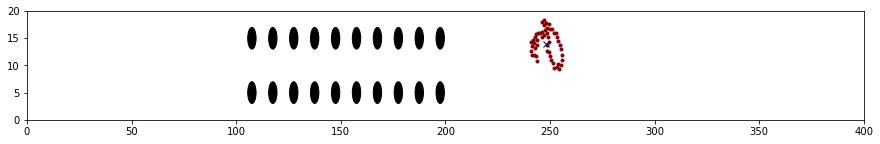

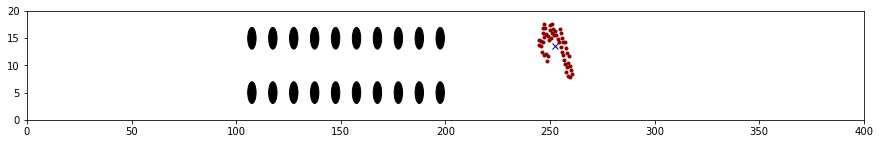

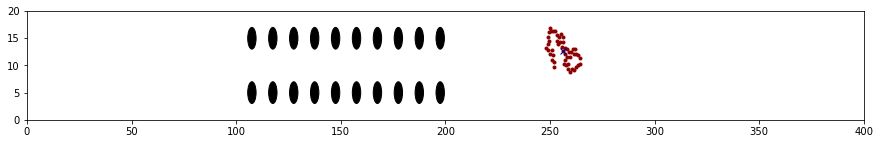

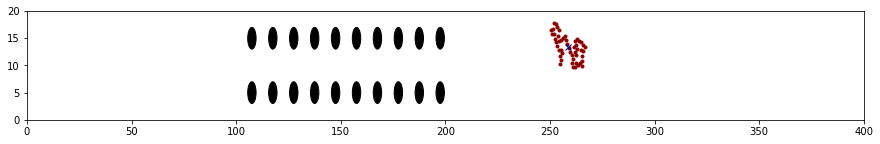

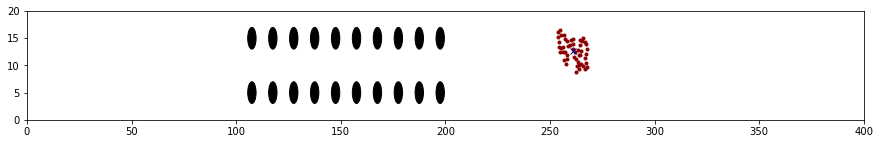

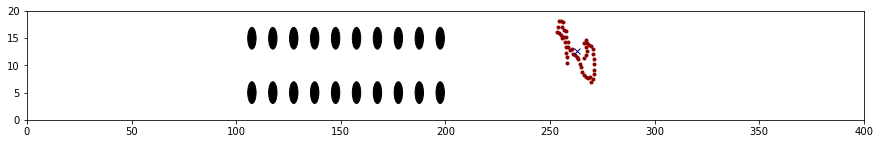

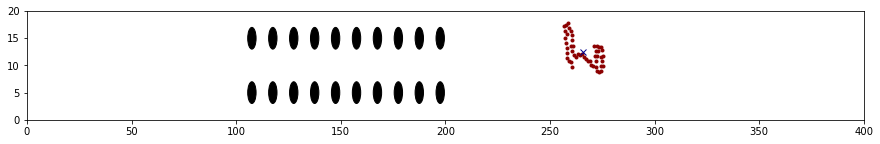

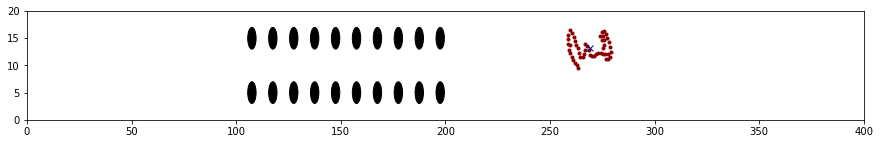

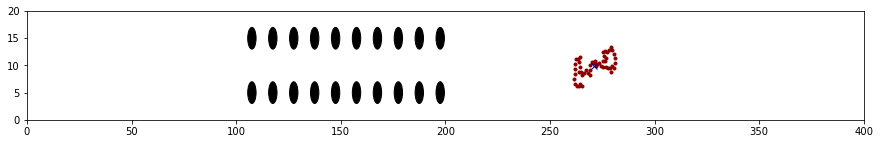

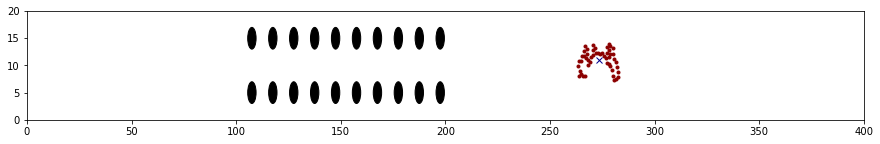

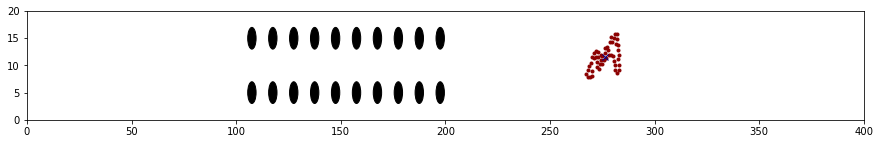

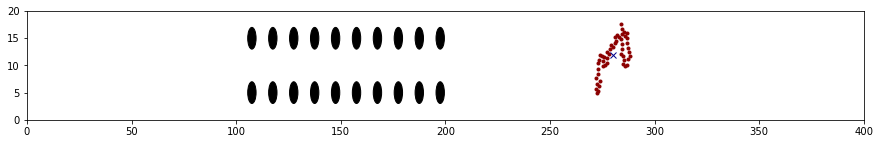

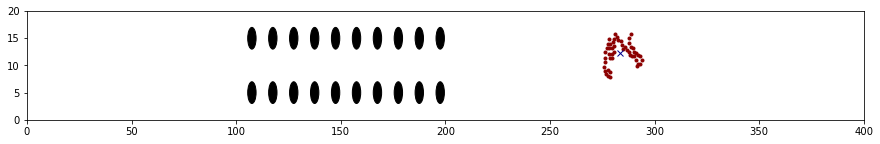

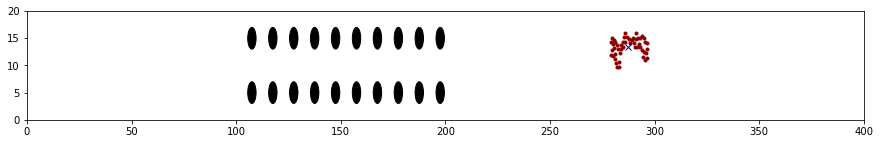

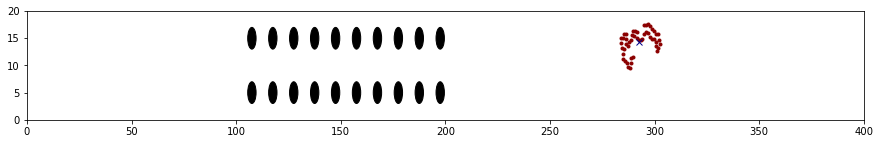

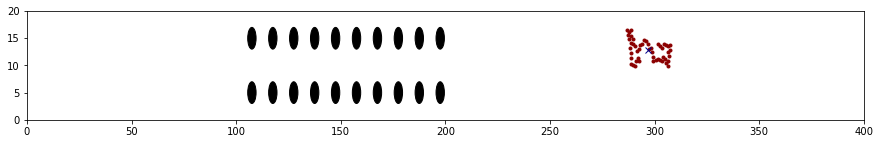

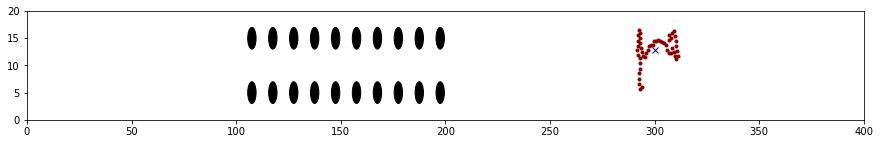

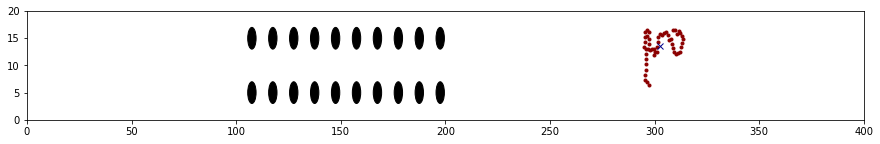

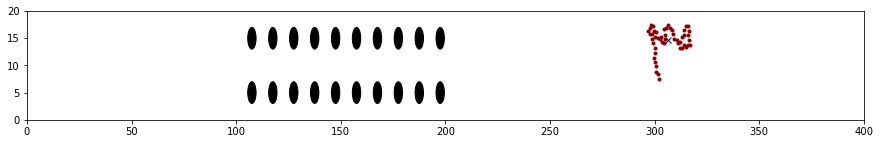

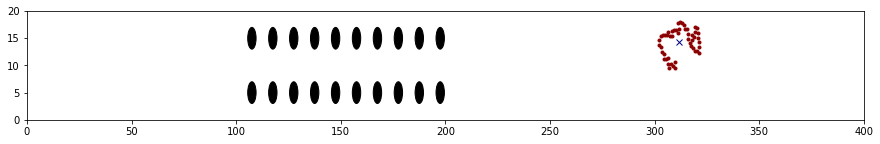

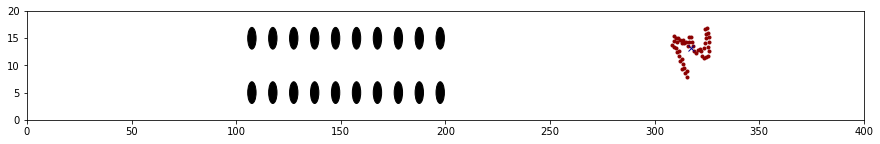

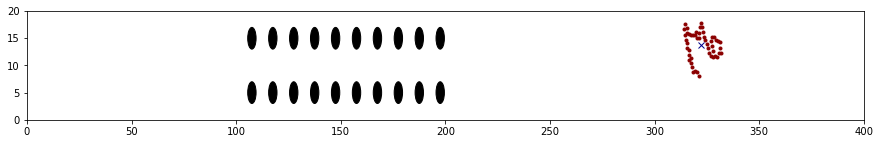

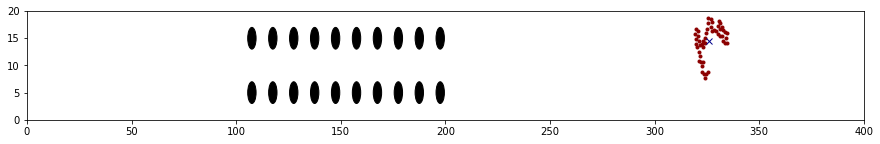

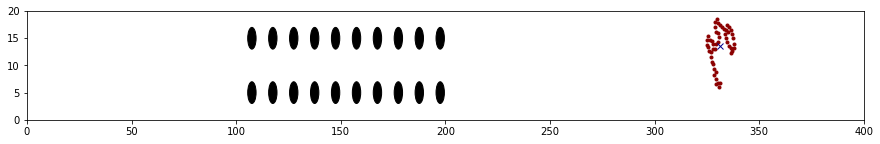

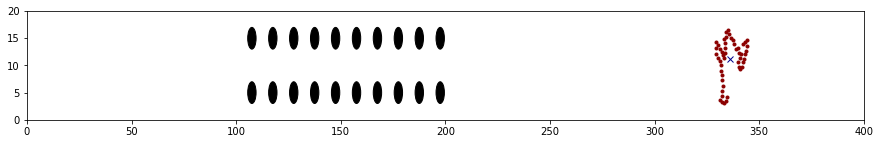

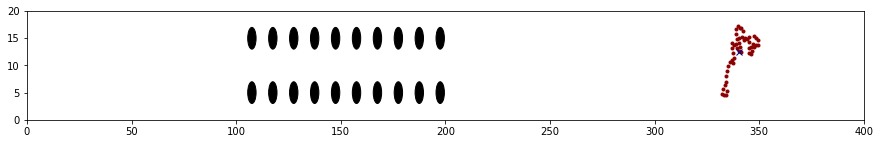

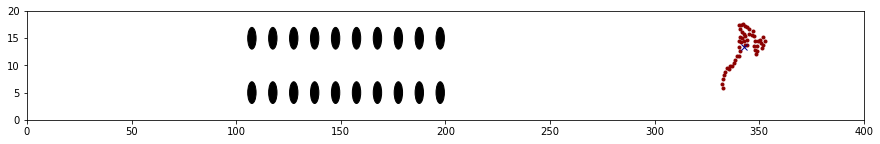

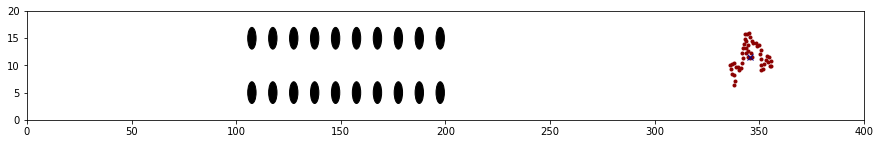

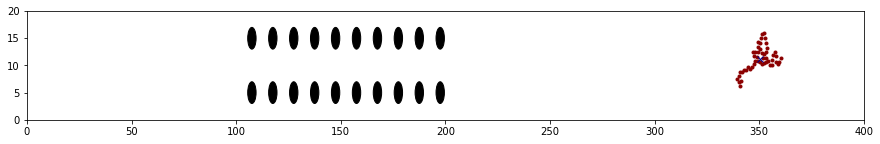

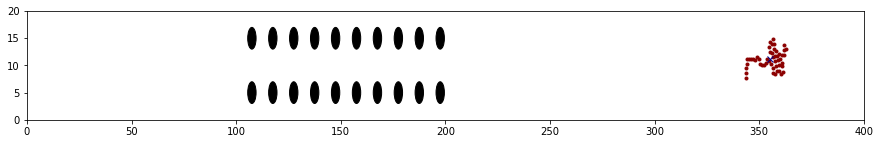

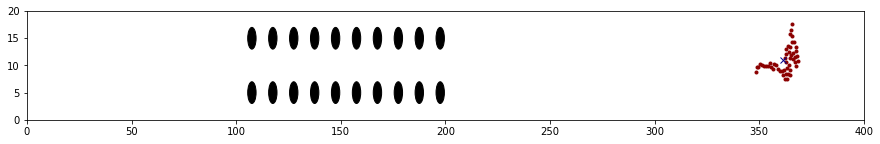

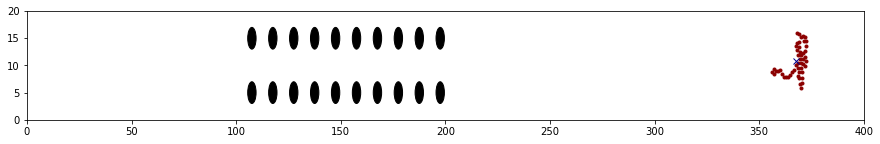

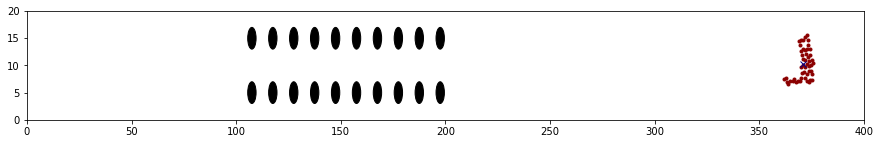

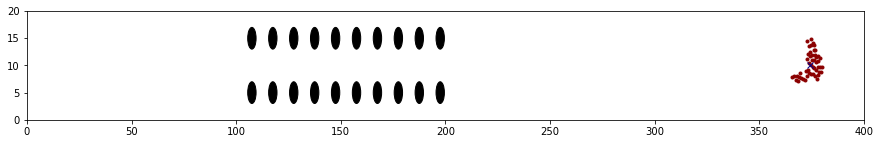

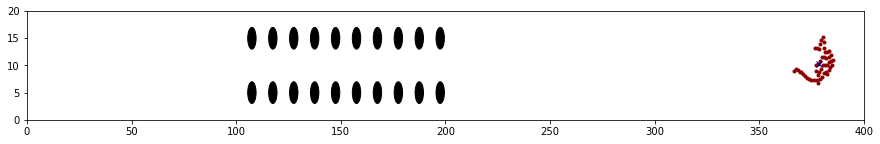

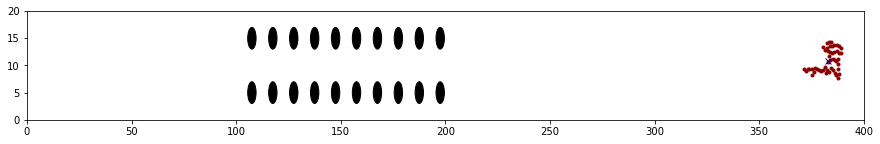

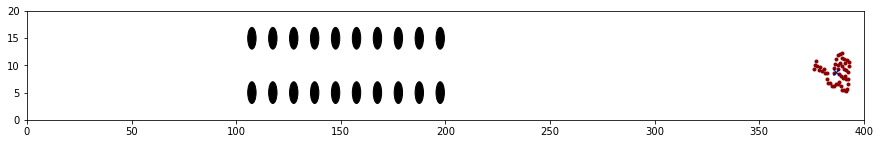

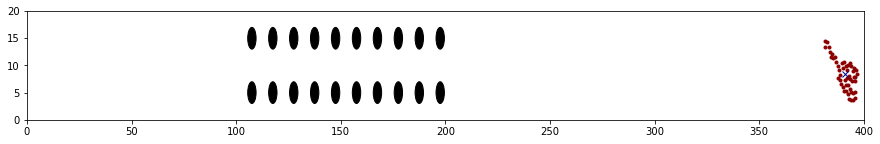

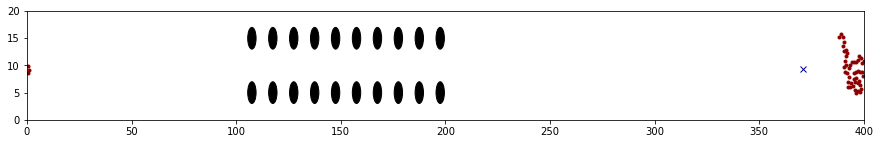

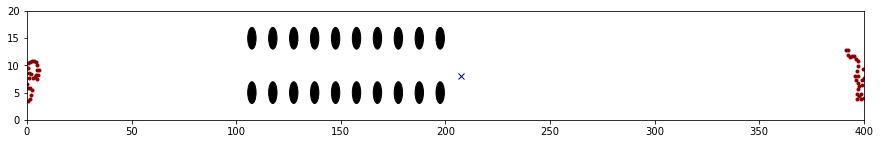

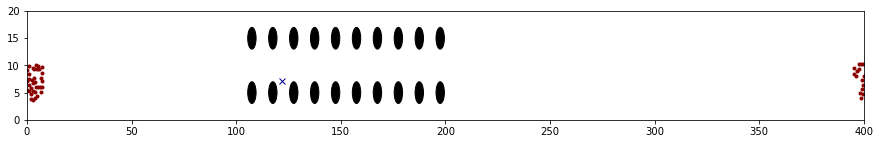

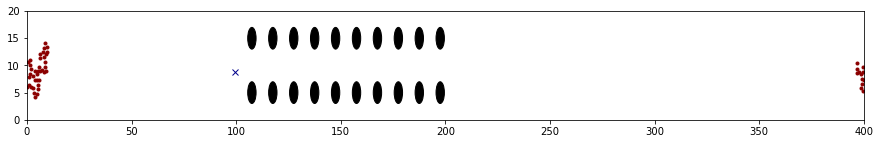

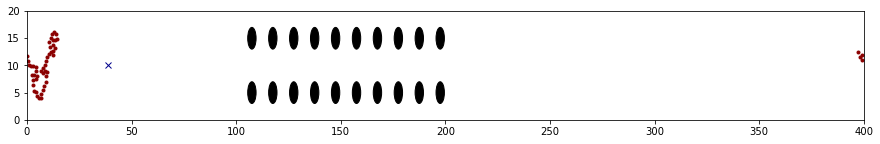

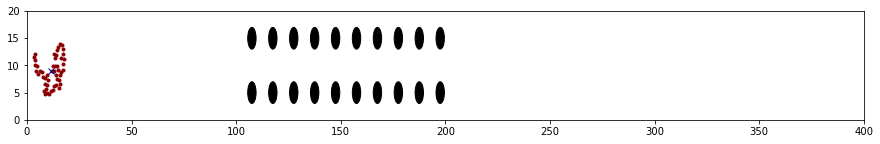

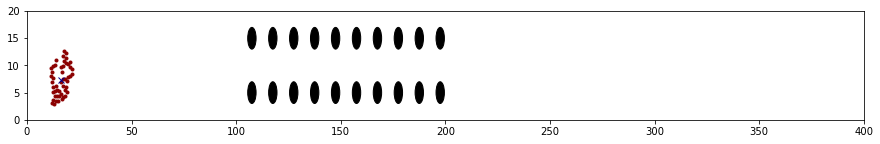

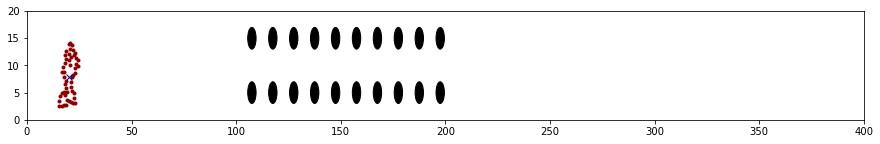

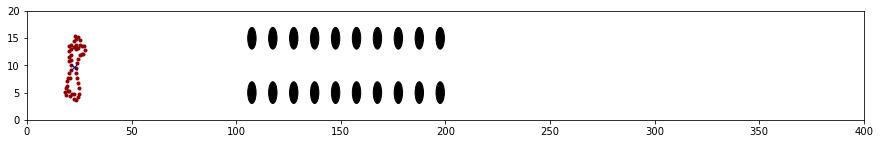

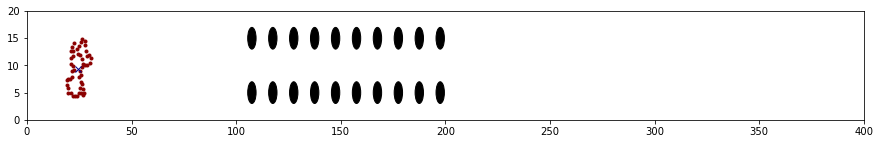

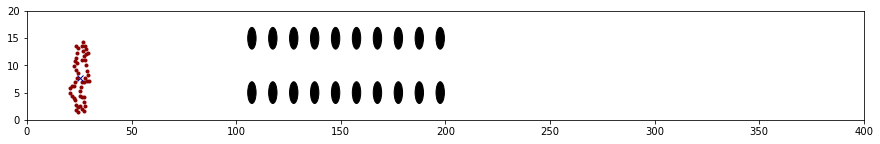

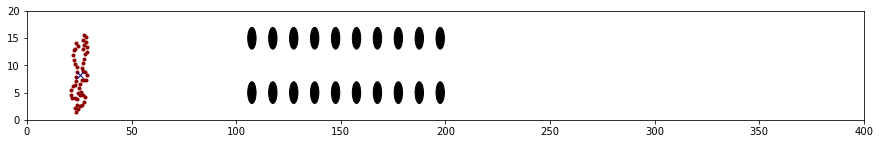

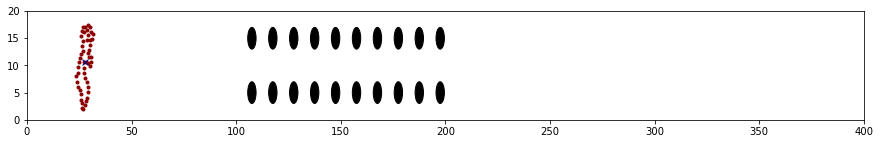

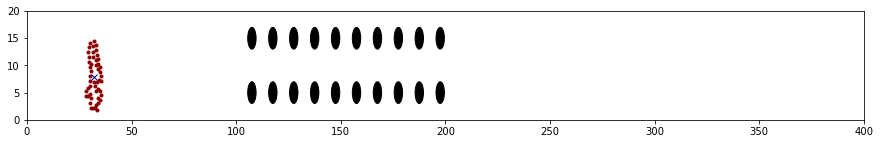

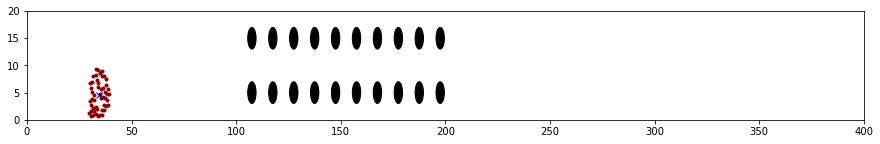

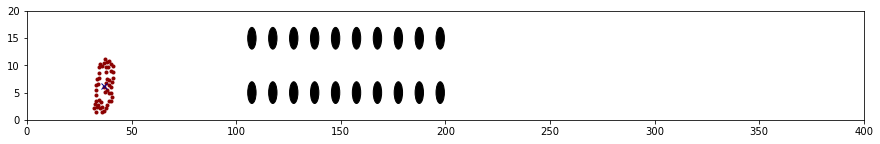

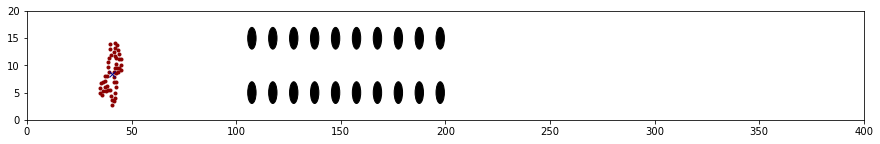

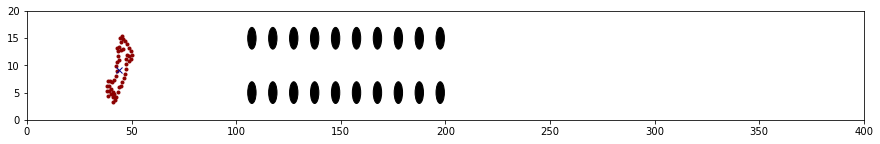

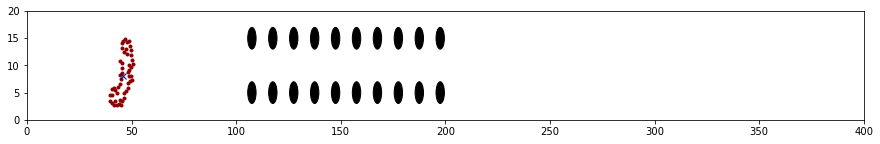

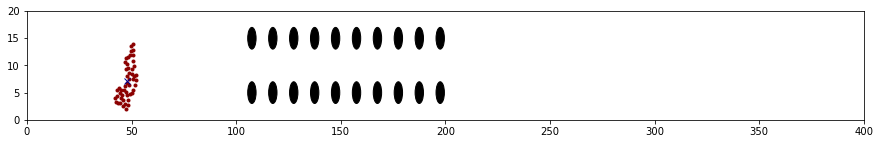

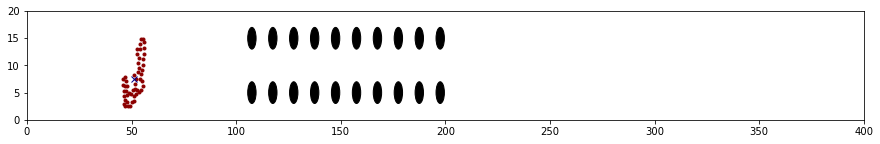

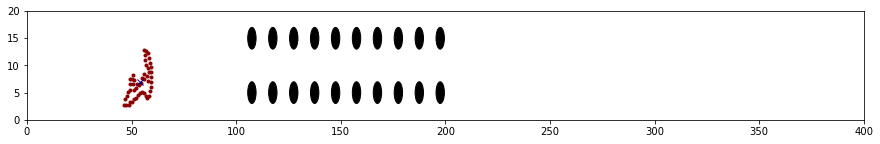

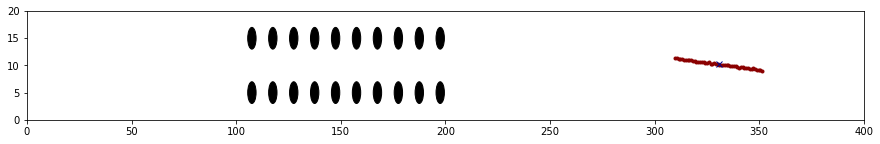

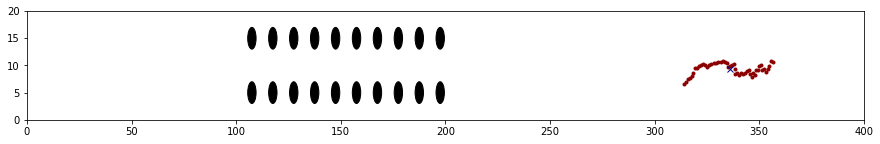

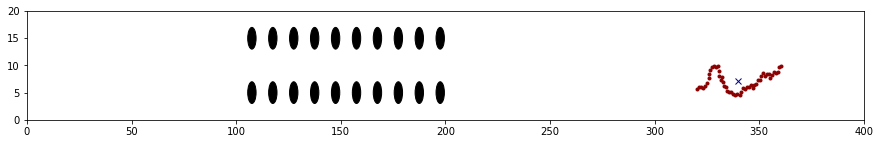

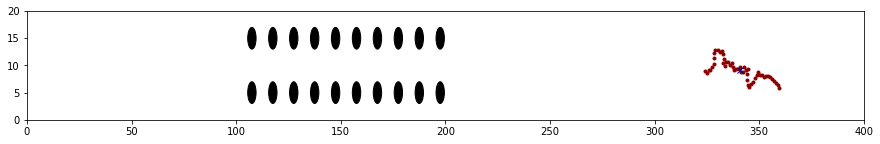

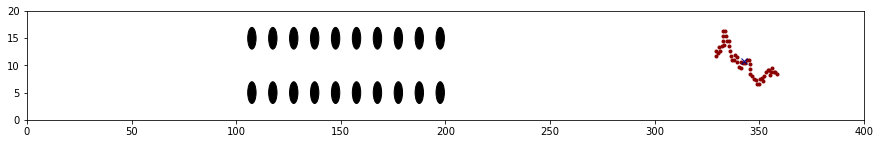

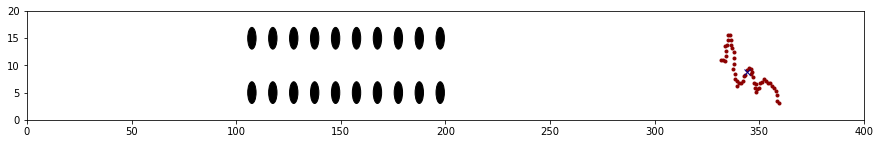

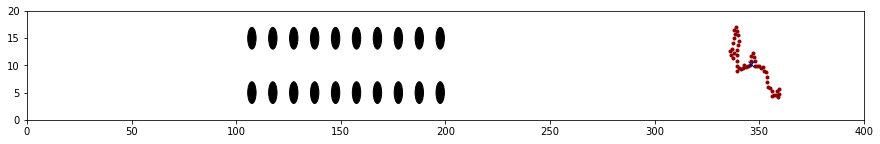

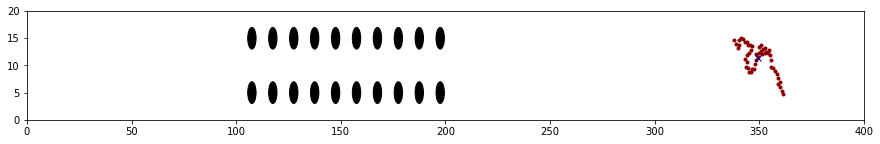

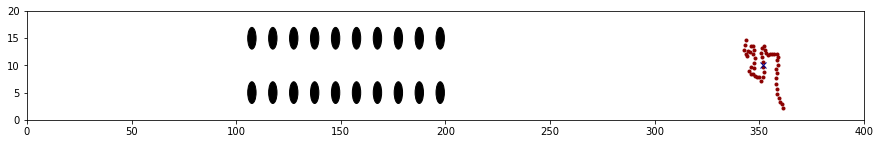

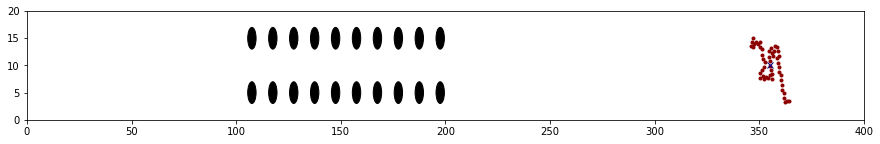

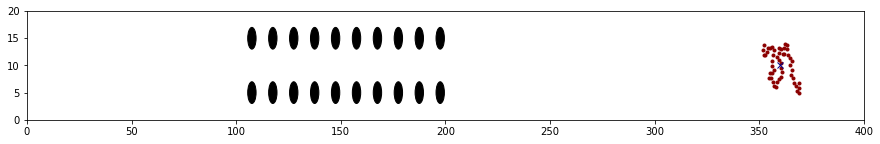

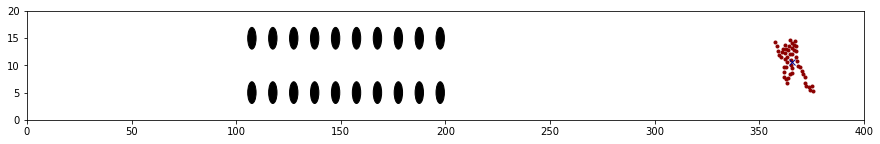

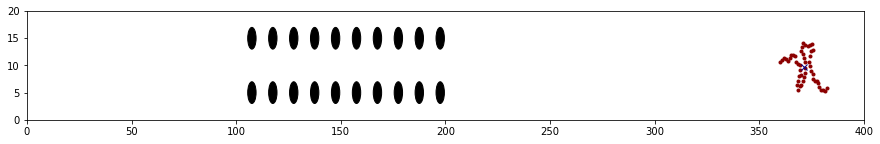

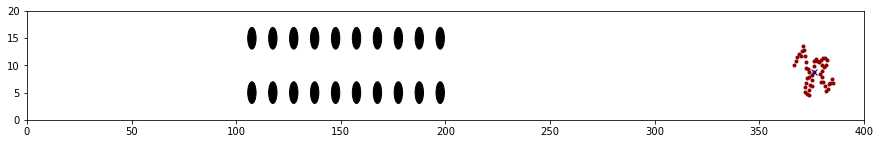

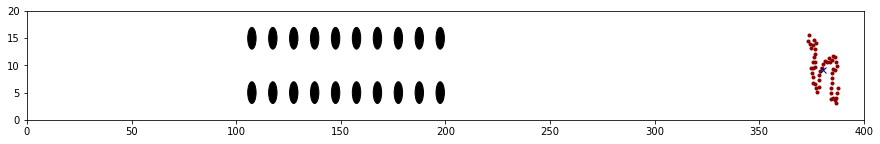

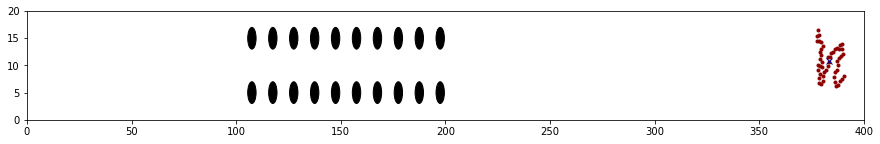

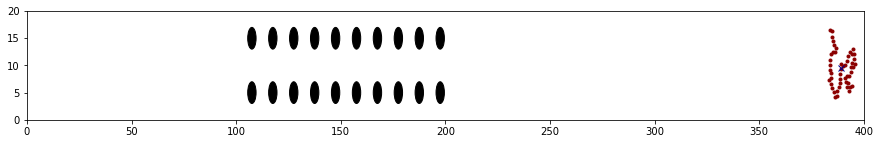

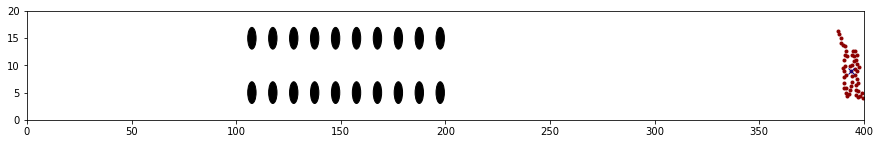

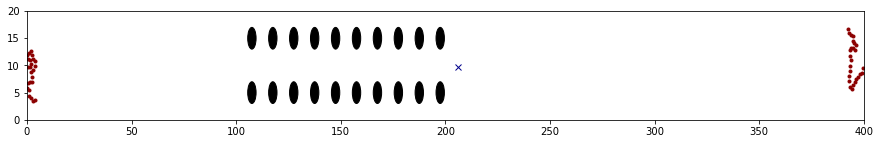

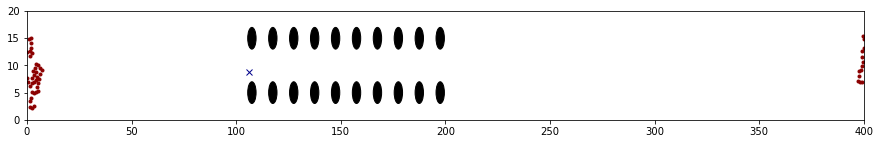

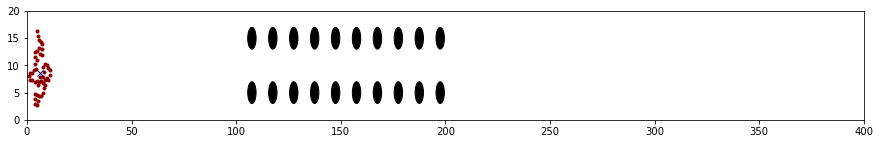

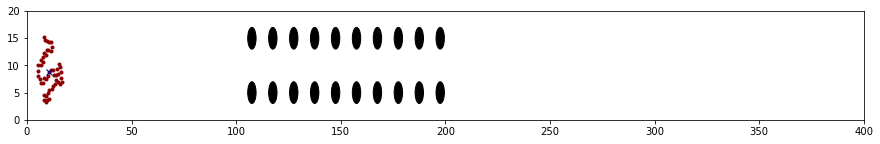

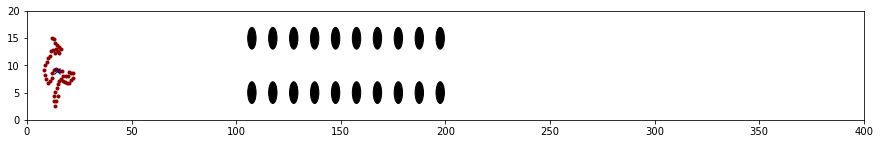

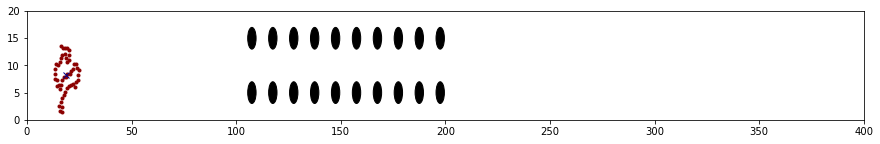

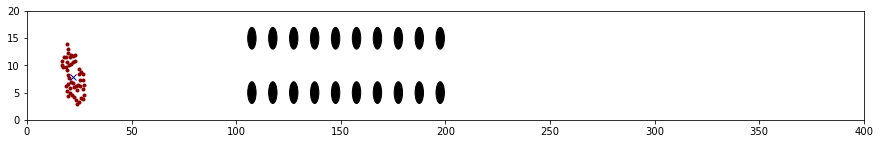

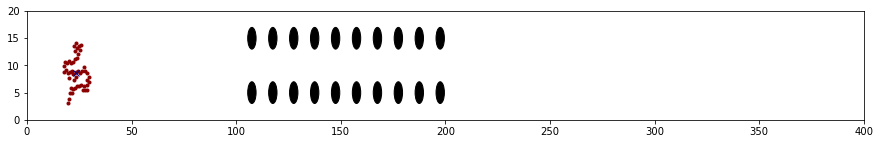

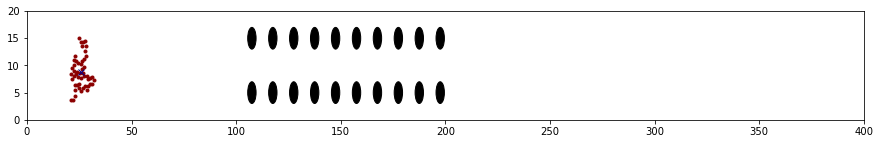

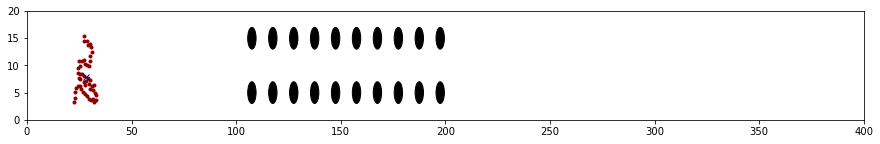

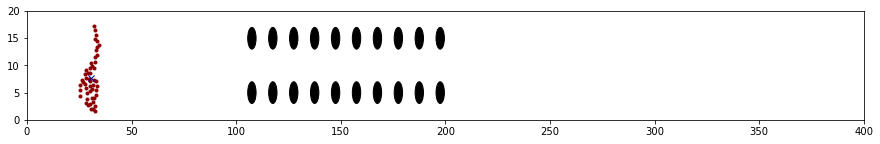

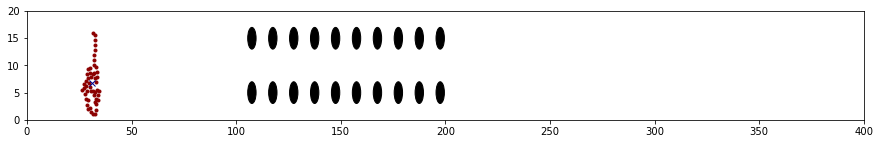

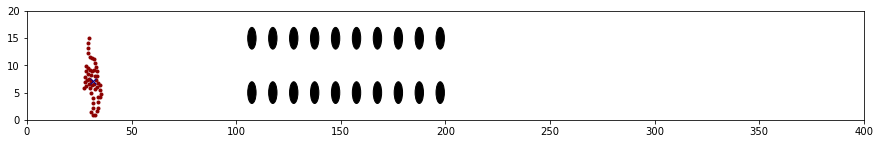

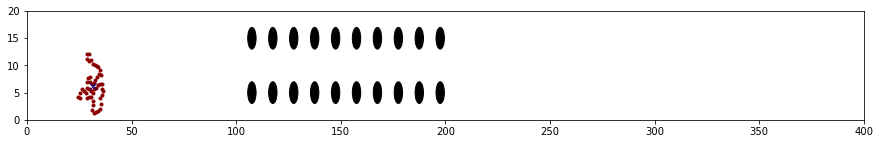

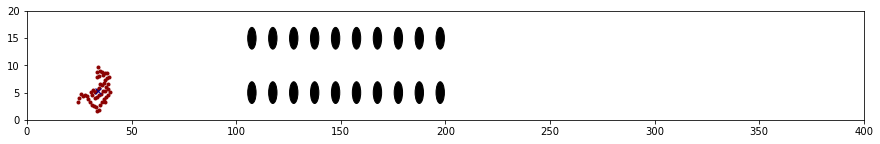

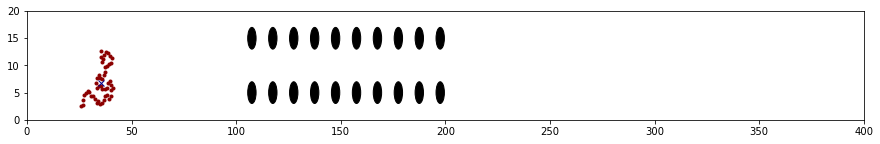

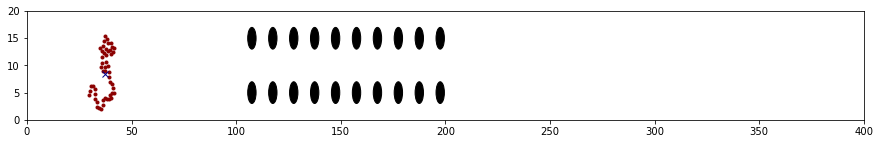

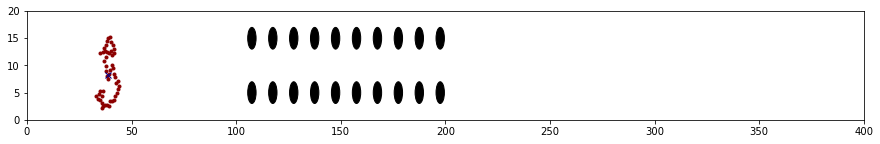

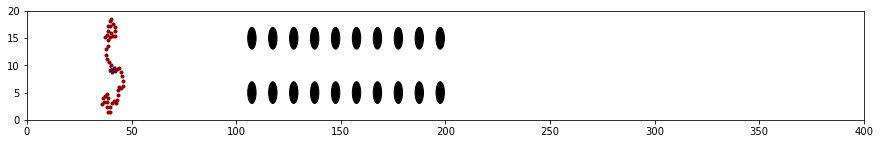

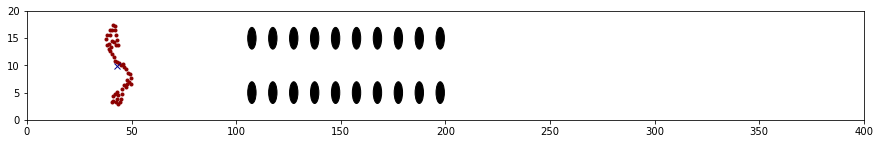

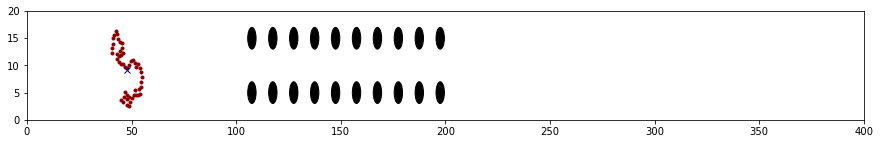

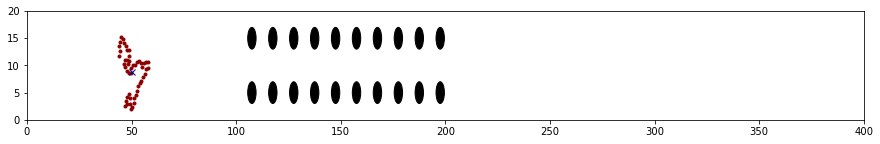

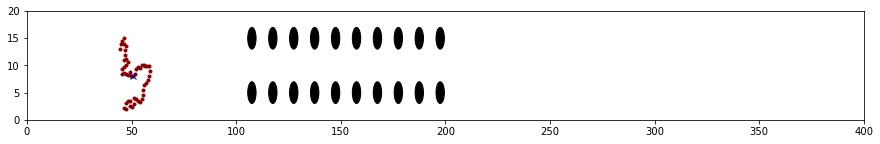

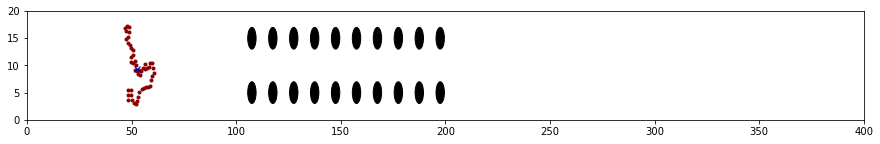

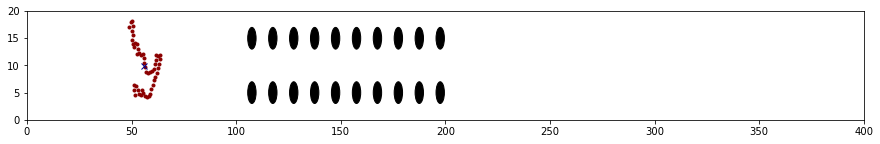

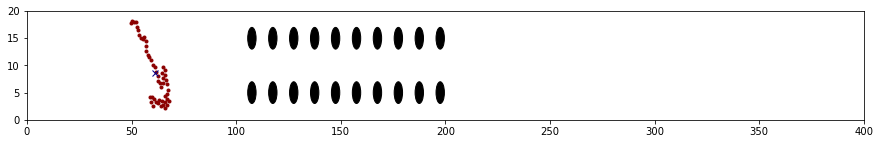

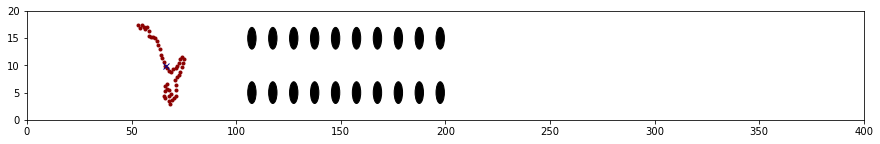

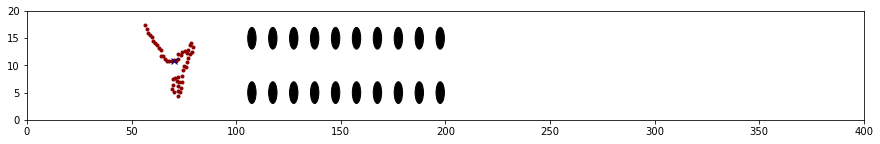

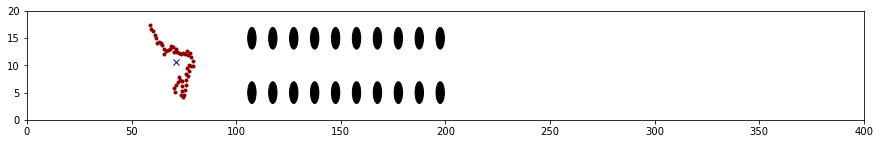

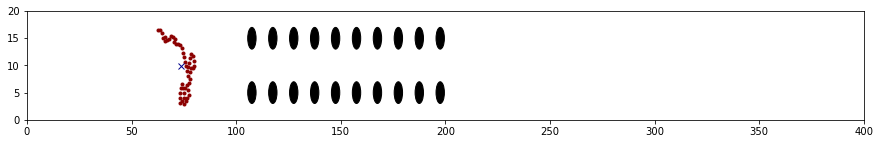

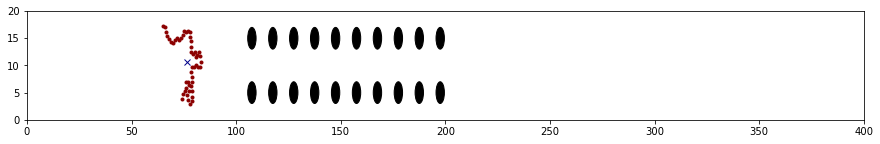

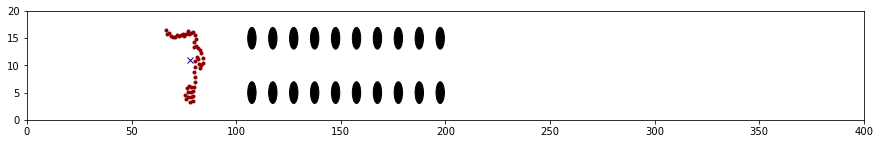

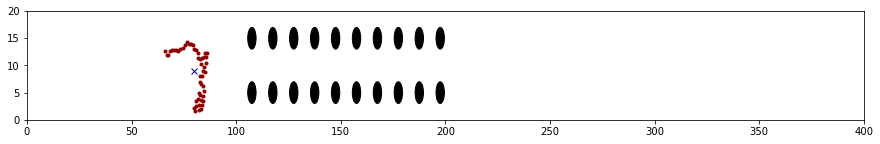

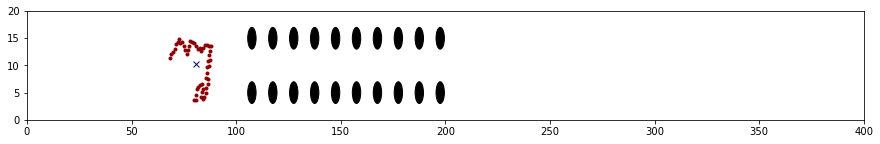

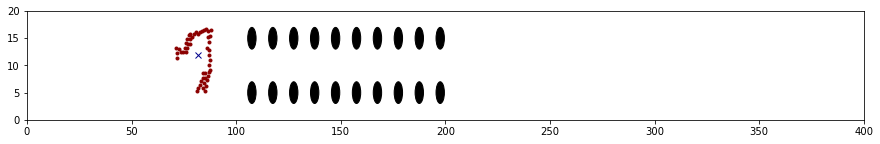

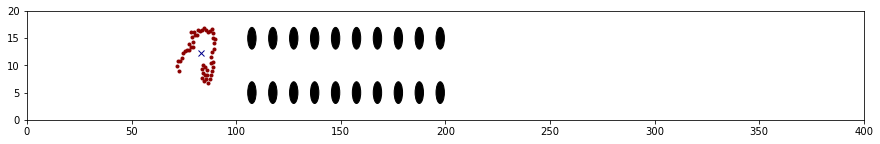

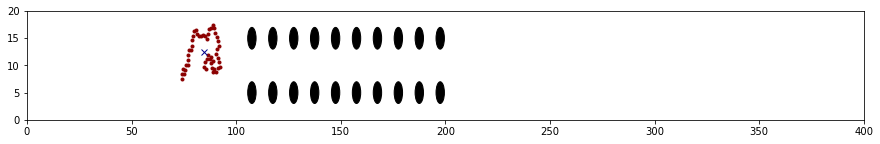

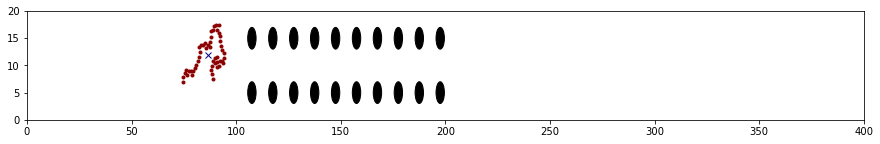

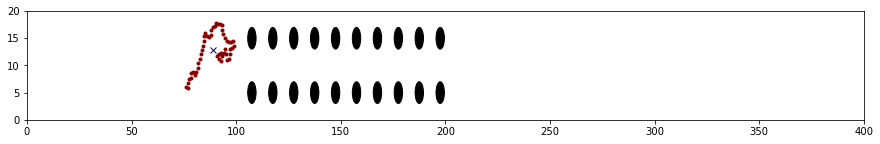

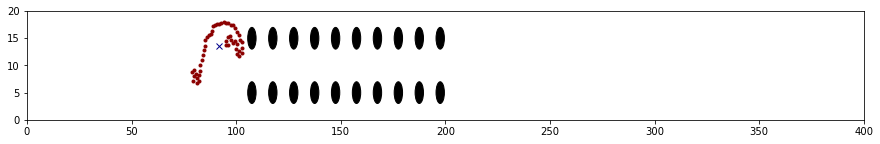

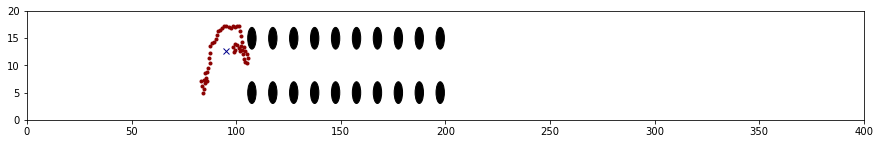

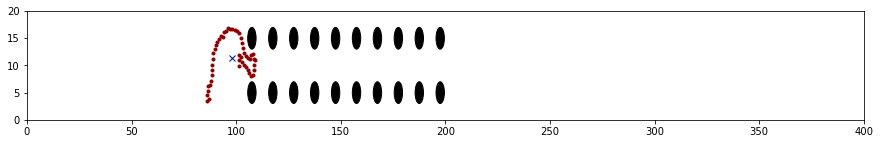

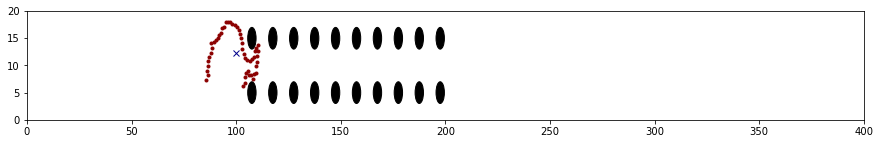

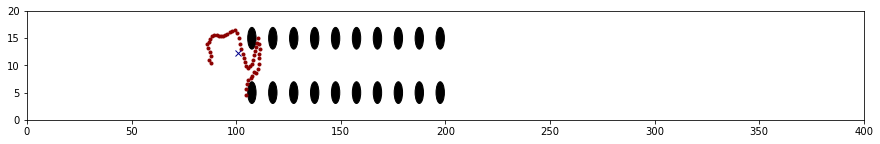

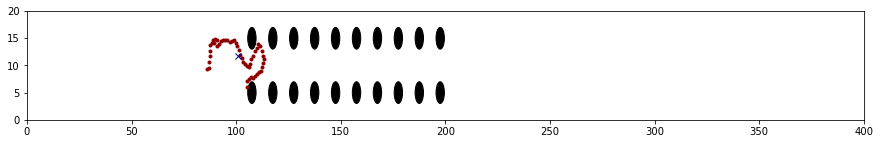

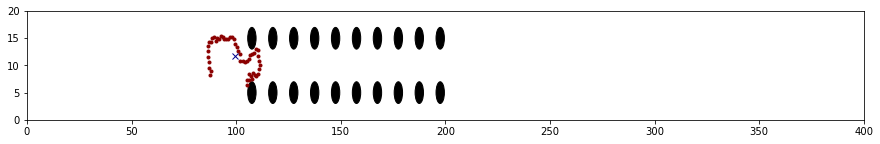

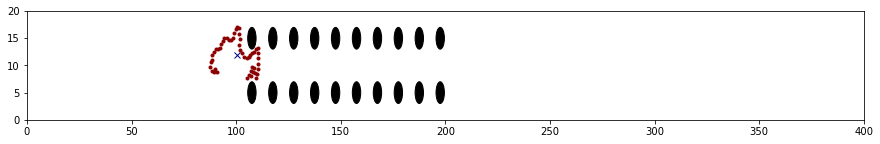

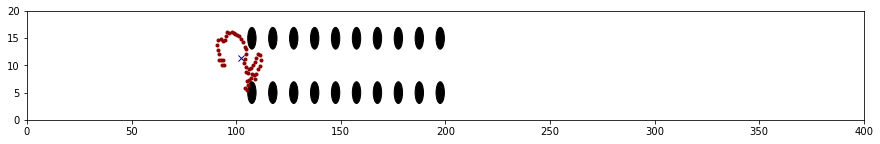

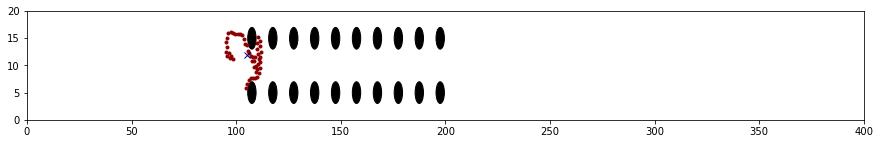

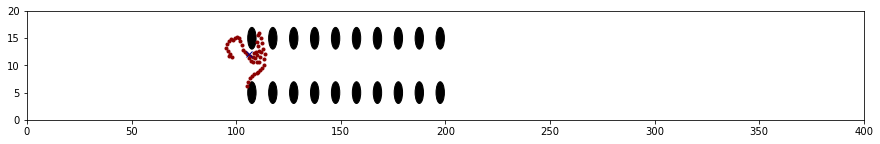

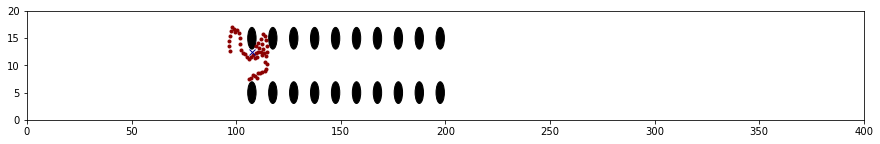

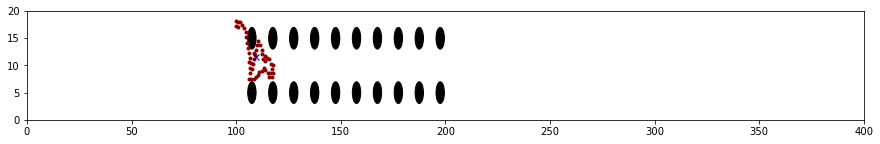

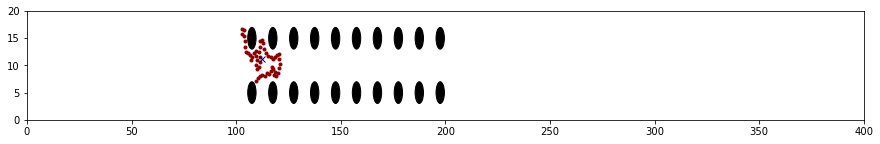

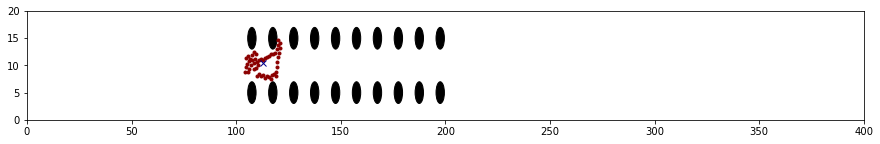

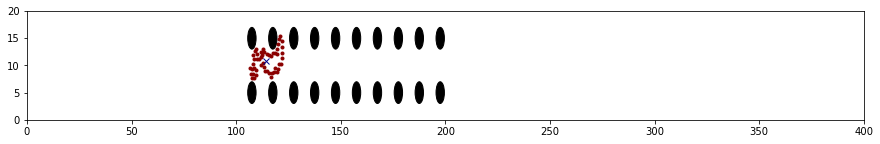

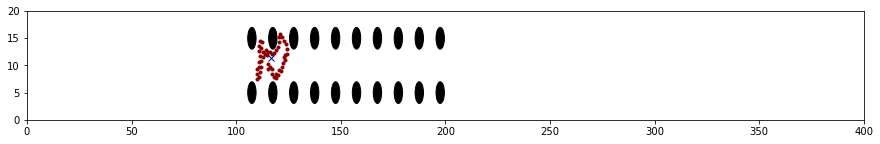

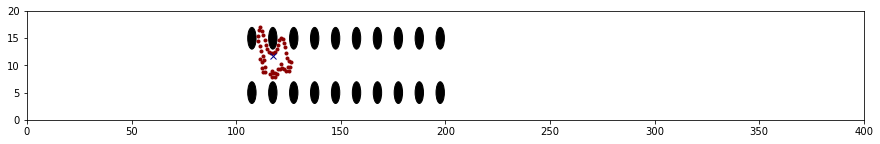

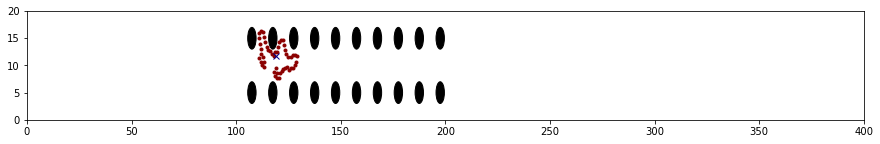

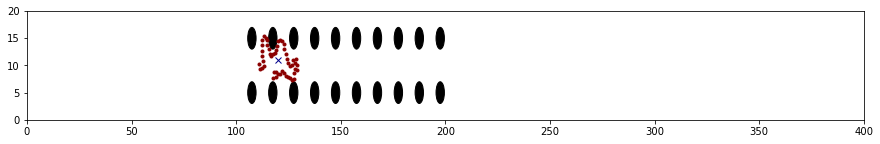

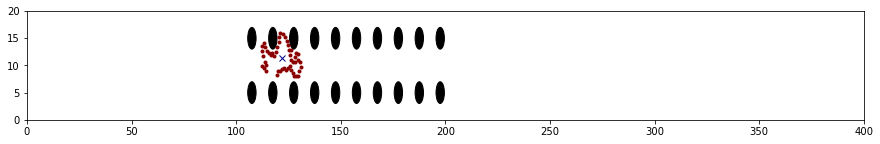

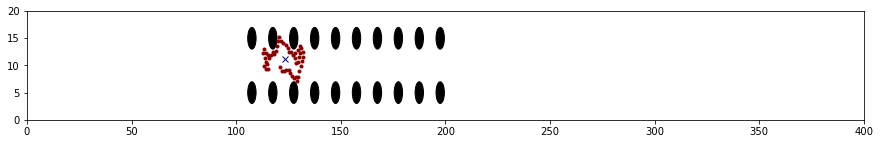

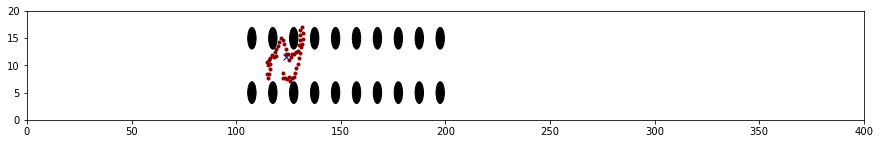

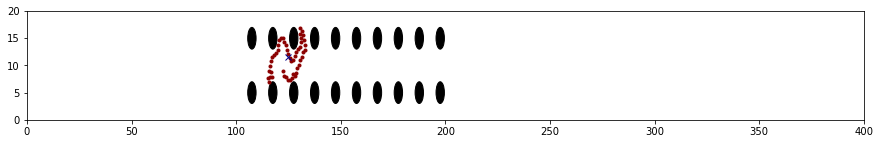

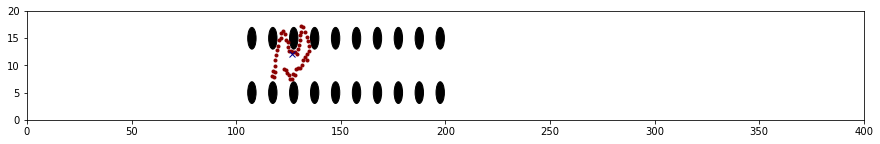

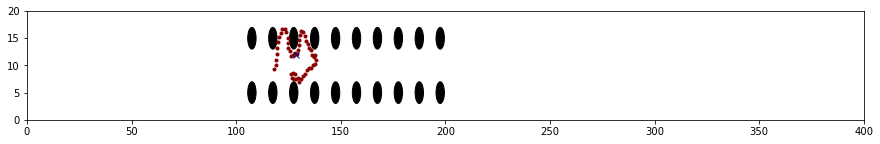

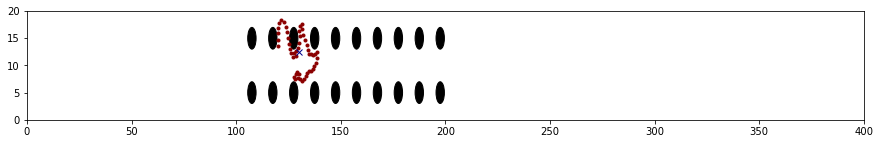

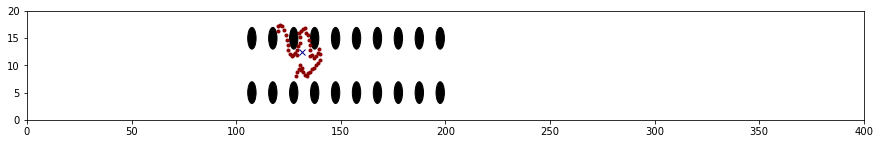

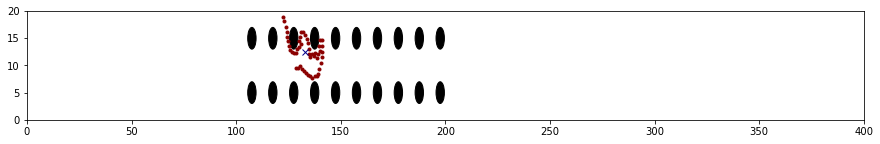

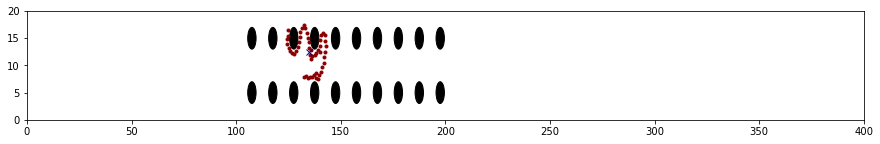

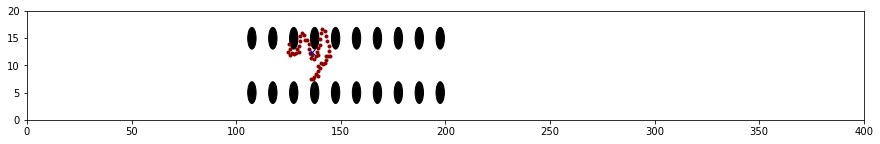

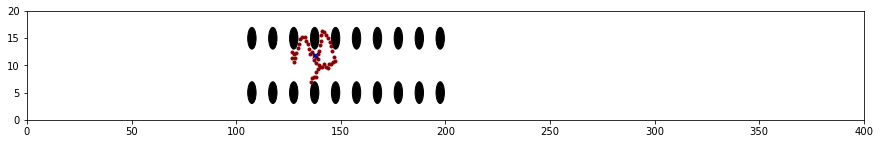

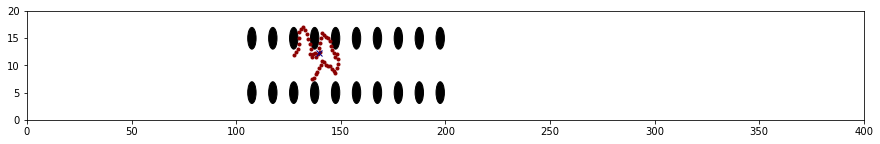

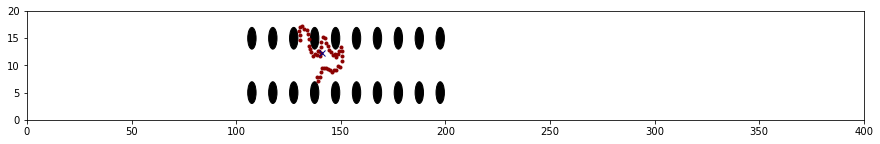

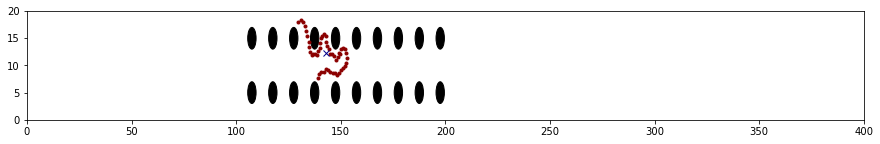

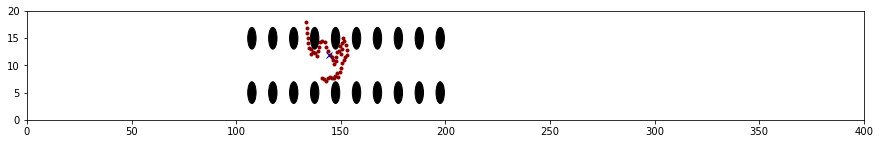

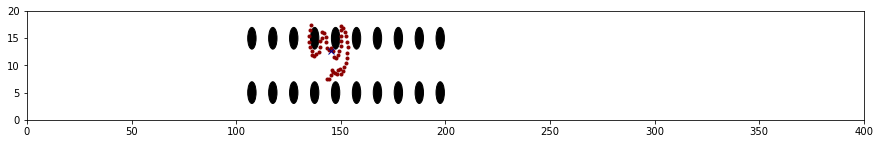

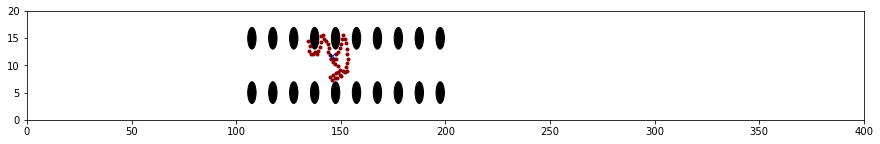

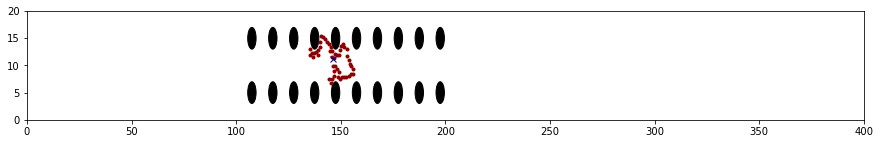

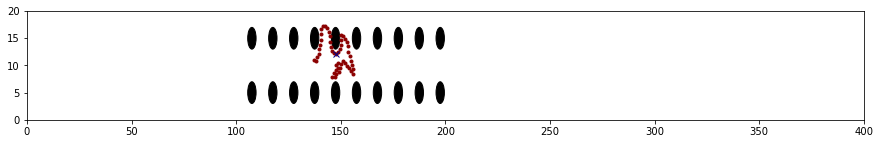

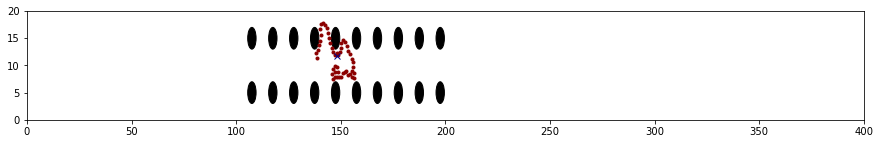

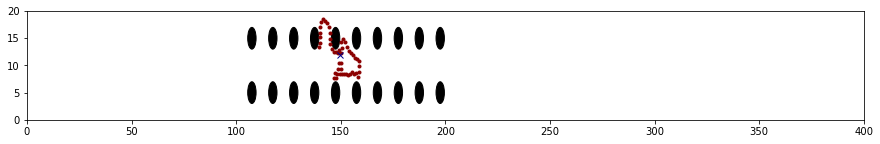

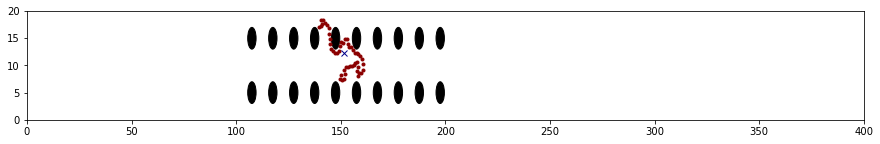

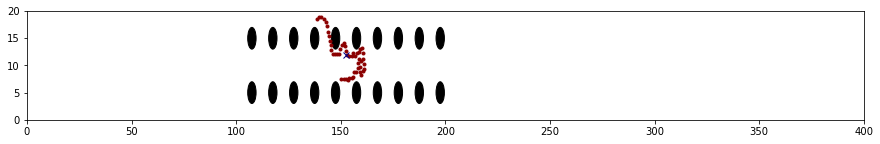

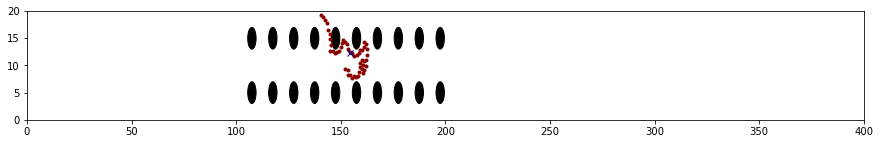

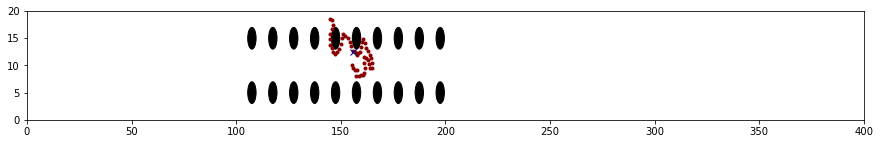

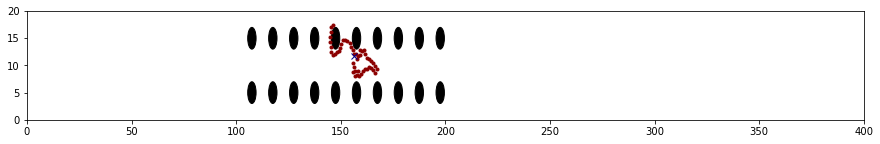

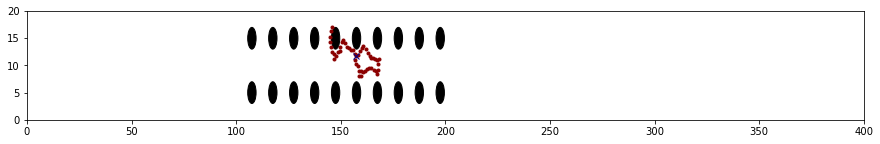

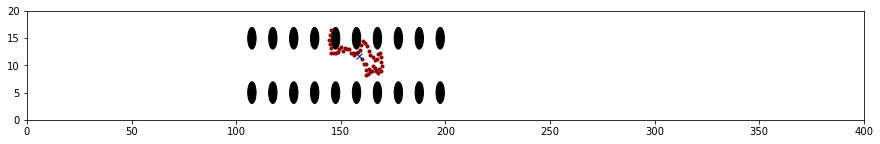

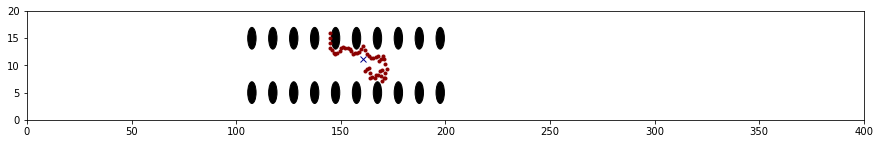

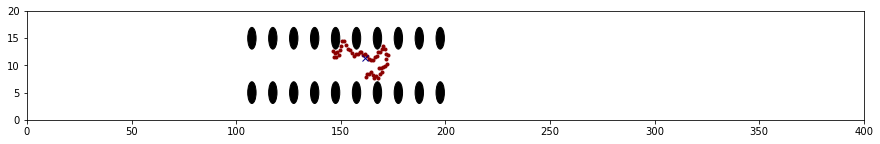

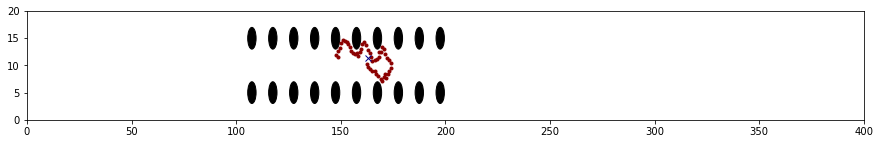

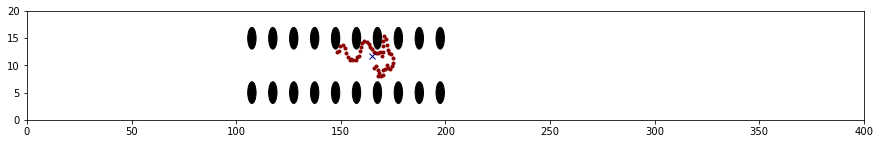

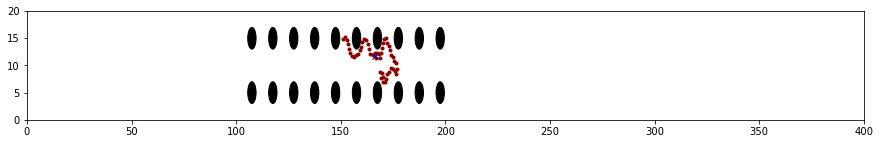

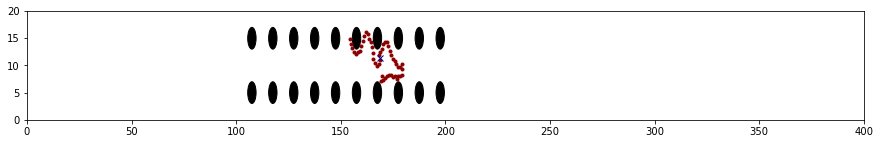

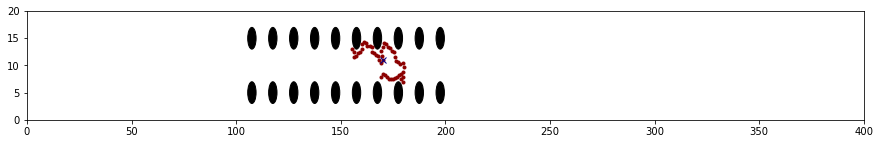

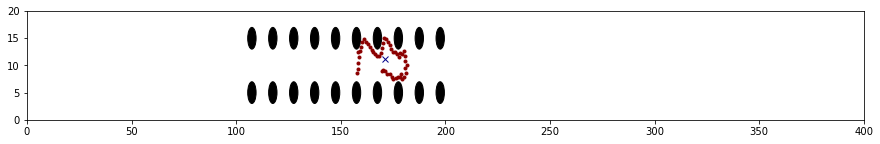

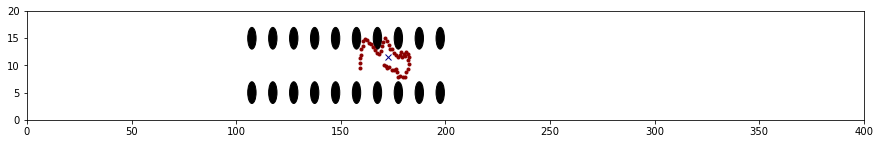

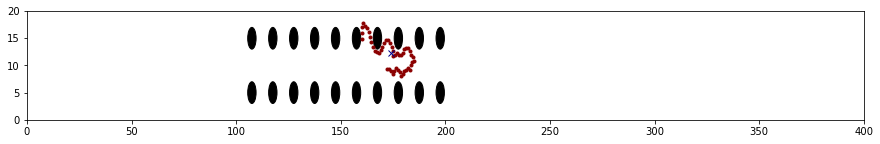

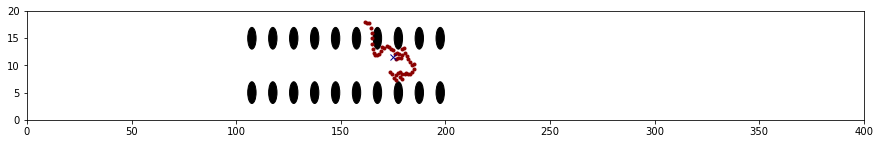

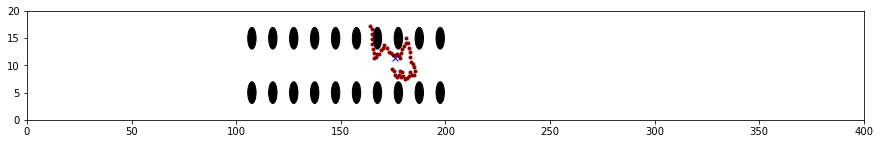

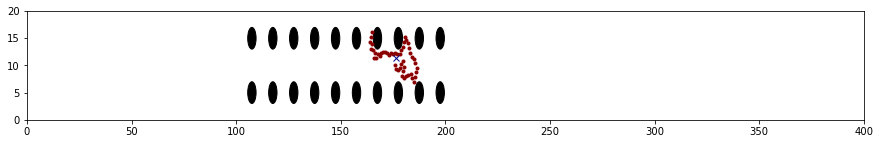

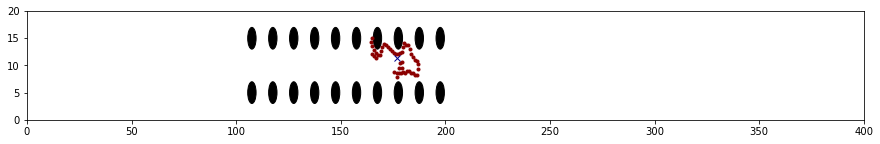

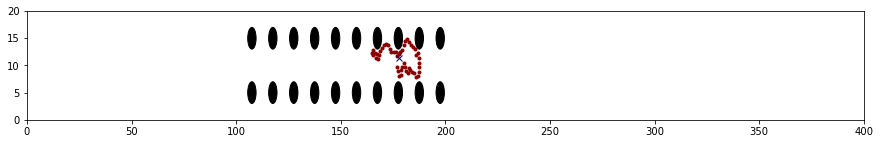

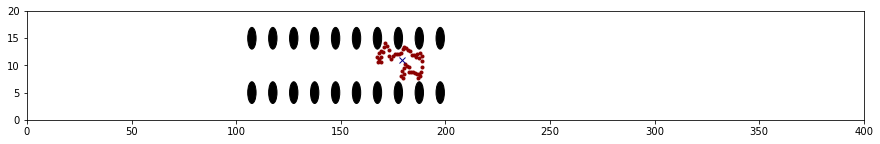

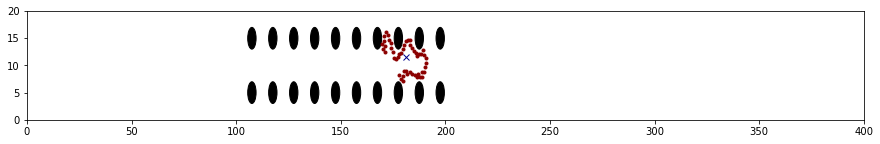

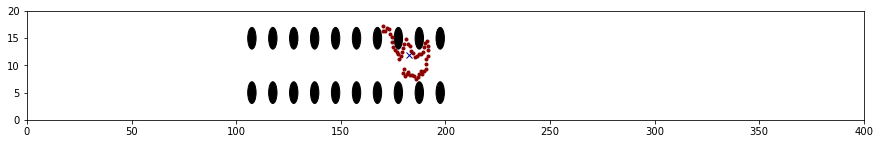

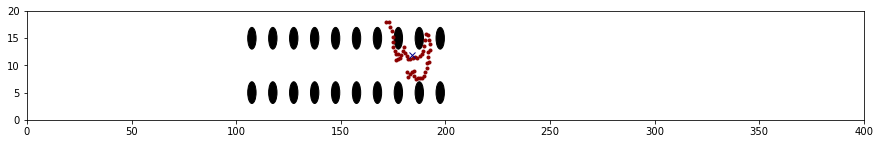

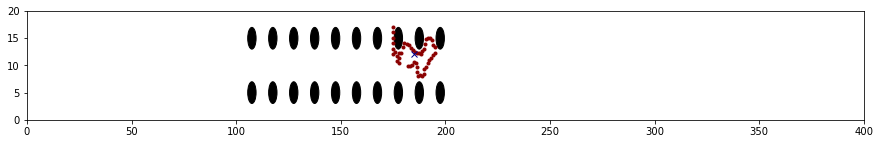

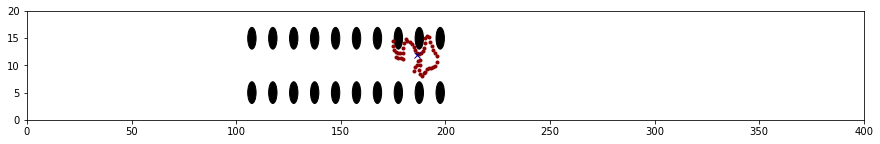

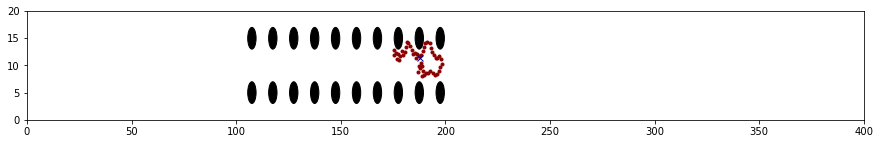

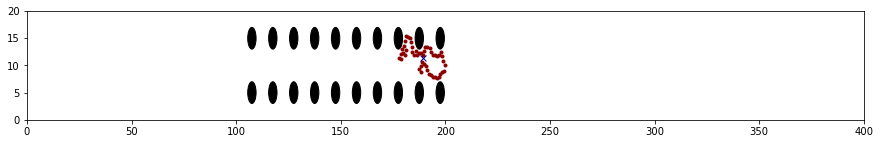

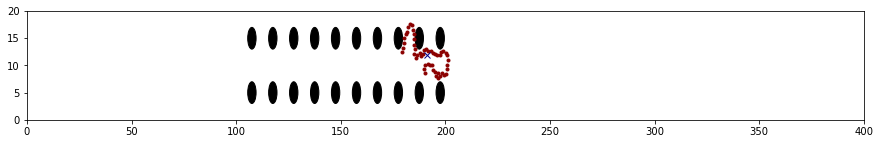

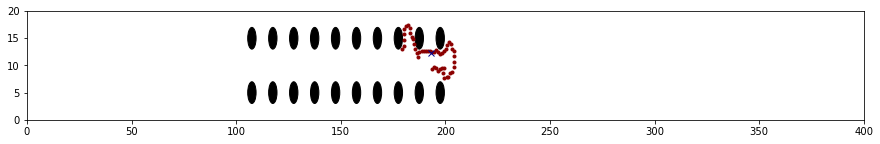

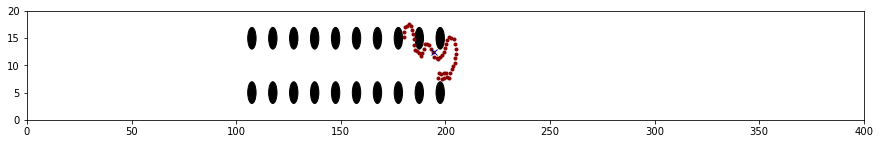

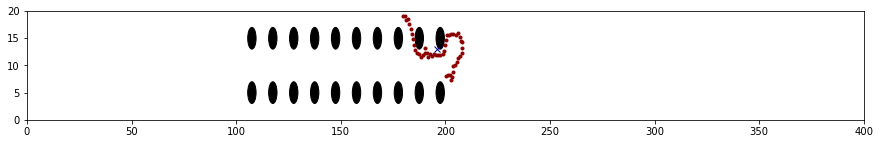

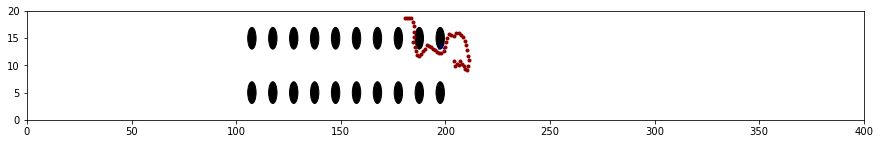

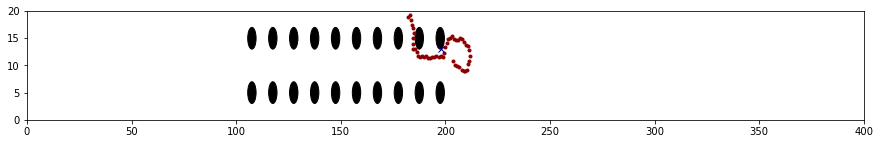

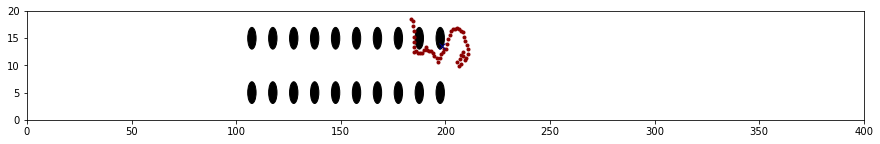

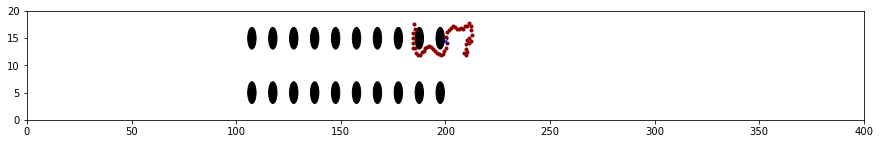

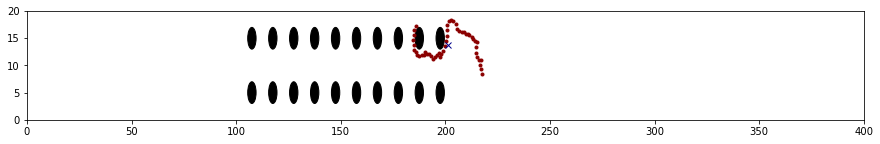

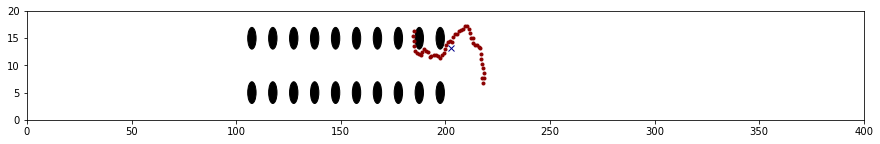

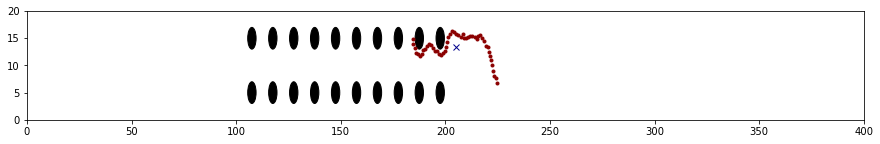

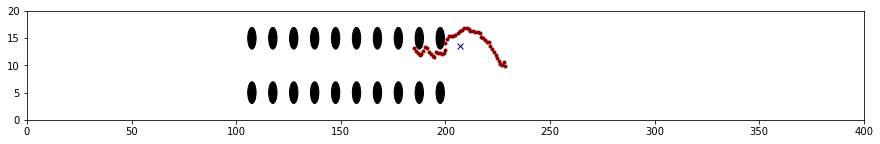

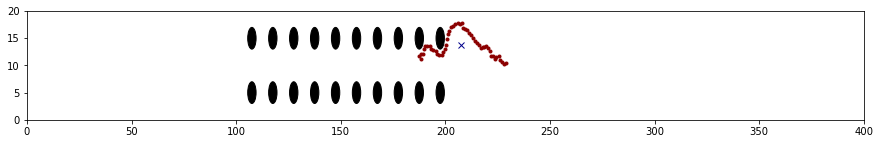

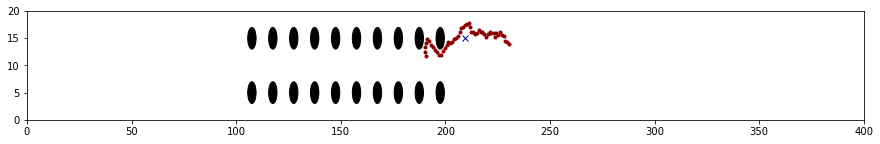

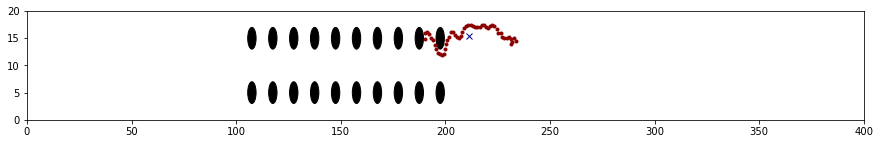

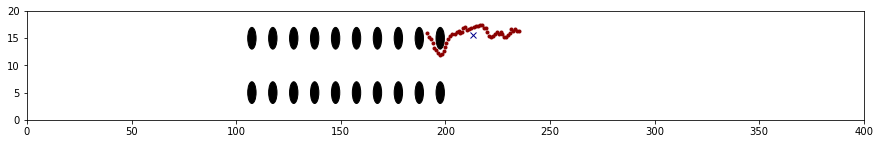

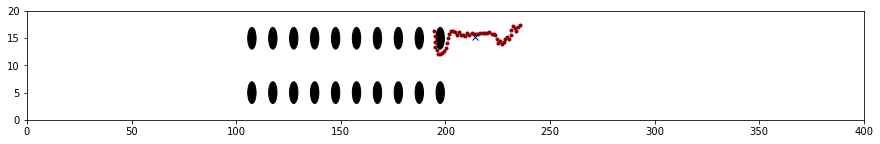

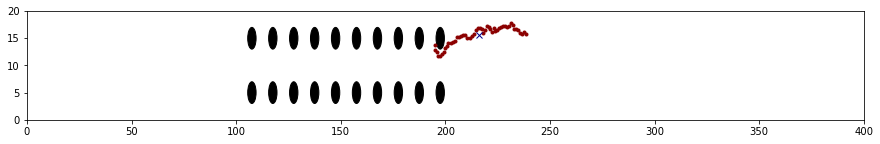

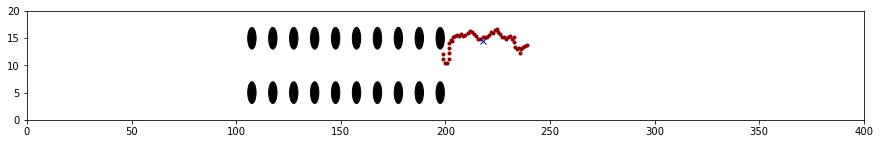

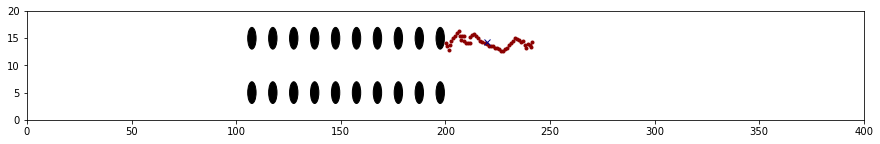

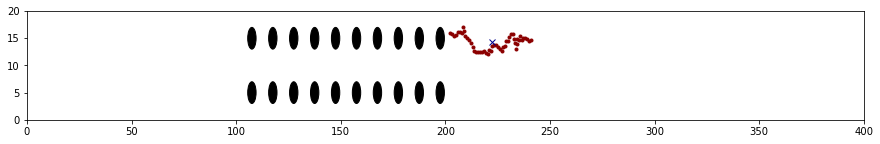

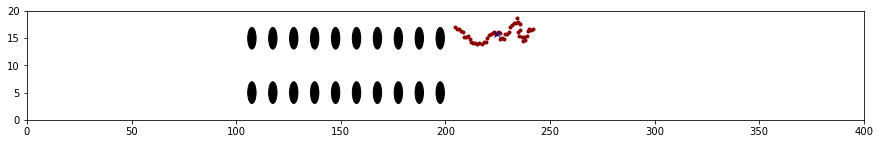

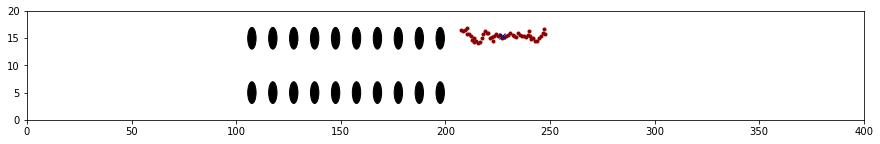

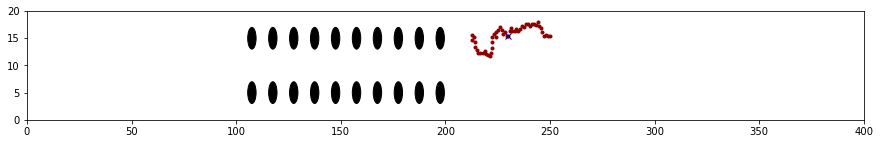

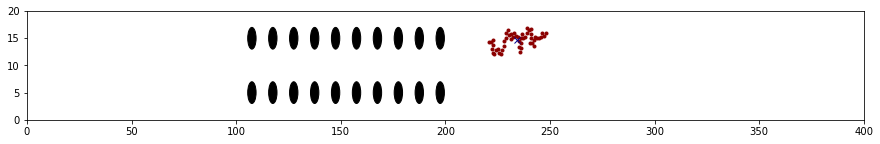

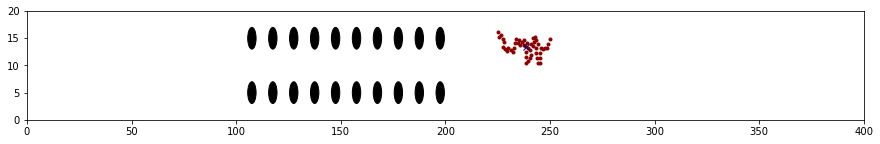

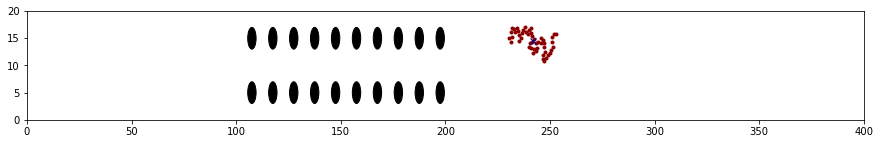

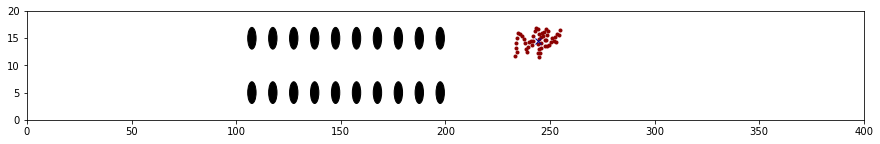

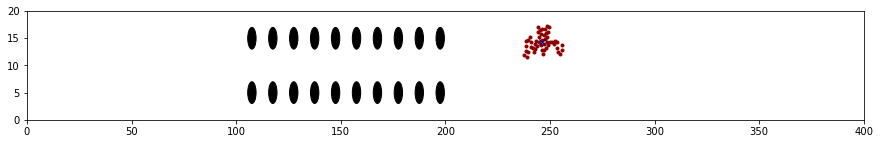

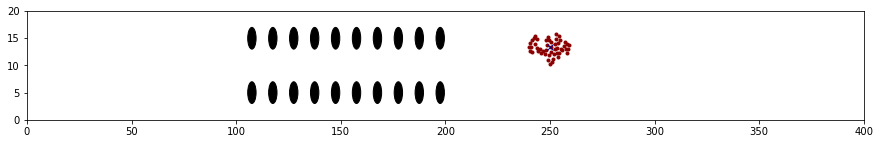

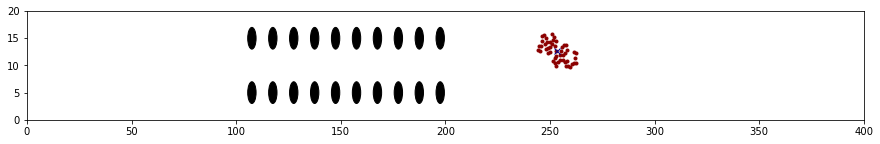

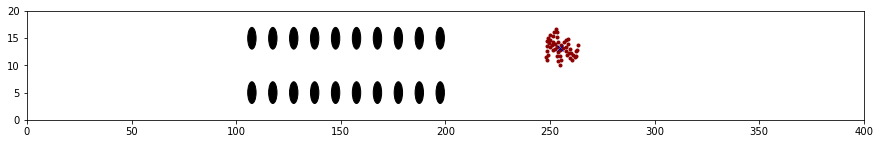

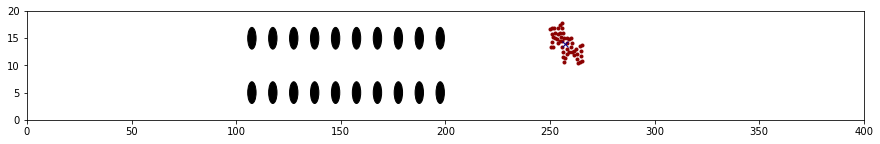

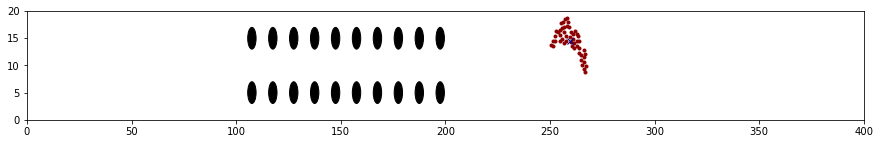

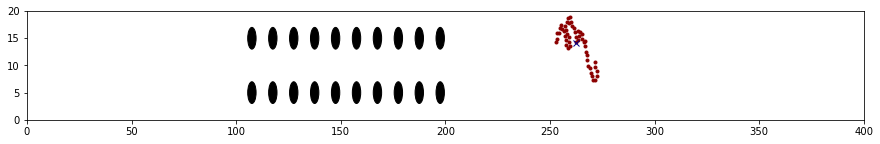

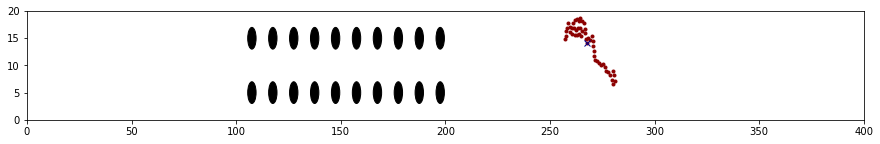

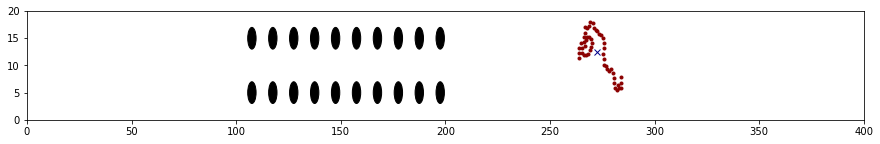

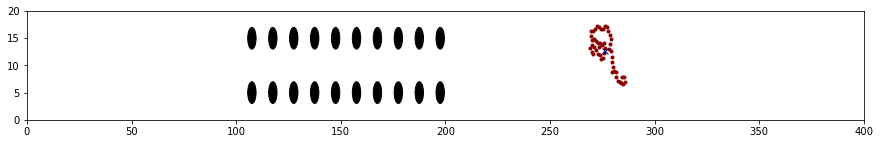

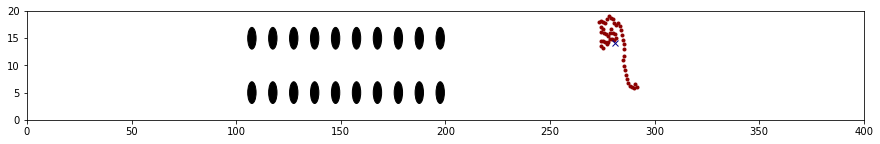

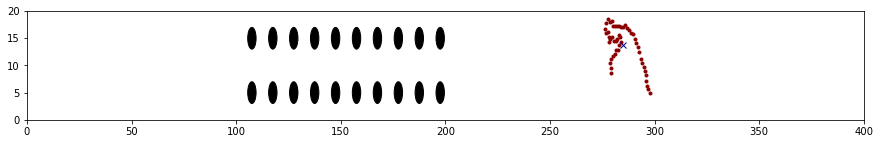

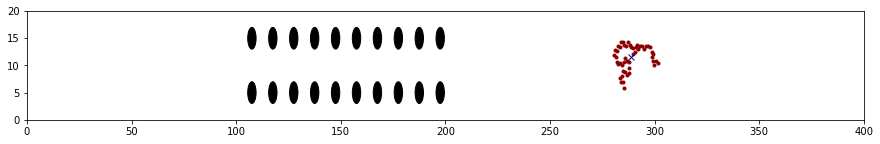

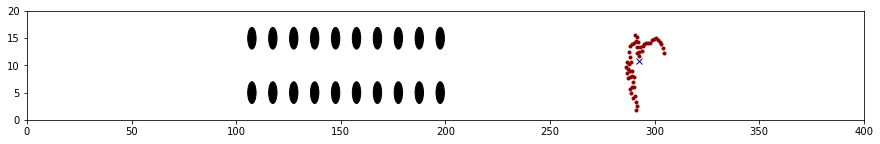

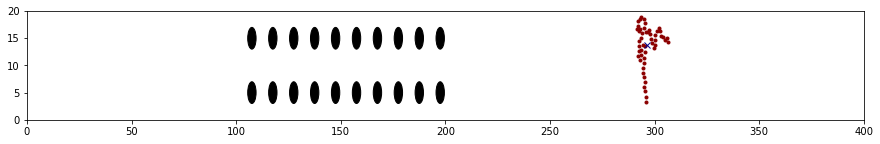

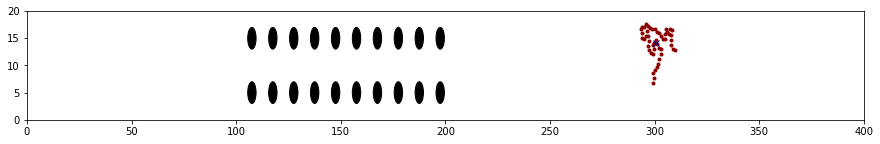

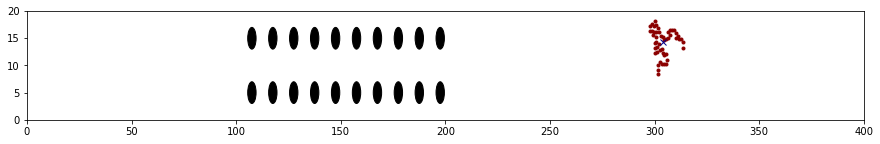

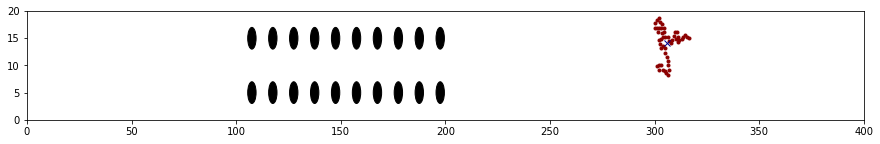

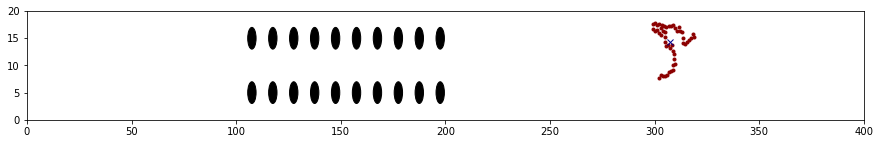

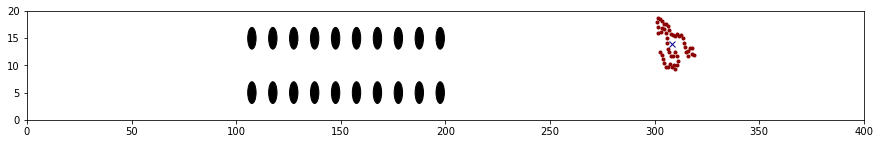

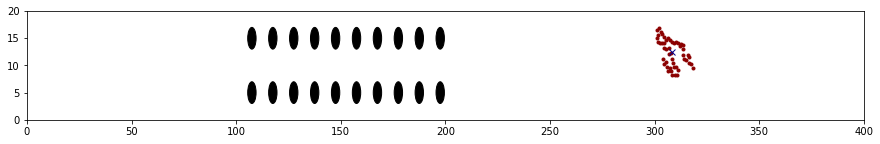

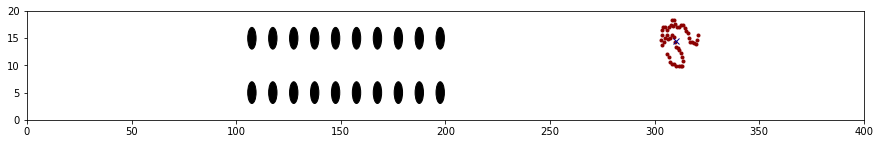

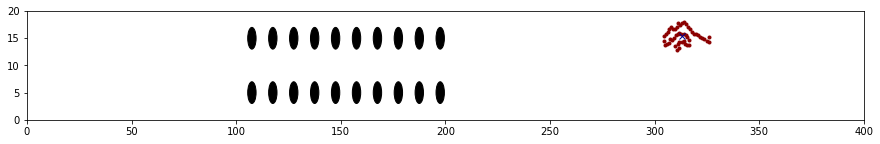

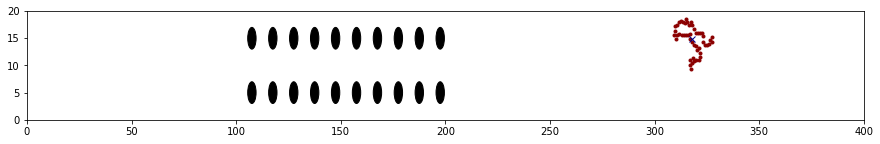

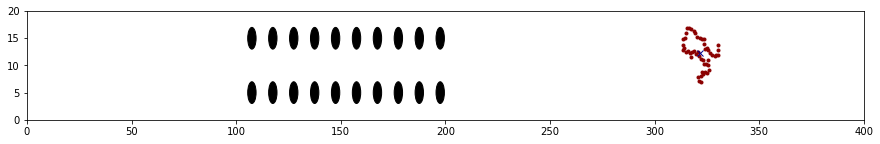

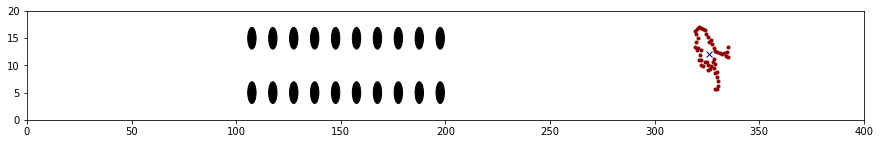

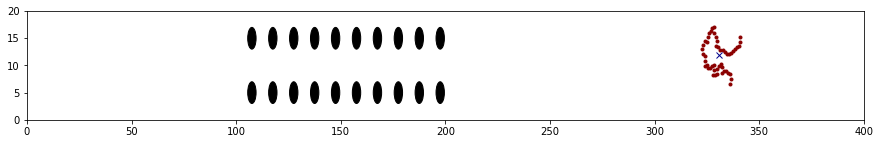

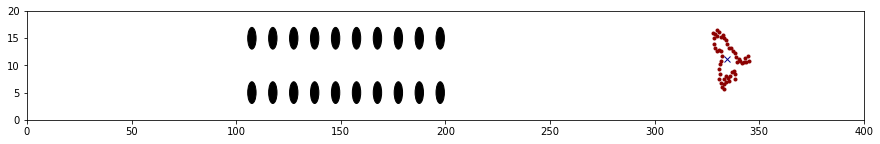

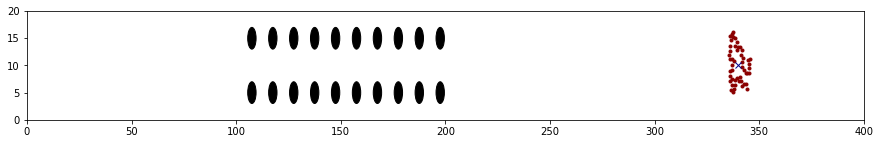

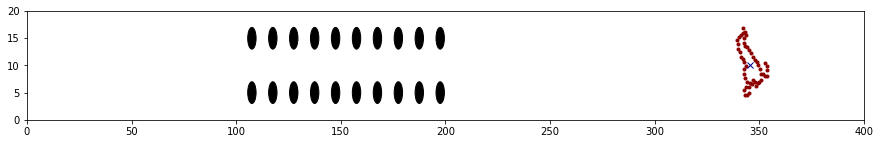

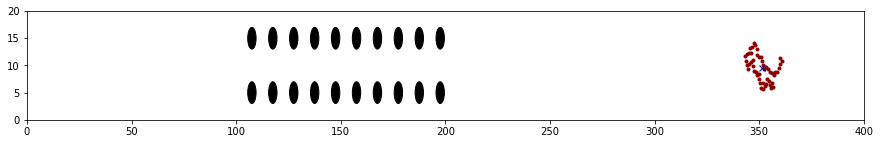

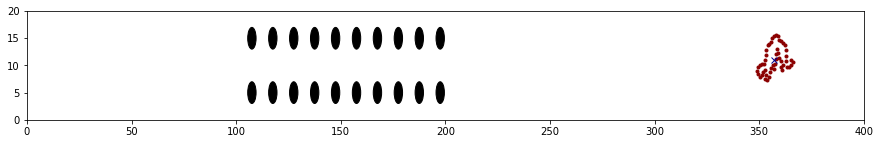

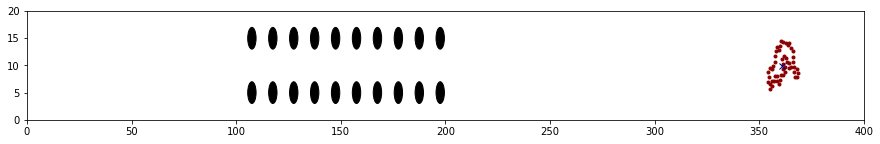

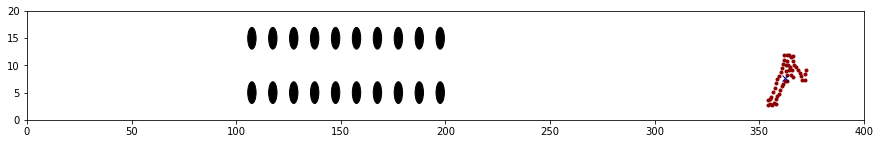

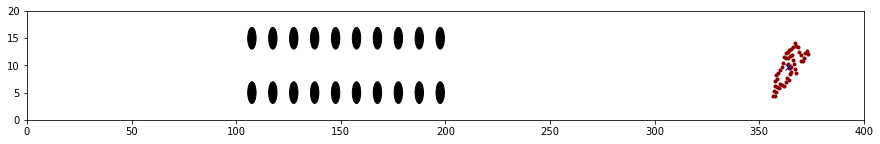

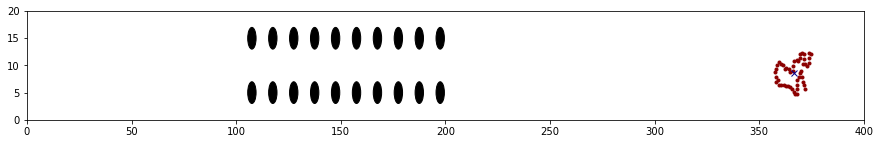

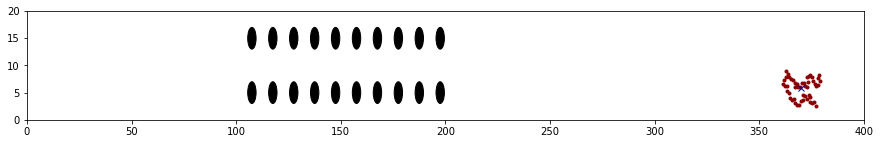

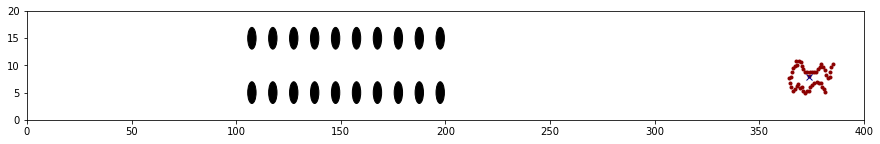

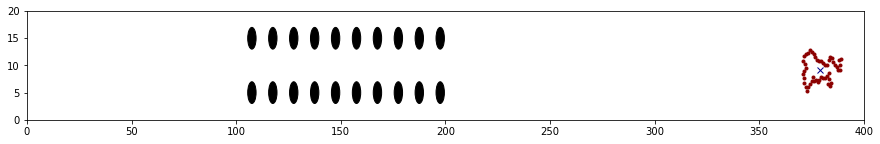

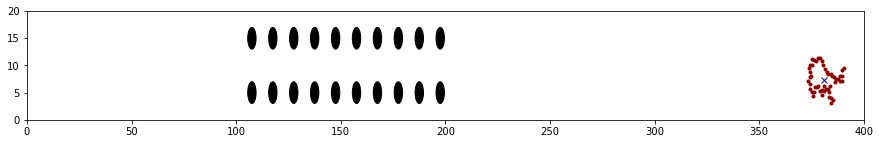

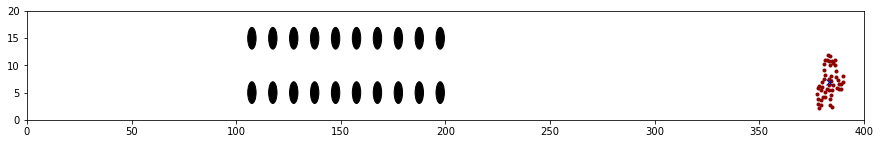

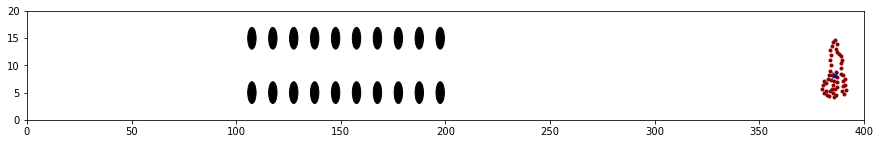

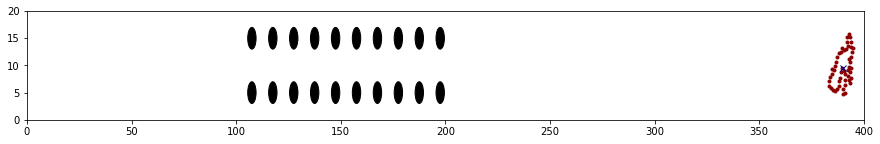

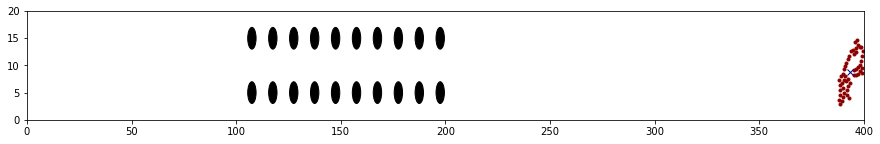

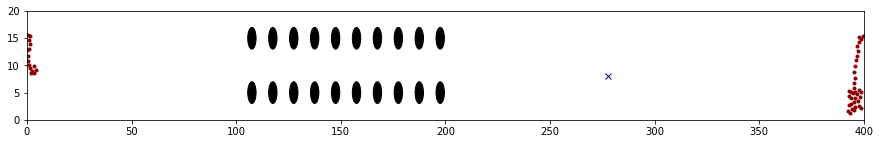

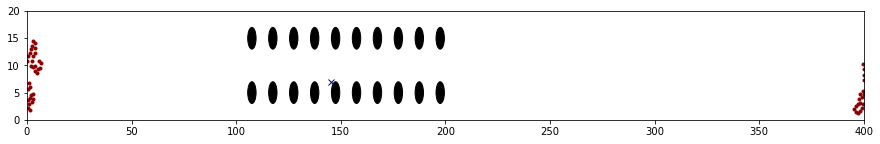

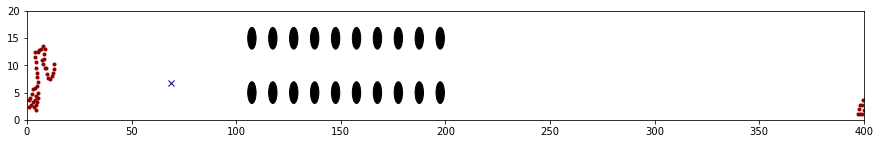

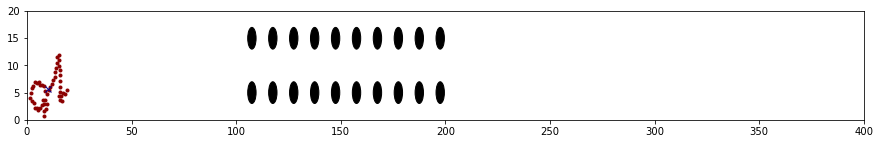

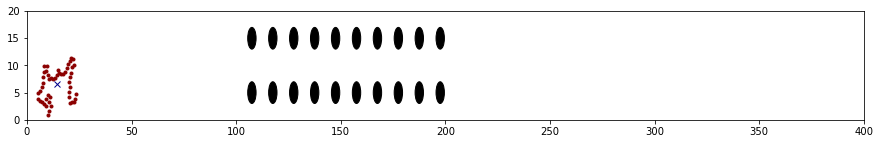

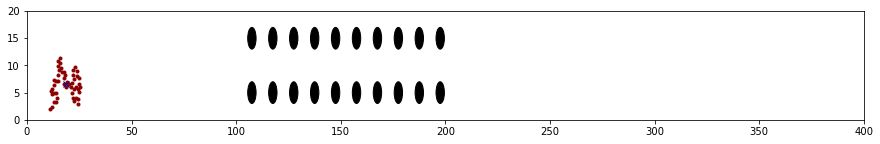

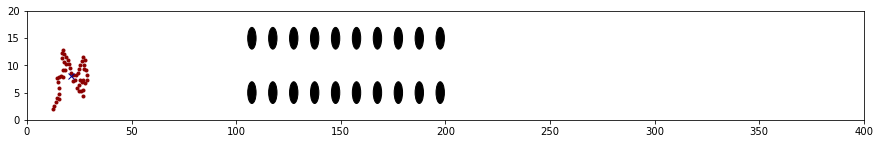

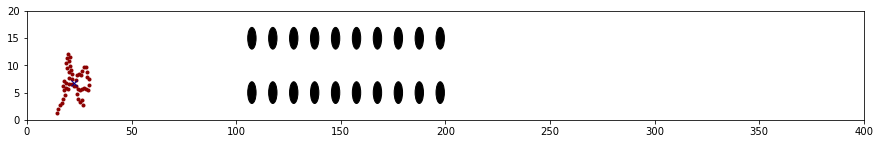

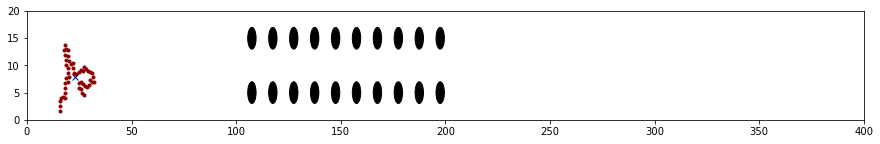

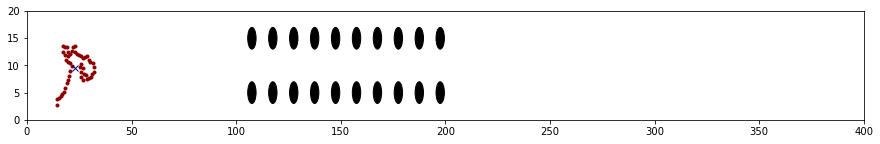

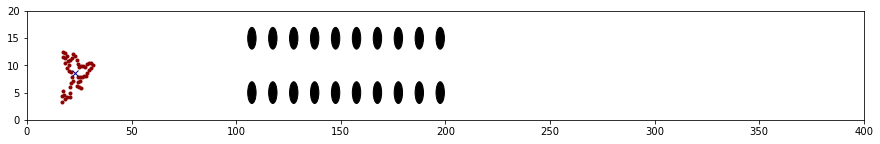

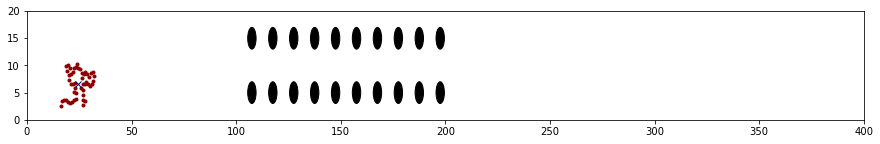

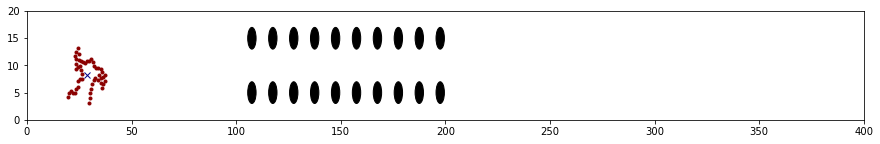

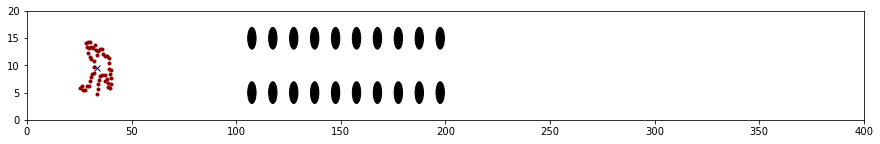

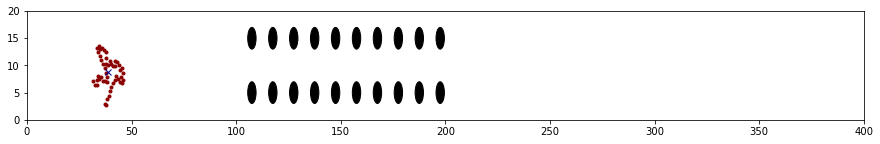

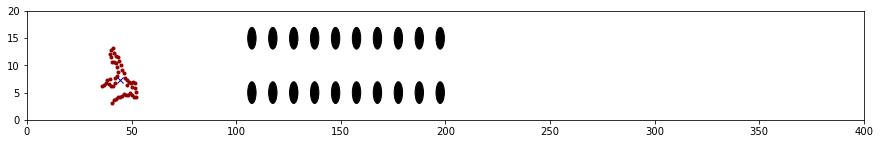

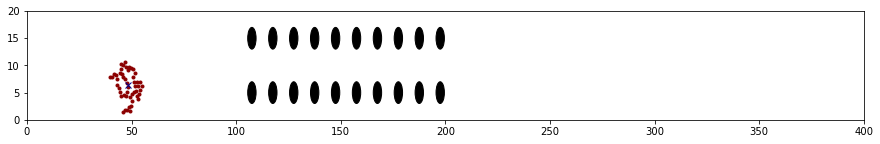

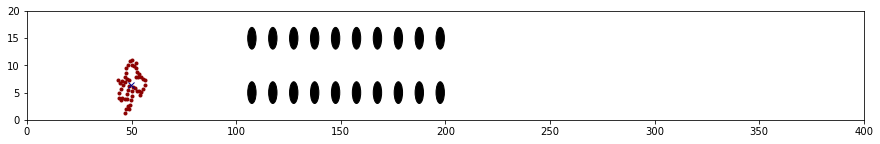

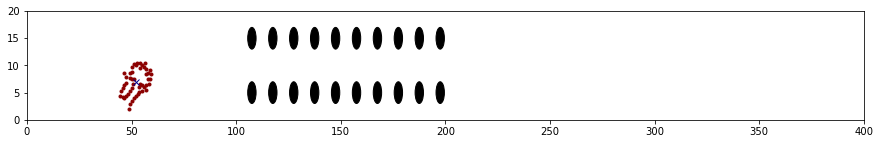

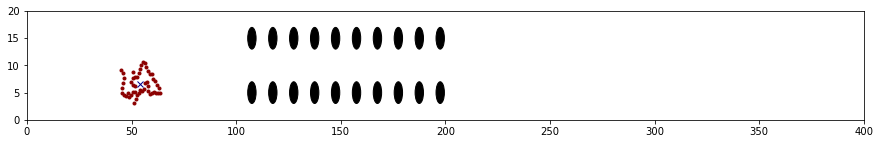

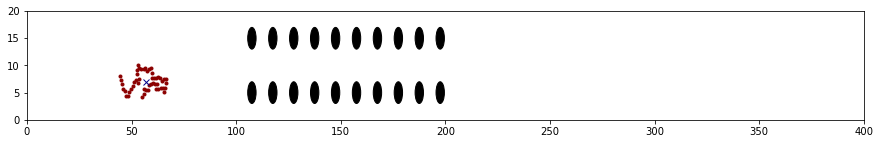

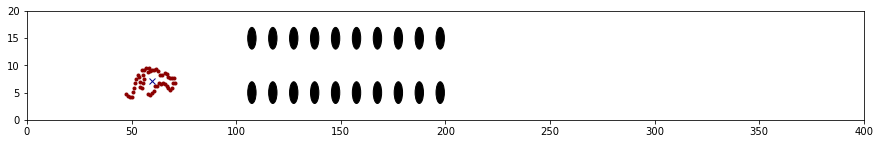

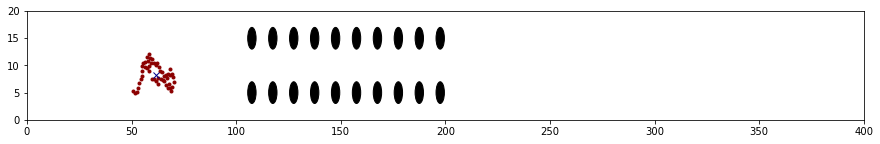

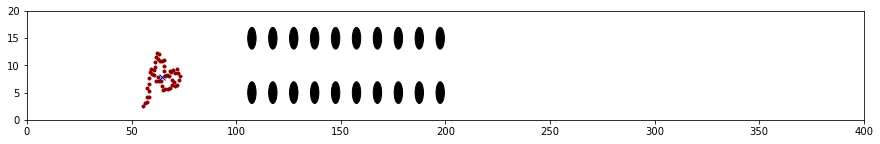

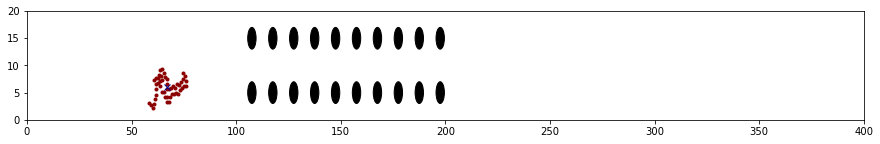

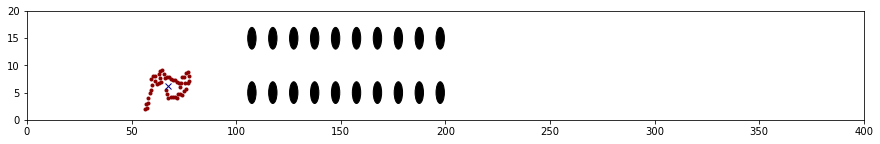

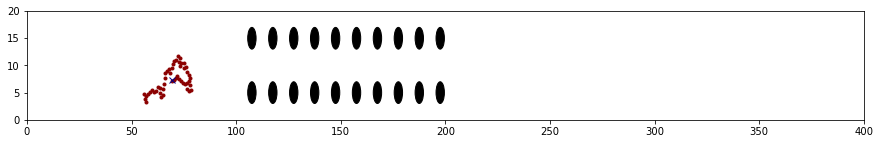

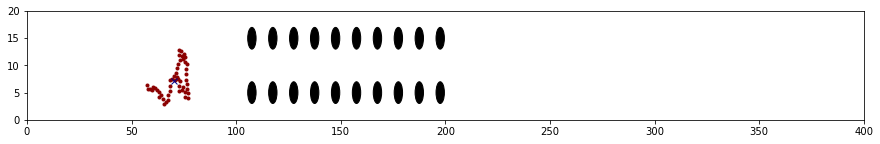

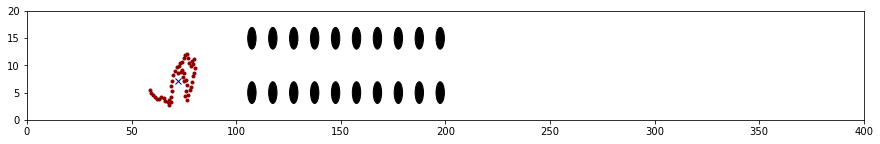

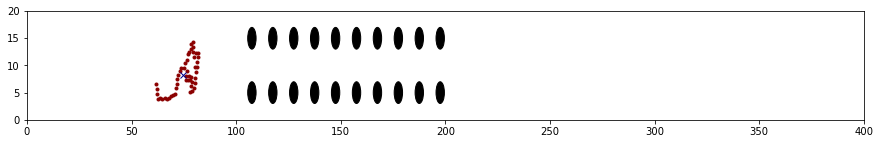

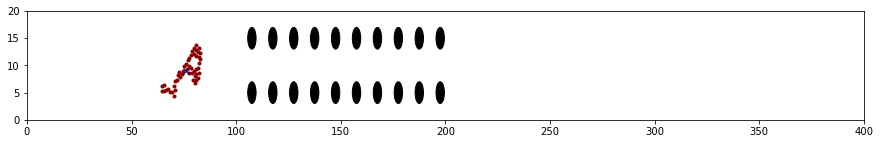

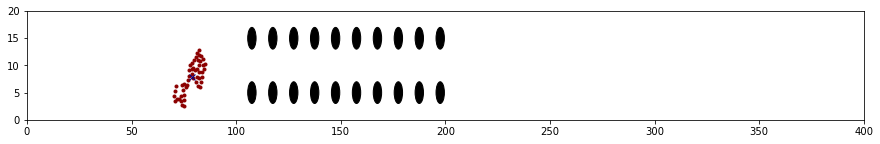

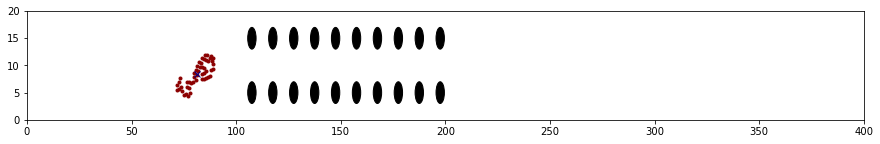

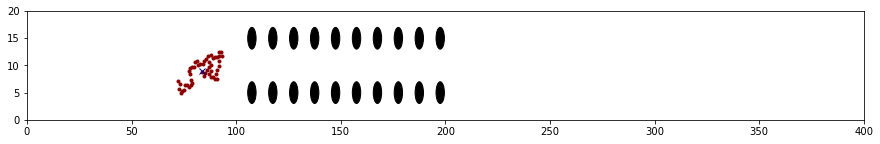

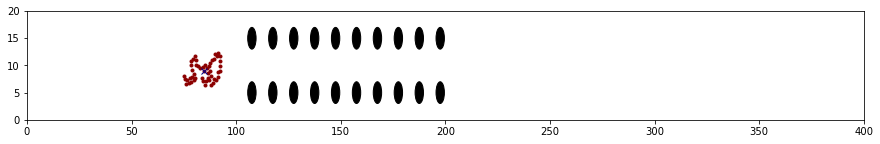

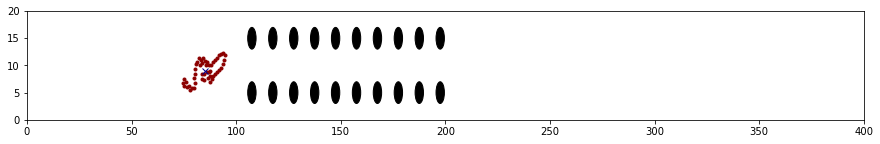

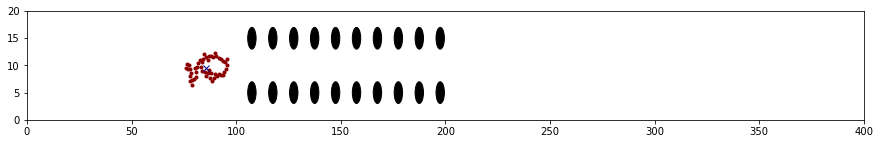

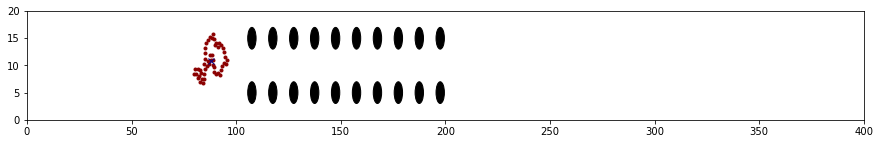

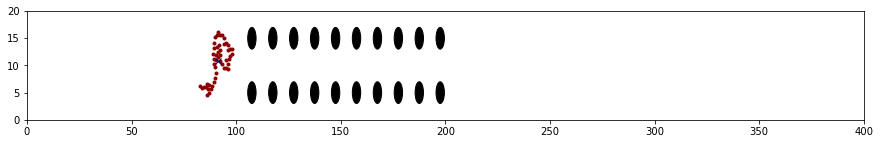

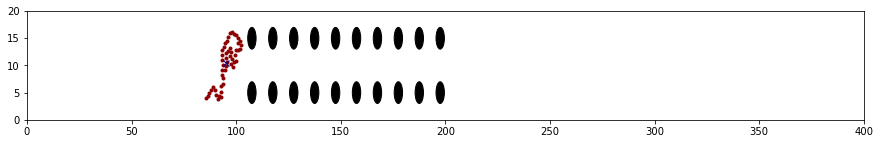

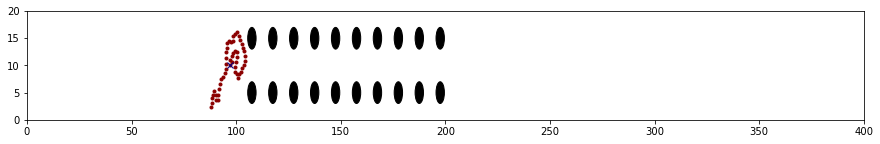

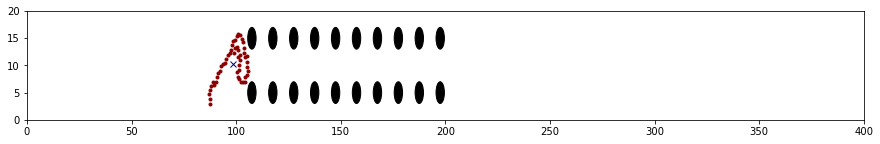

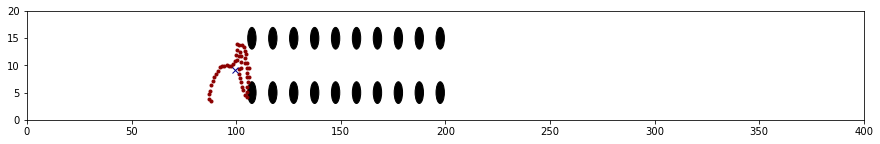

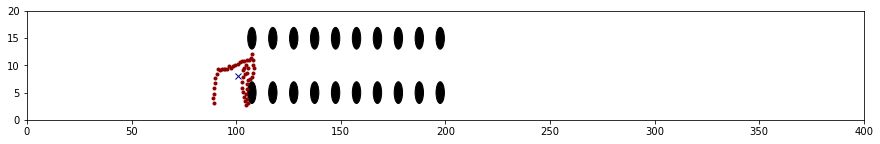

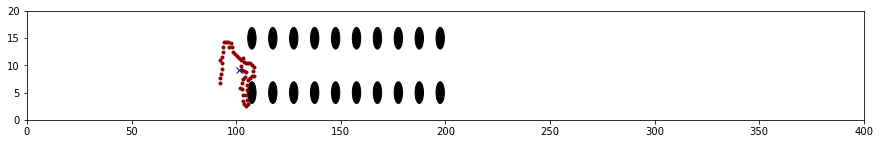

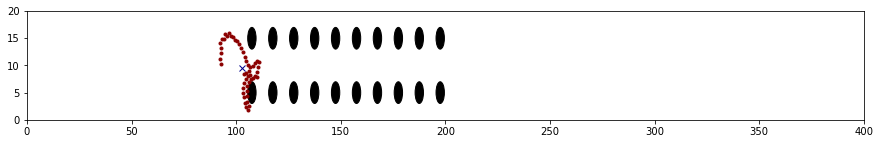

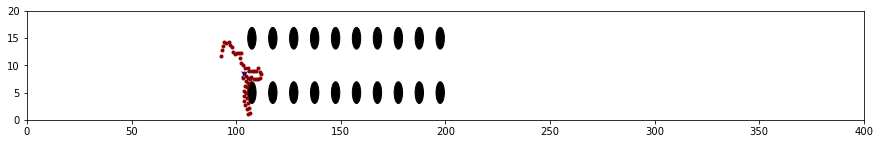

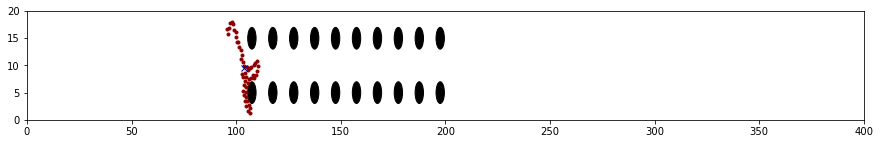

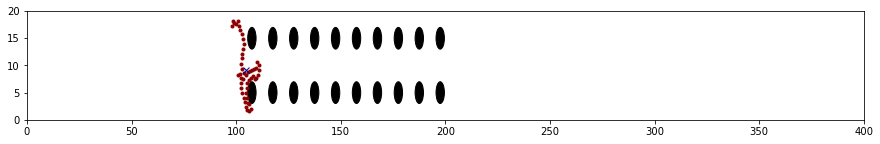

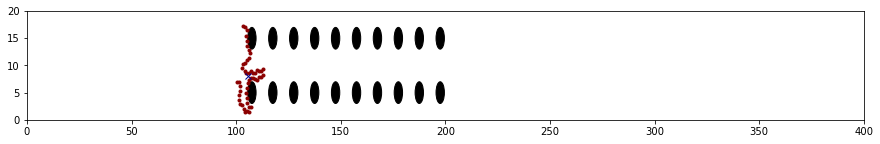

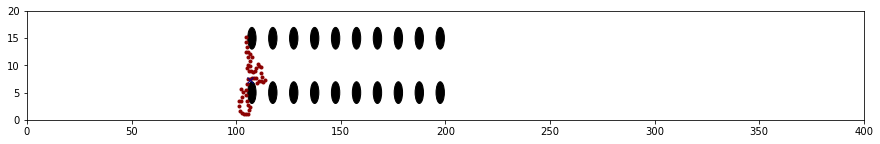

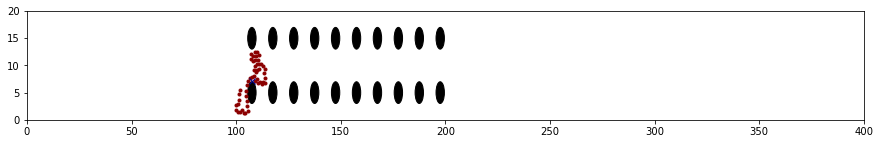

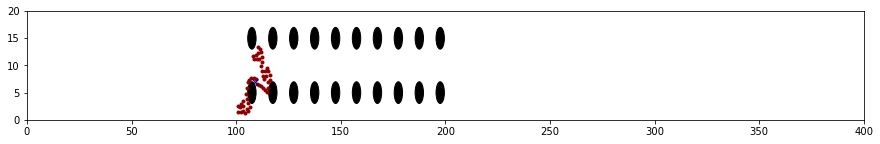

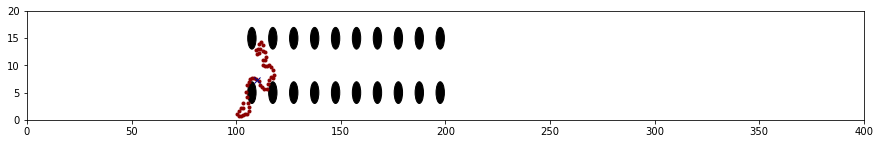

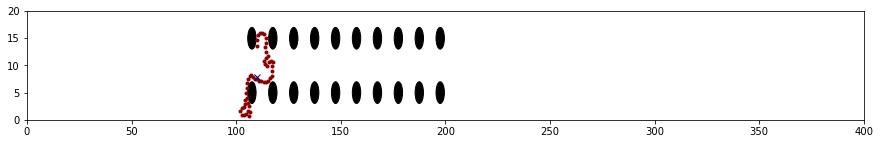

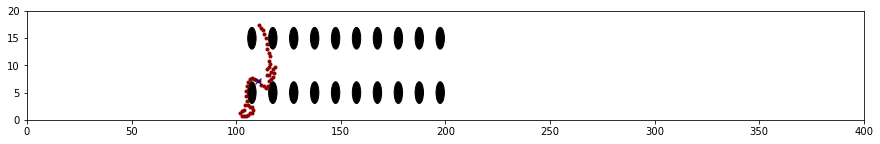

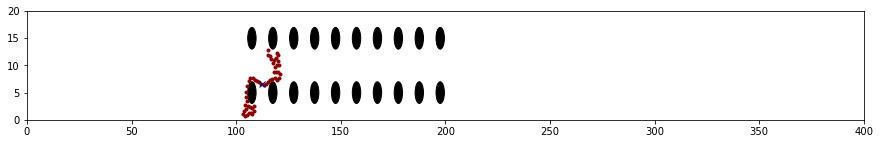

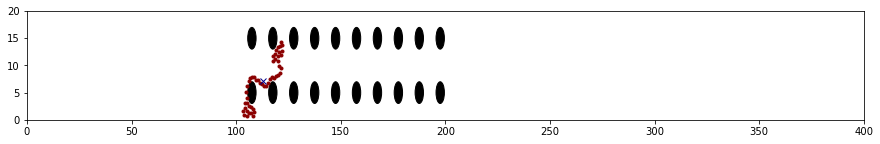

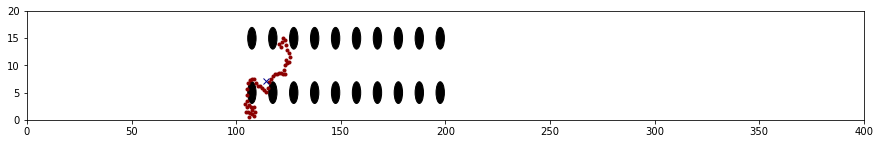

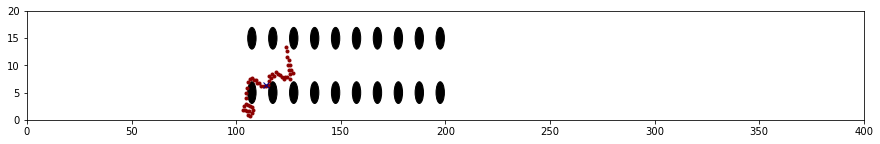

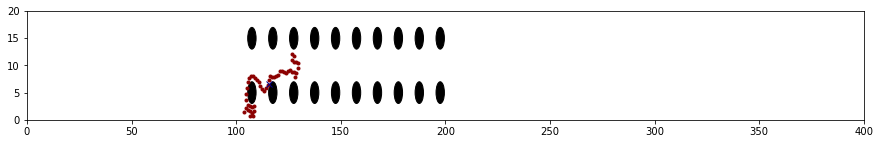

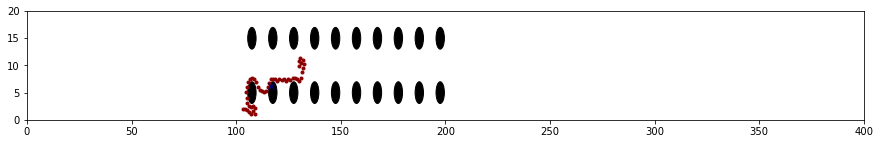

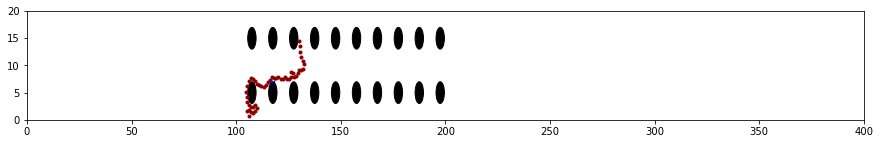

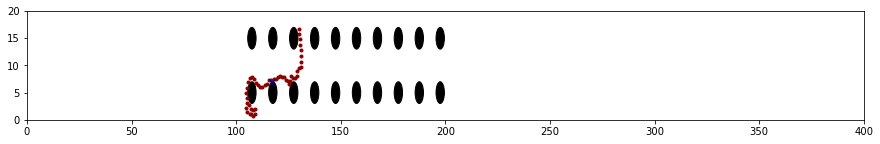

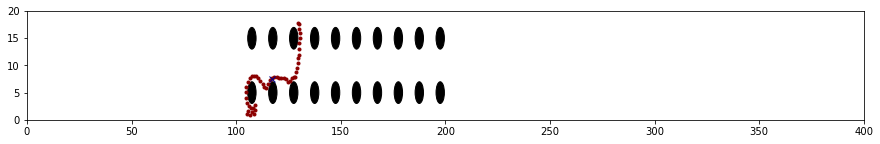

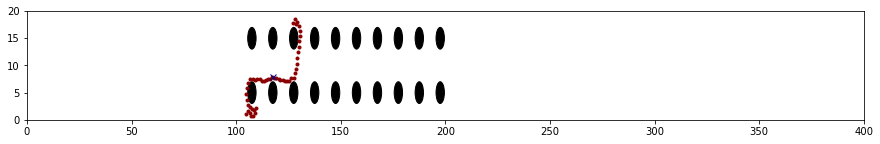

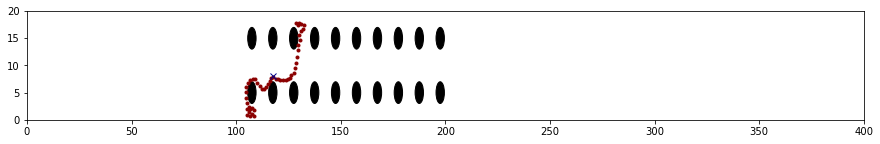

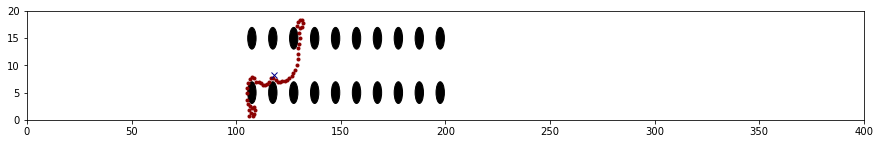

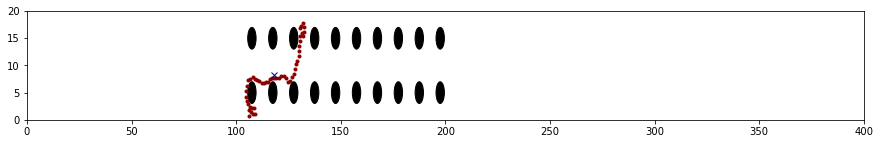

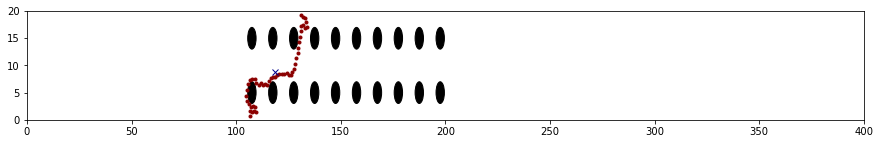

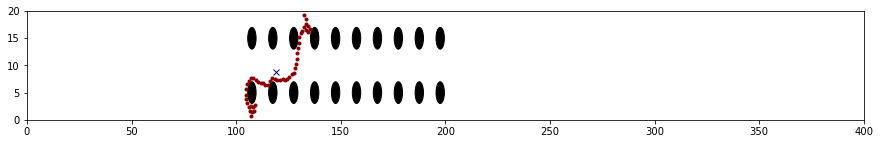

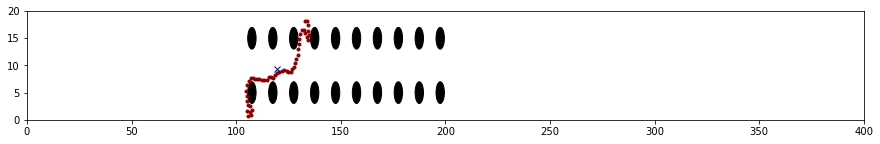

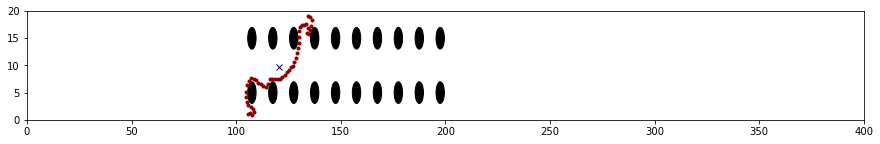

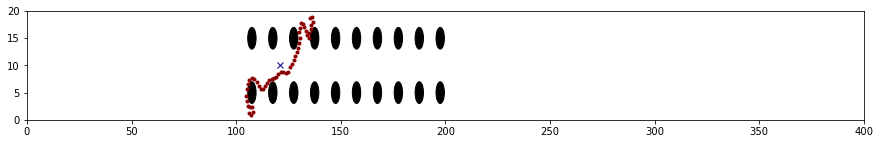

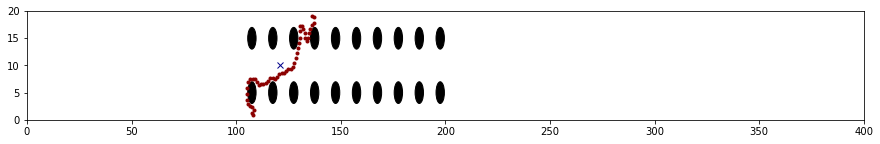

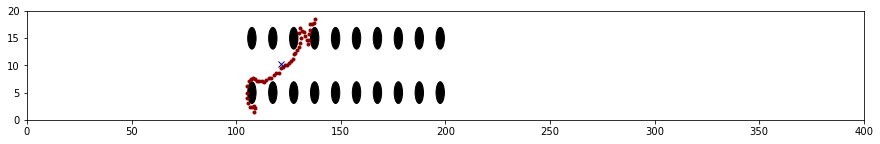

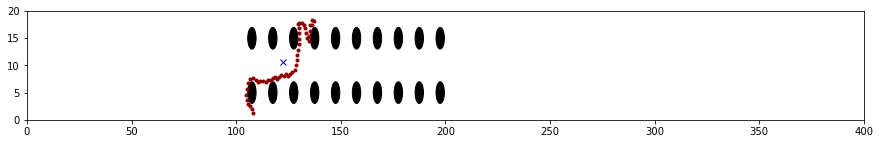

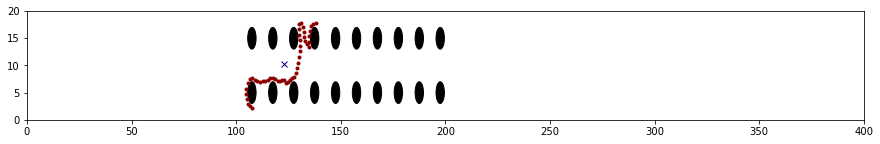

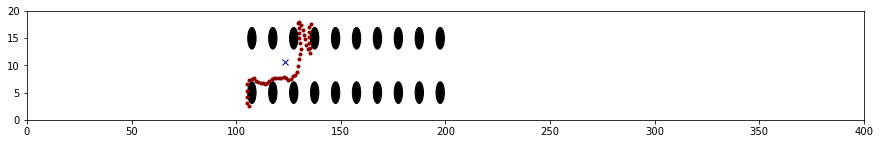

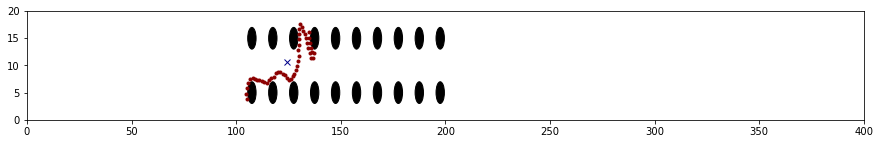

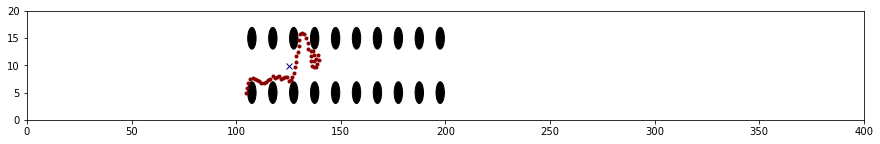

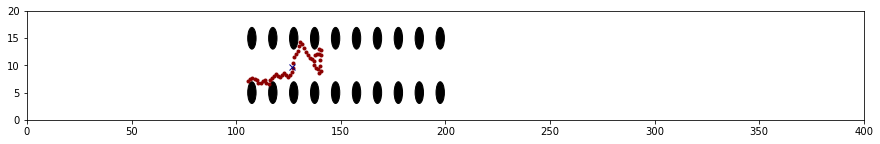

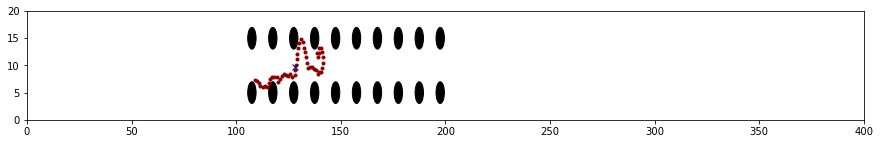

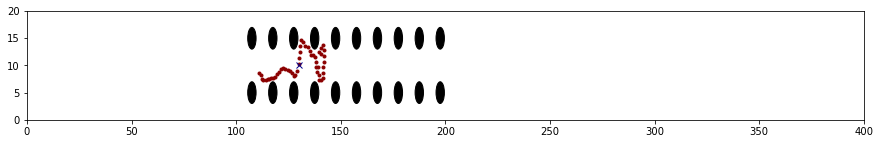

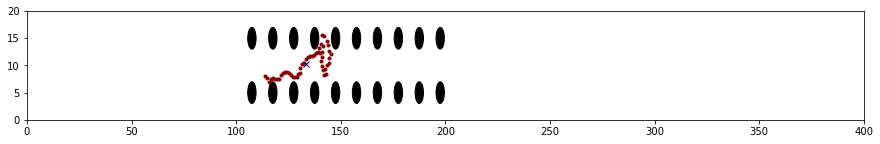

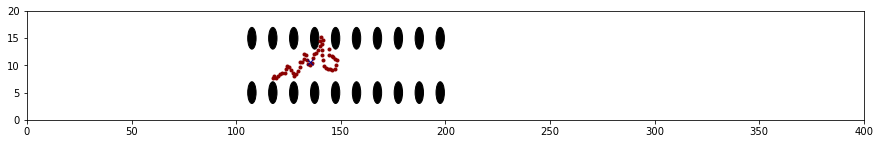

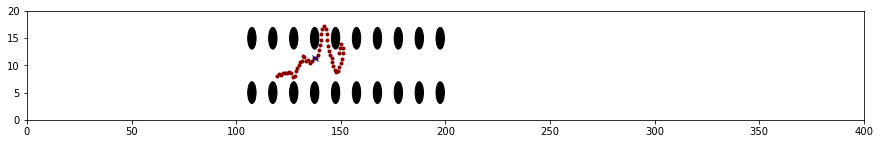

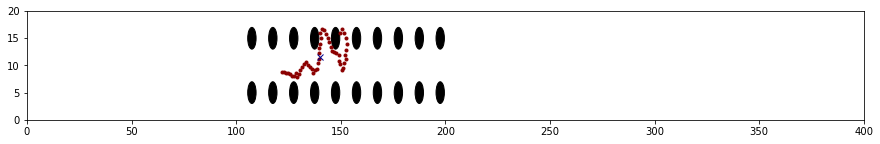

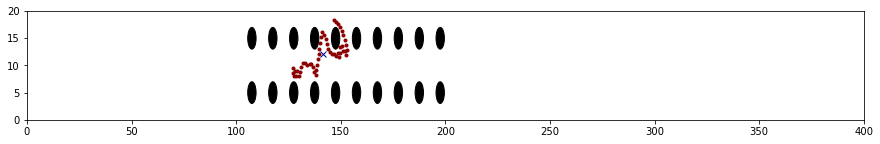

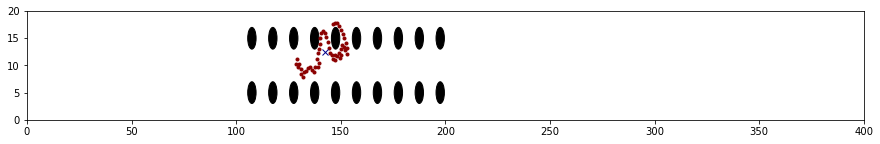

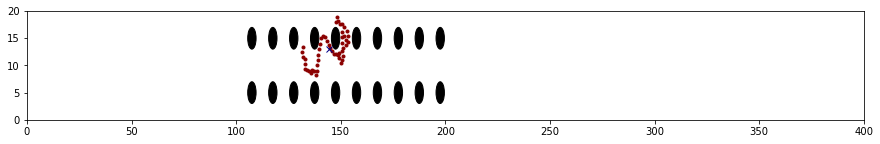

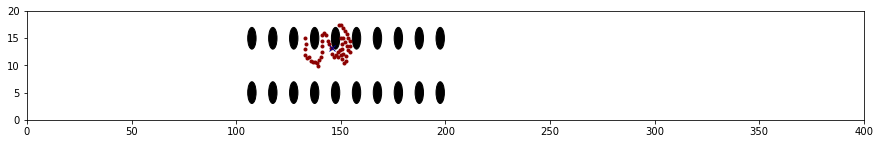

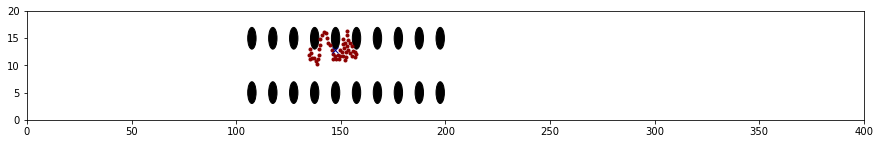

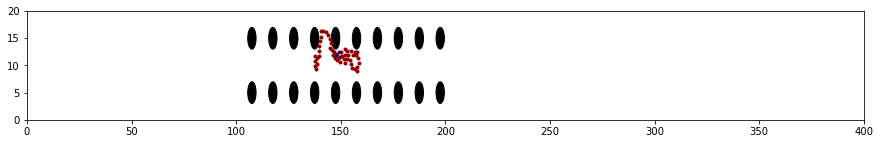

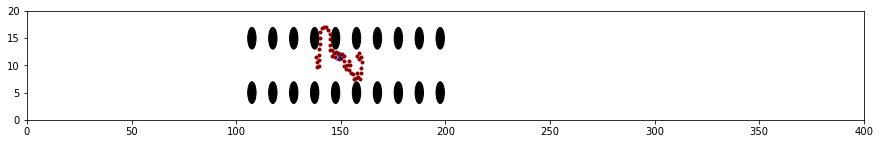

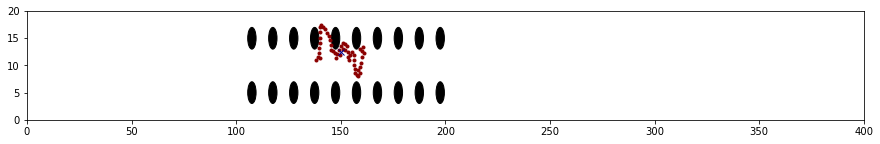

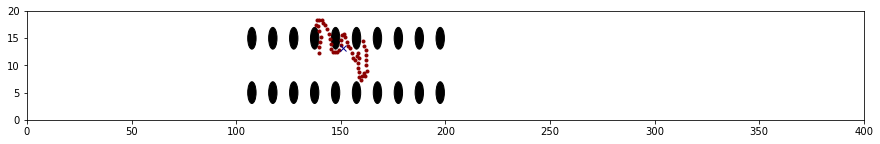

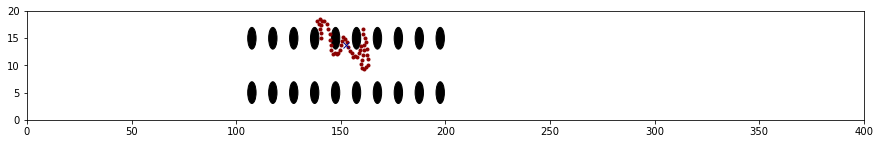

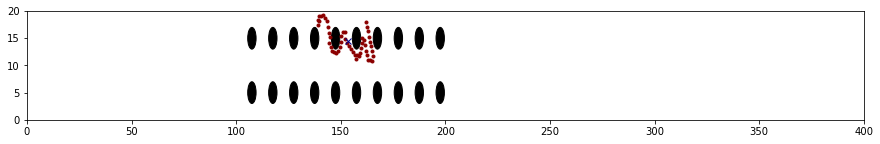

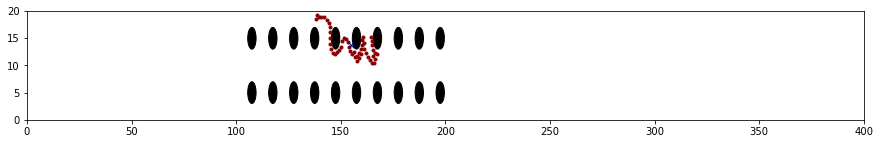

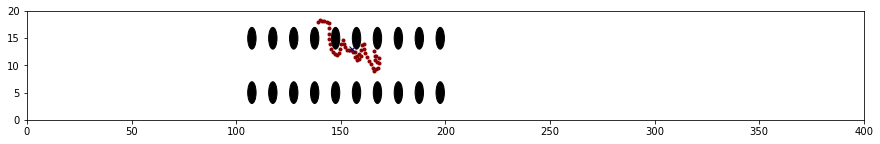

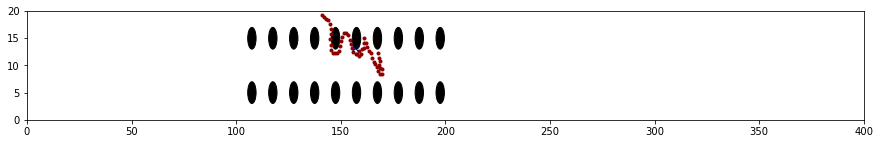

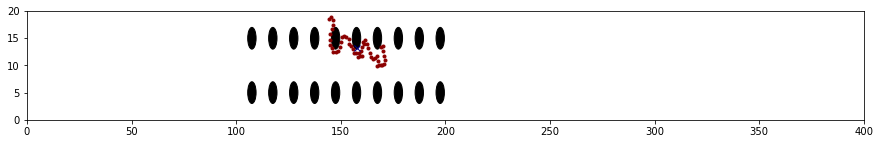

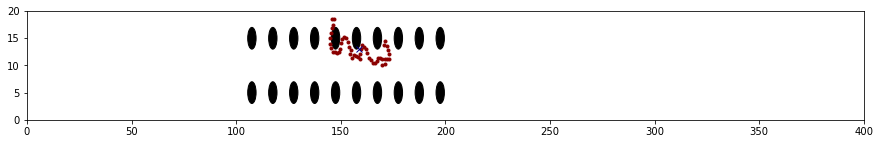

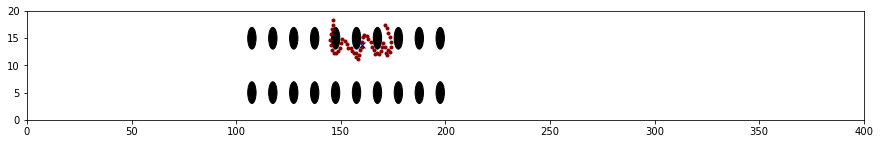

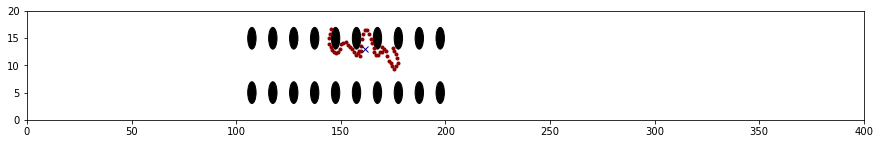

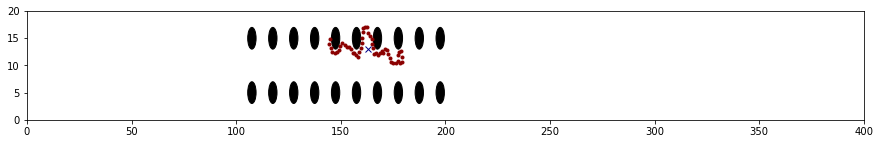

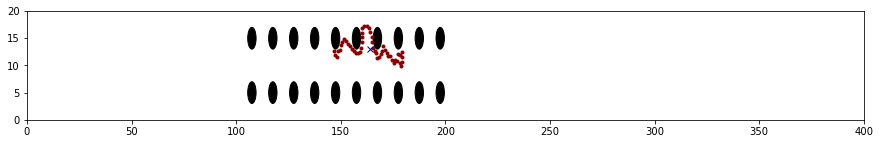

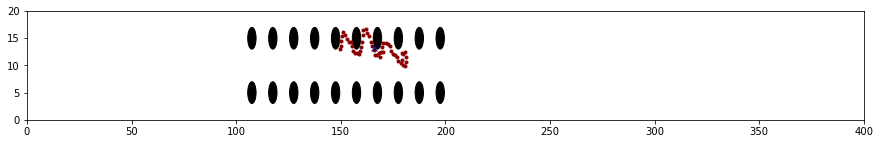

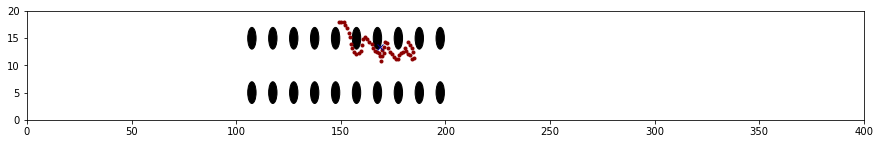

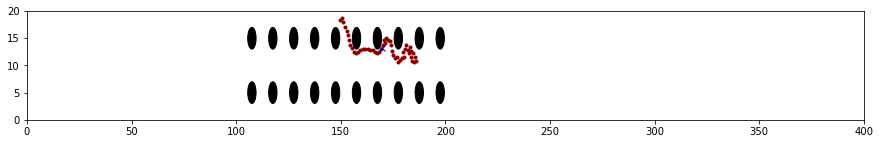

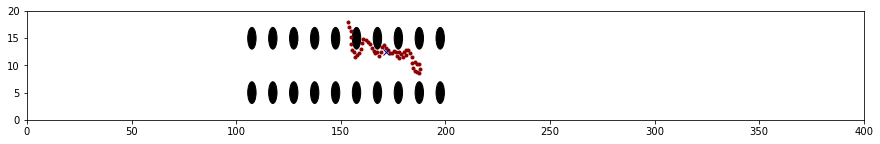

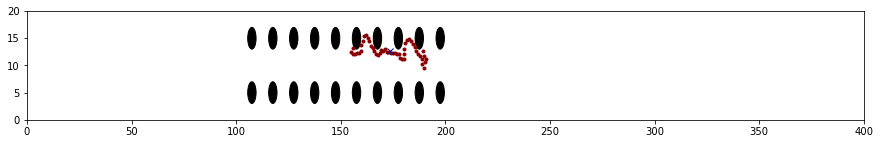

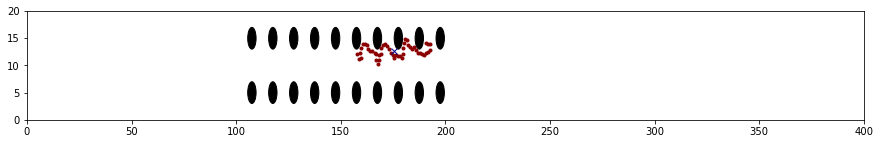

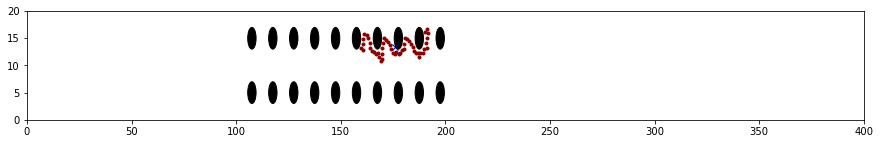

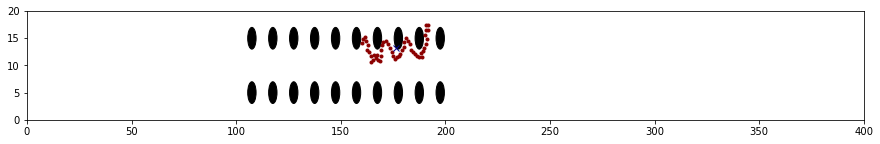

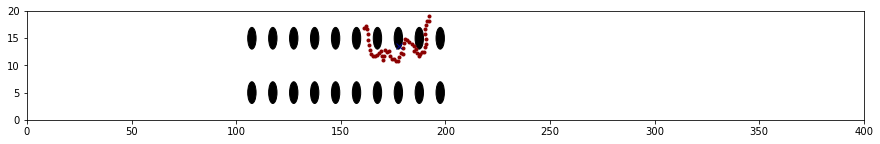

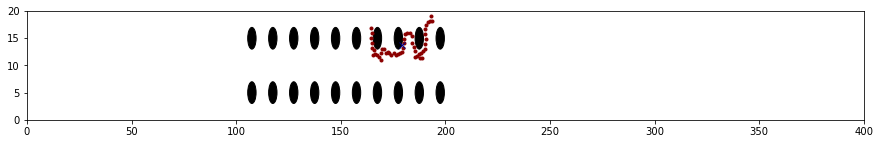

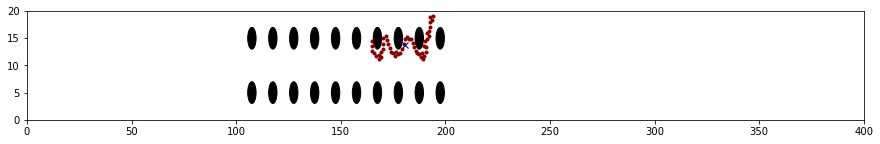

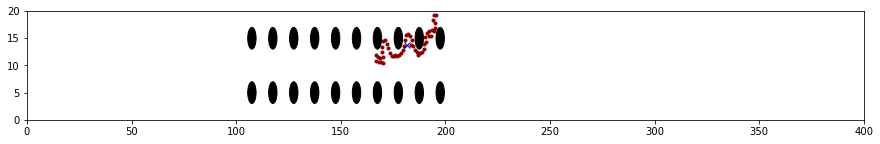

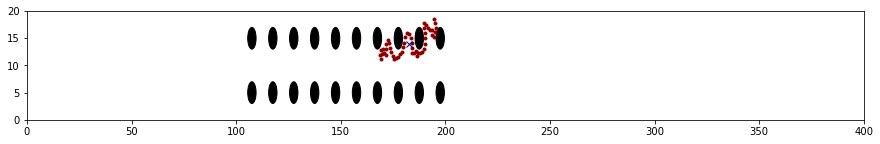

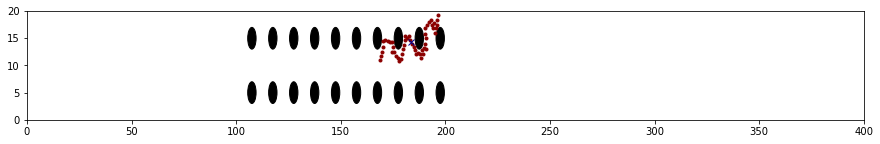

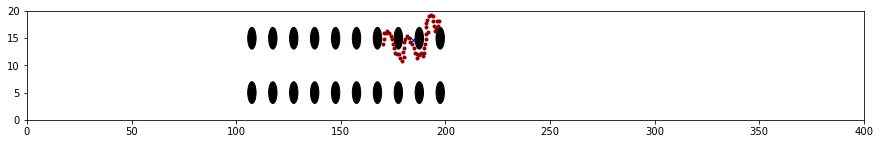

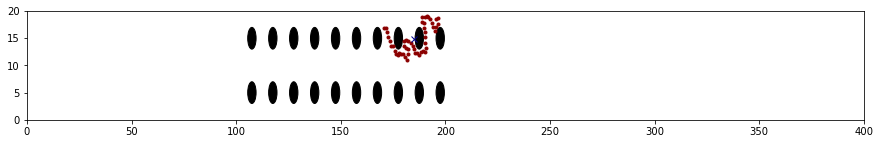

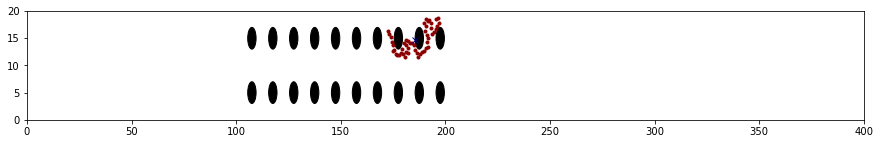

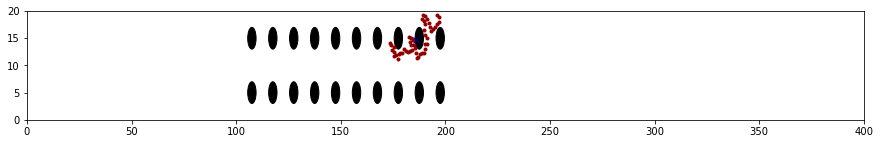

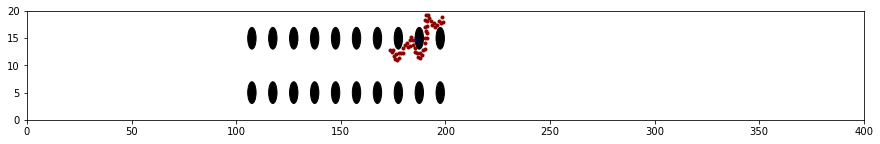

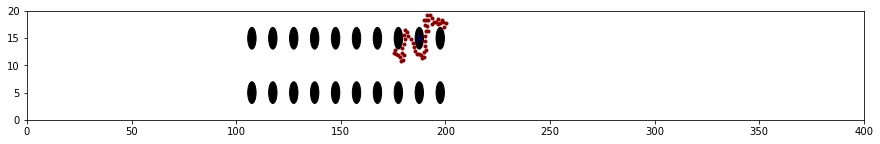

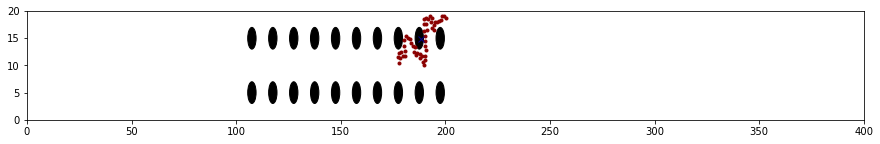

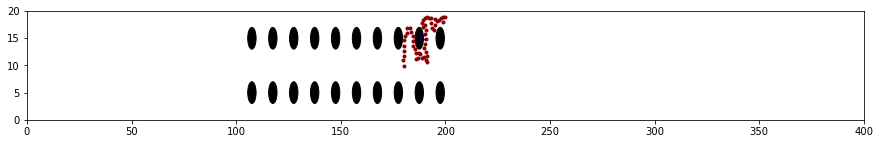

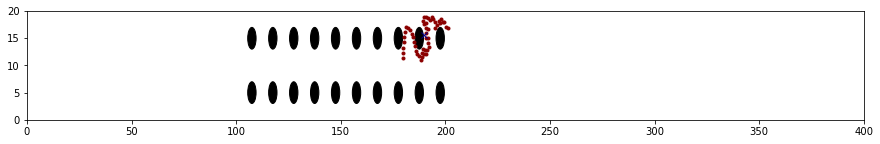

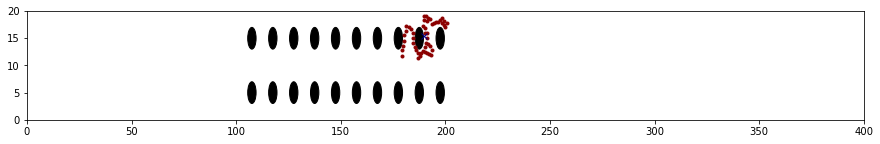

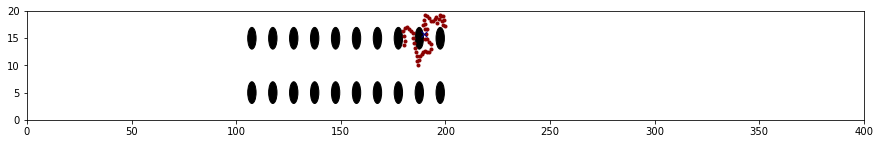

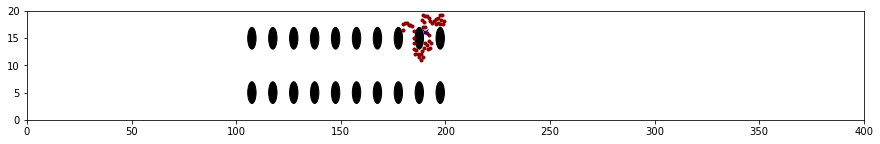

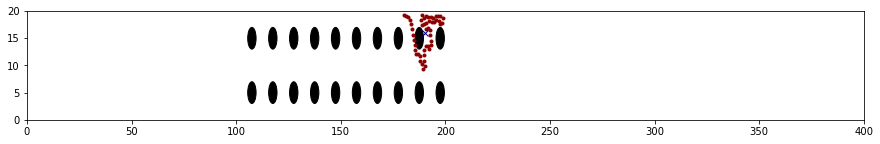

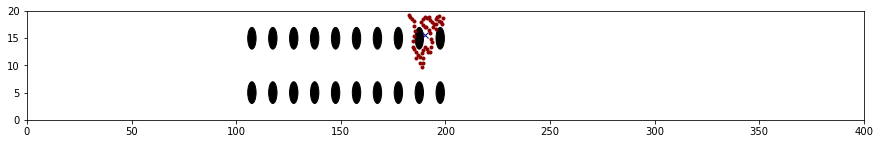

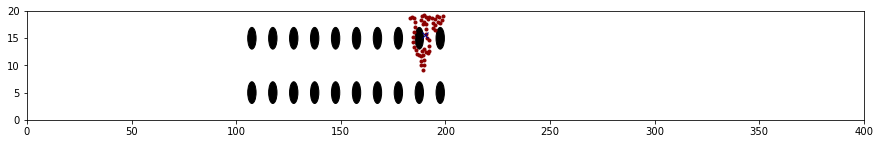

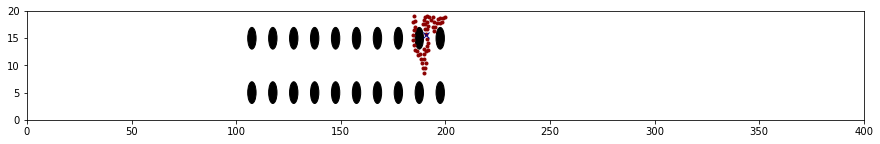

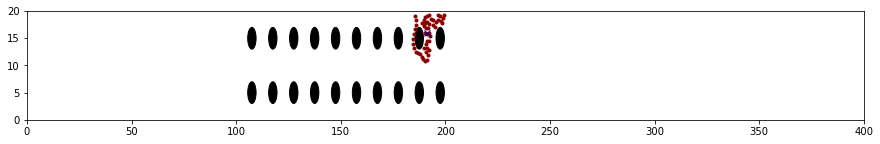

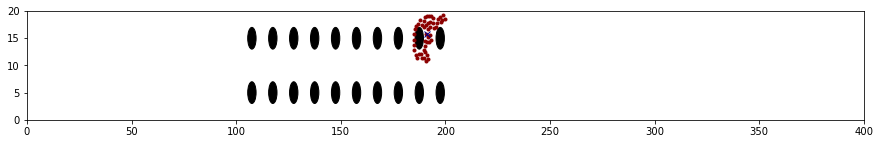

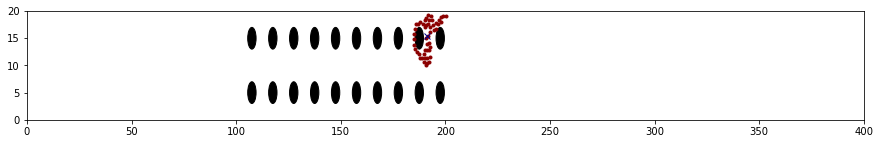

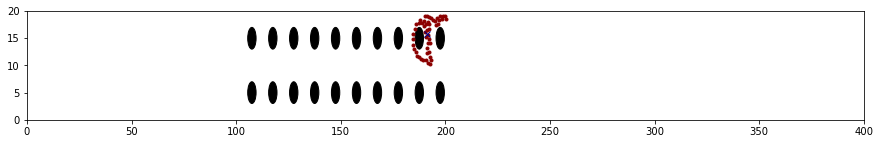

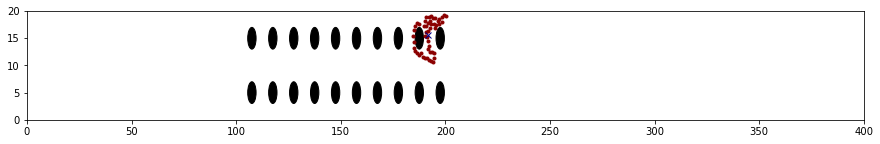

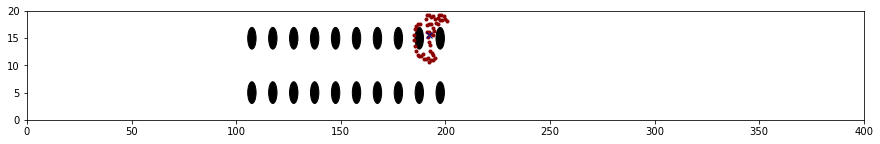

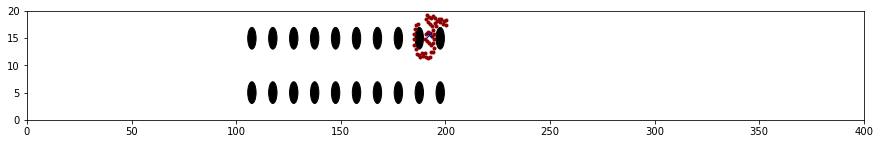

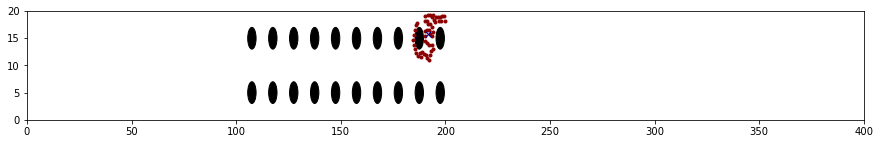

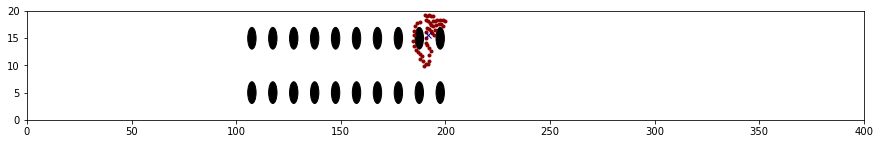

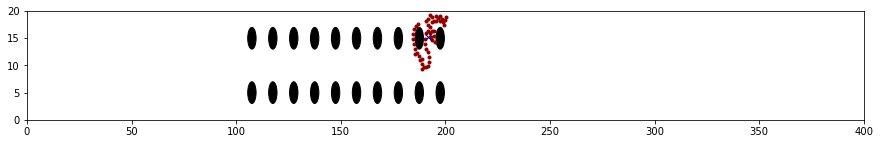

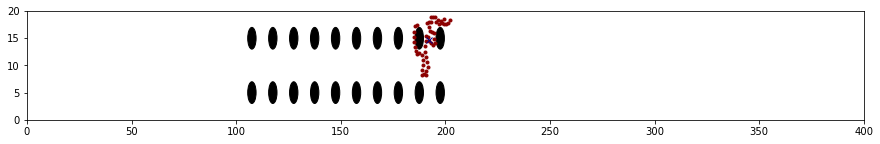

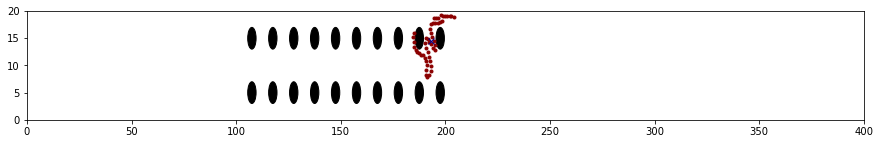

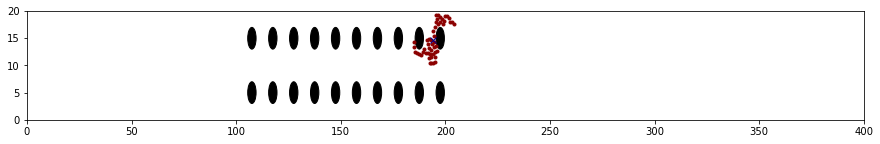

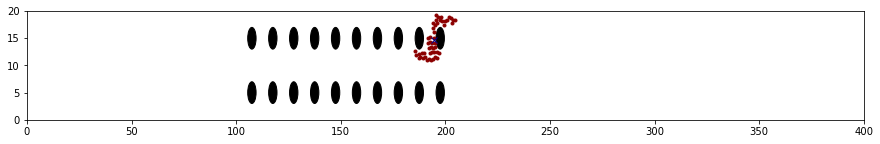

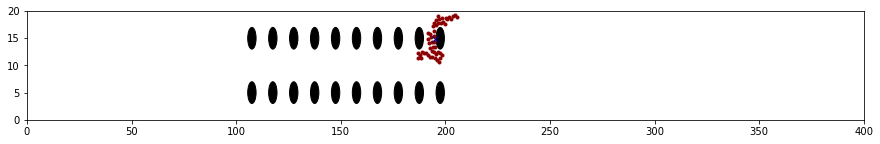

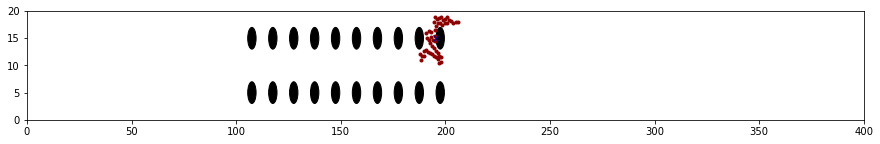

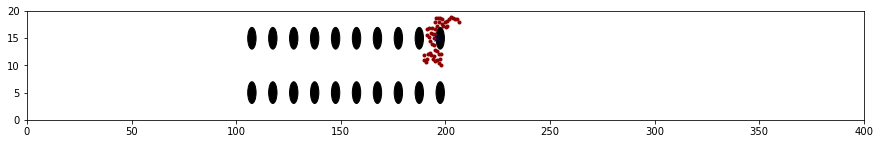

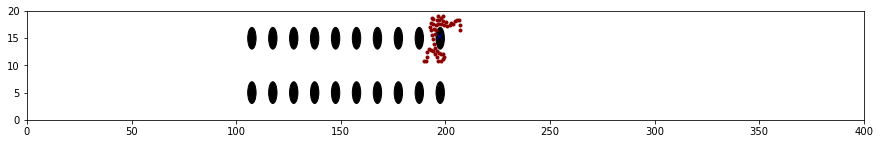

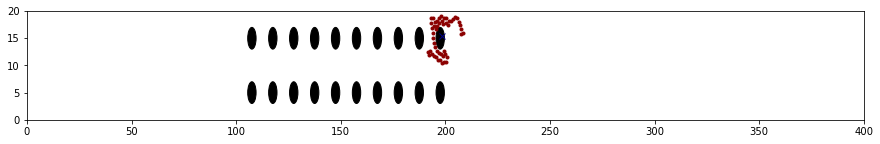

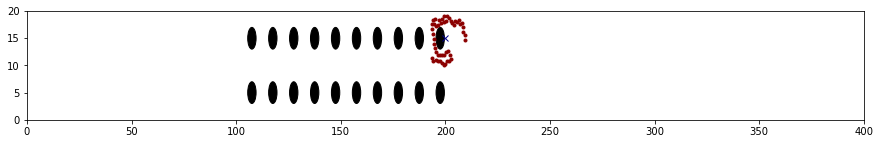

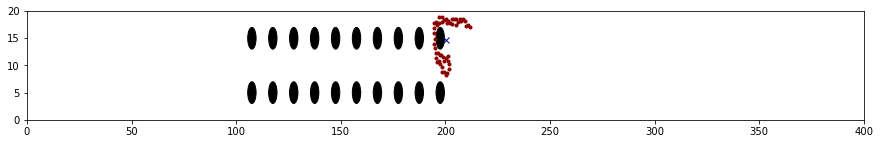

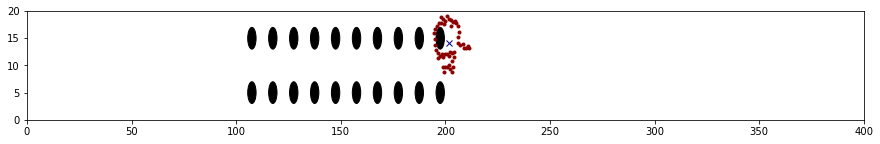

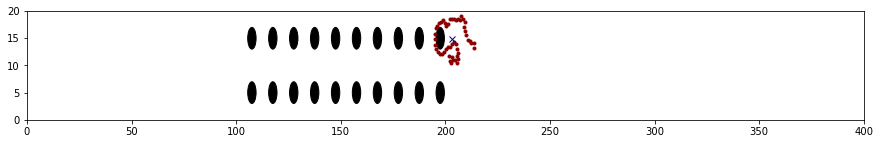

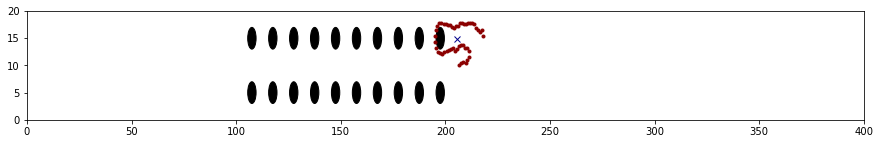

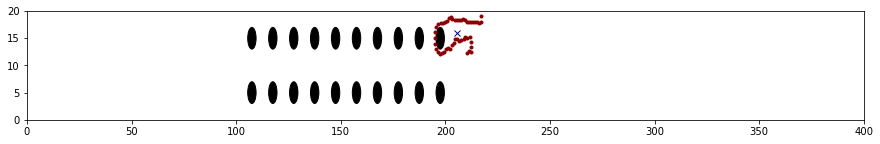

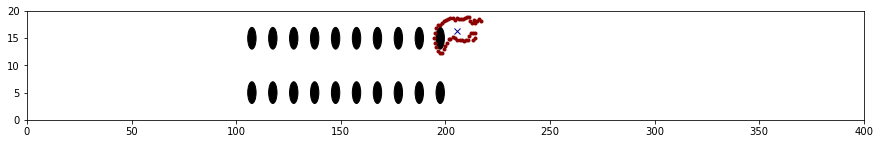

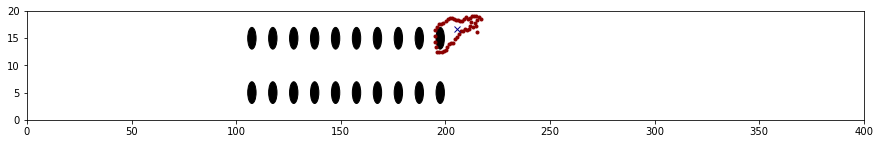

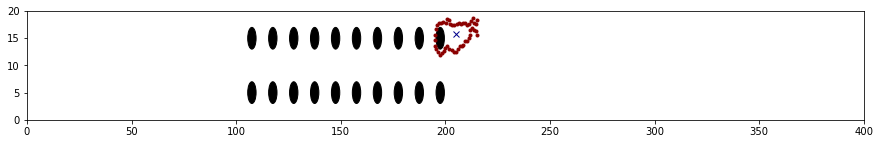

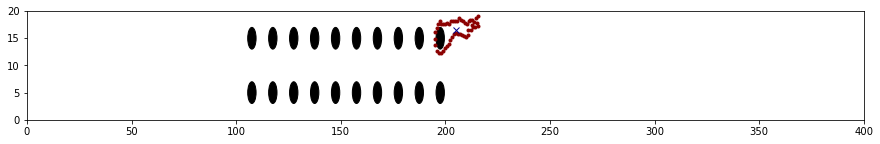

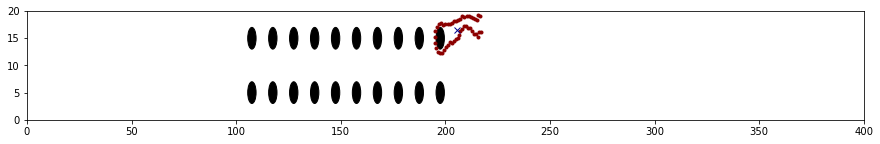

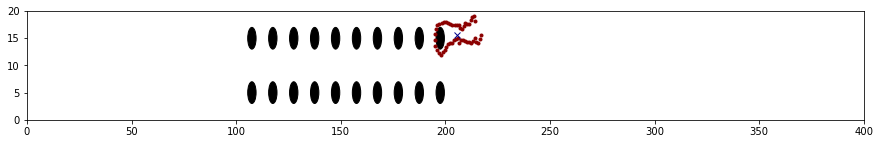

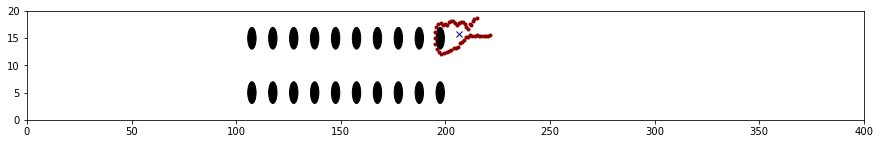

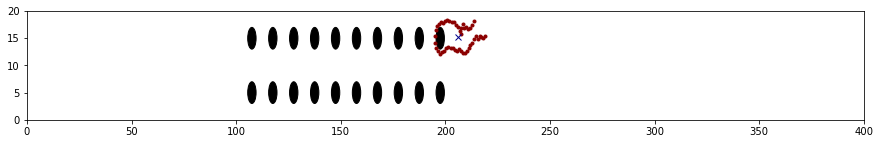

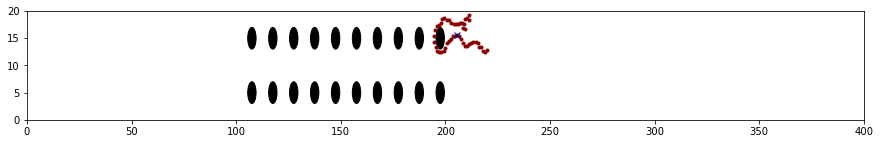

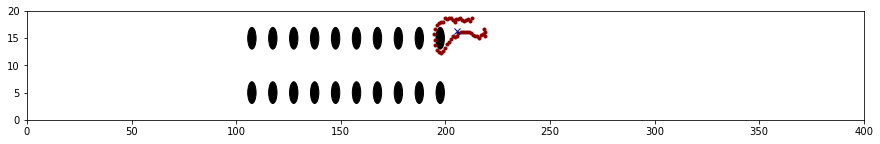

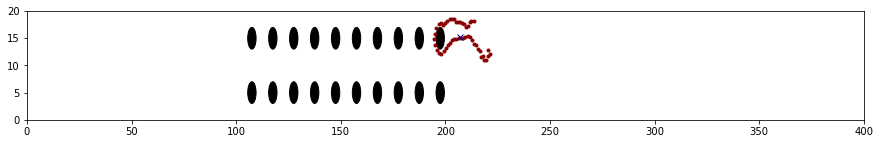

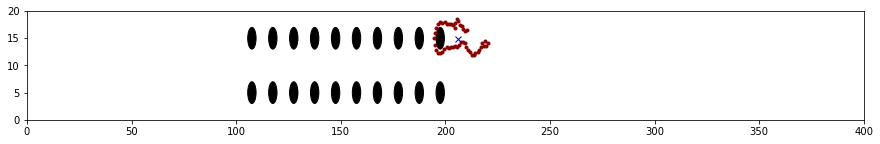

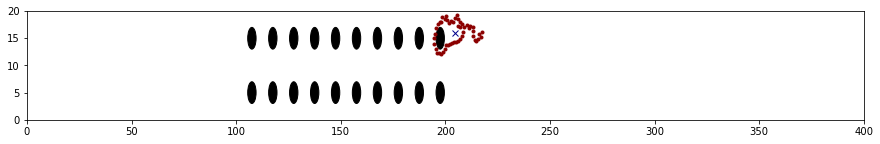

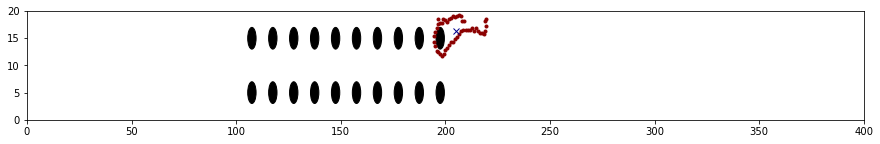

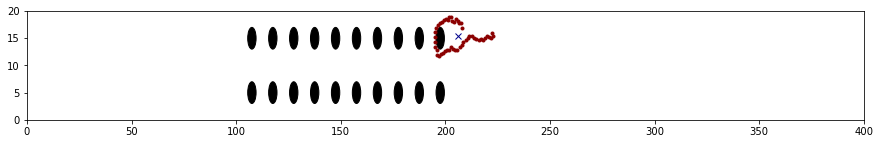

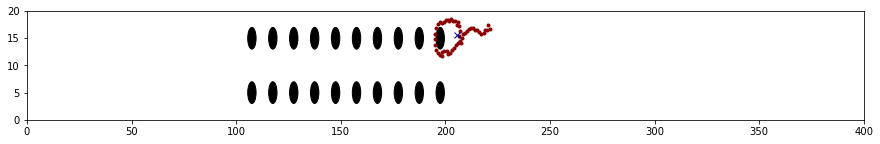

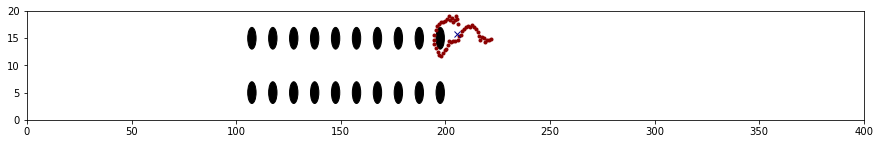

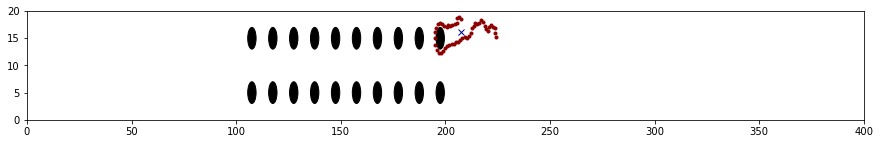

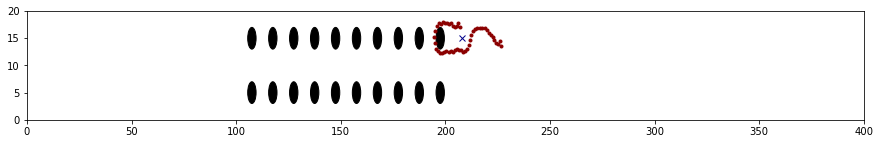

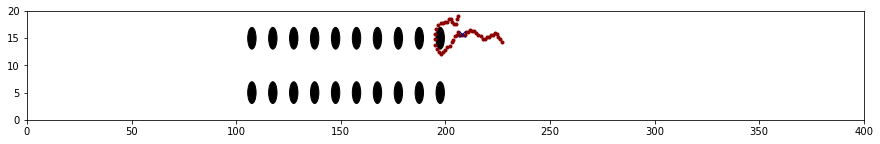

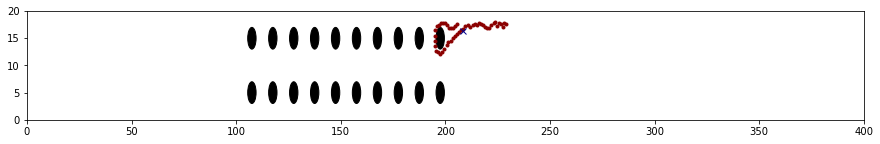

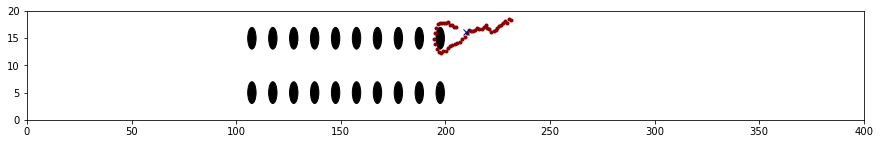

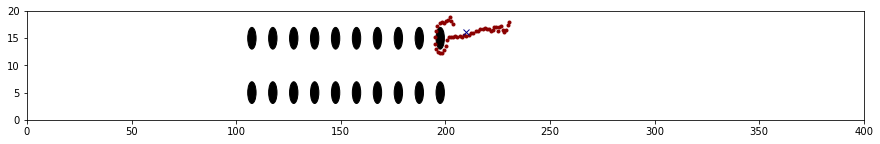

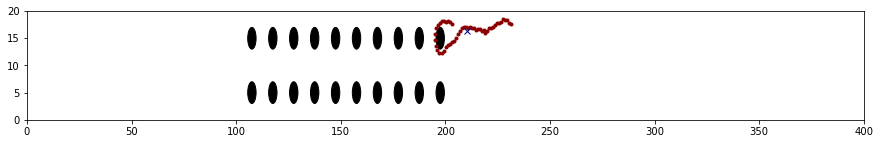

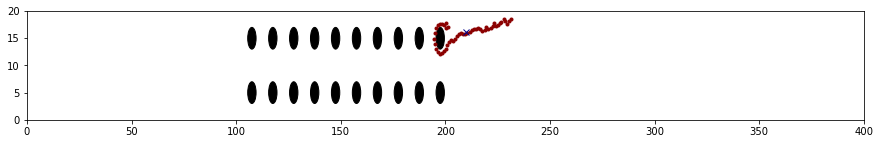

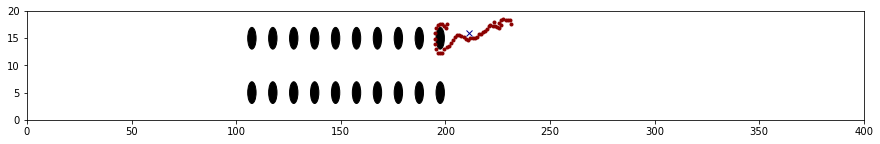

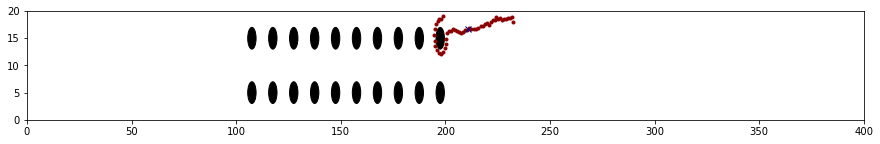

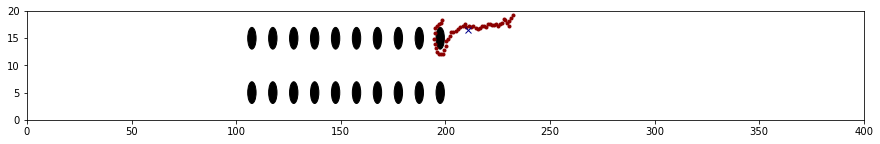

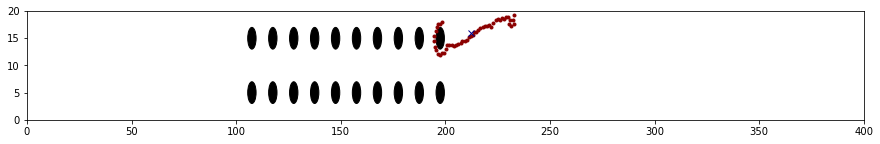

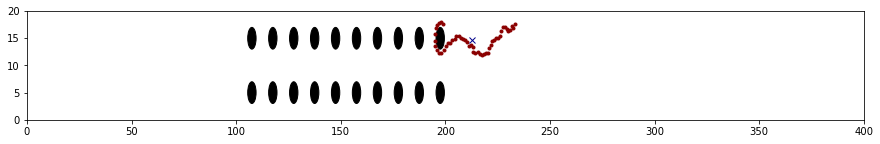

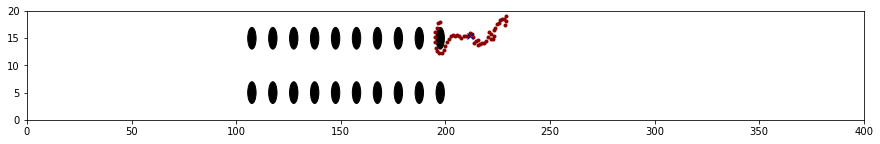

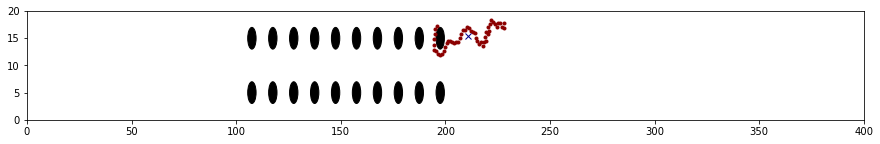

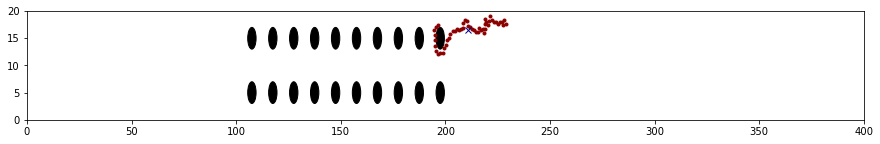

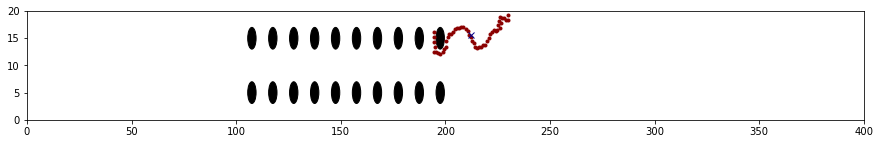

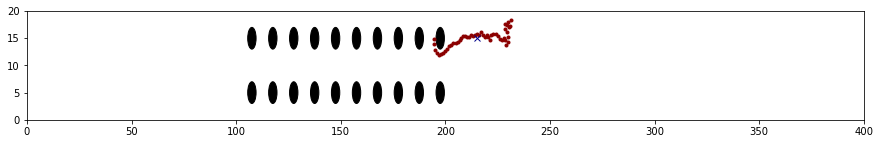

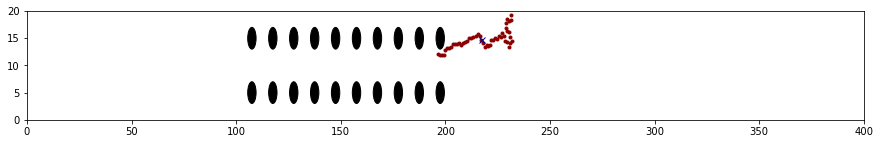

In [55]:
def add_obstacles(obstacles, axis):
     for index, o in obstacles.iterrows():
        circle = plt.Circle((o['x'], o['y']), int(obstacles['r'][0]), color = 'black')
        axis.add_artist(circle)
        

point_size = 3
for it, df in enumerate(monomers_t[1000:]):
    if (it % 100 == 0):
        fig, ax = plt.subplots(figsize = (15,2))
        if with_obstacles:
            add_obstacles(obstacles, ax)
           
        ax.plot(df['x'], df['y'], 'o', markersize = point_size, color = 'darkred')
        com_x = df['x'].mean()
        com_y = df['y'].mean()
        ax.plot(com_x, com_y, 'x', markersize = 2 * point_size, color = 'darkblue')
        ax.set_xlim((0, x_dim))
        ax.set_ylim((0, y_dim))
        #plt.savefig(f"Test/monomer_plot_{it}.png")
        plt.show()

# Gyration Tensor

In [ ]:
def preprocess_gyration(polymer_t):
    for df in tqdm(polymer_t):
        df['x_rel_com'] = df['x'] - df['x'].mean()
        df['y_rel_com'] = df['y'] - df['y'].mean()
        df['g_xx'] = df['x_rel_com'] * df['x_rel_com']
        df['g_xy'] = df['x_rel_com'] * df['y_rel_com']
        df['g_yy'] = df['y_rel_com'] * df['y_rel_com']
    com_x = [df['x'].mean() for df in polymer_t]
    G_xx = [df['g_xx'].mean() for df in polymer_t]
    G_xy = [df['g_xy'].mean() for df in polymer_t]
    G_yy = [df['g_yy'].mean() for df in polymer_t]
    return com_x, G_xx, G_xy, G_yy

def plot_gyration_tensor(x_pos, G_xx, G_xy, G_yy):
    x_pos = np.array(x_pos)
    G_xx = np.array(G_xx)
    G_xy = np.array(G_xy)
    G_yy = np.array(G_yy)
    n_regions = 20
    regions = np.linspace(0, x_dim, n_regions+1, endpoint = True)
    G_xx_byRegion = []
    G_xy_byRegion = []
    G_yy_byRegion = []
    for i, min_x in enumerate(regions[:-1]):
        max_x = regions[i+1]
        inRegion = (x_pos >= min_x) & (x_pos < max_x)
        G_xx_byRegion.append(G_xx[inRegion].mean())
        G_xy_byRegion.append(G_xy[inRegion].mean())
        G_yy_byRegion.append(G_yy[inRegion].mean())
    
    G_byRegion = [np.array(
        [
            [G_xx_byRegion[i], G_xy_byRegion[i]],
            [G_xy_byRegion[i], G_yy_byRegion[i]]
        ]
    ) for i in range(len(G_xx_byRegion))]
    decomp_byRegion = [LA.eig(G) for G in G_byRegion]
    L_byRegion = [decomp[0] for decomp in decomp_byRegion]
    V_byRegion = [decomp[1] for decomp in decomp_byRegion]
    pprint.pprint(V_byRegion)
    
    fig = plt.figure(figsize=(20,5))
    fig.suptitle(r'$\lambda$ by region', fontsize=16)
    ax = [fig.add_subplot(1,2,i+1) for i in range(2)]
    
    ax[0].plot(regions[1:], [L[0] for L in L_byRegion], 'x--')
    ax[0].set_title(r'$\tilde{x}-direction$')
    ax[0].set_ylabel(r'$\lambda')
    ax[1].plot(regions[1:], [L[1] for L in L_byRegion], 'x--')
    ax[1].set_title(r'$\tilde{y}-direction$')
    ax[1].set_ylabel(r'$\lambda')
    plt.show()


parent_path = 'G:/Bachelor/Data/'
experiment_paths = ['Exp2'] # 'Exp1/', already loaded
polymers = [monomers_t]
for p in experiment_paths:
    polymers.append(load_monomers(parent_path + p, constants))

com_x = []
G_xx = []
G_xy = []
G_yy = []
for polymer_t in polymers:
    tcom_x, tG_xx, tG_xy, tG_yy = preprocess_gyration(polymer_t)
    com_x.extend(tcom_x)
    G_xx.extend(tG_xx)
    G_xy.extend(tG_xy)
    G_yy.extend(tG_yy)
plot_gyration_tensor(com_x, G_xx, G_xy, G_yy)
        

Loading Monomers ..
--loaded 0
--loaded 500
--loaded 1000
--loaded 1500
--loaded 2000
--loaded 2500
--loaded 3000
--loaded 3500
--loaded 4000
--loaded 4500
--loaded 5000
--loaded 5500
--loaded 6000
--loaded 6500
--loaded 7000
--loaded 7500
--loaded 8000
--loaded 8500
--loaded 9000
--loaded 9500
--loaded 10000
--loaded 10500
--loaded 11000
--loaded 11500
--loaded 12000
--loaded 12500
--loaded 13000
--loaded 13500
--loaded 14000
--loaded 14500
--loaded 15000
--loaded 15500
--loaded 16000
--loaded 16500
--loaded 17000
--loaded 17500
--loaded 18000
--loaded 18500
--loaded 19000
--loaded 19500
--loaded 20000
--loaded 20500
--loaded 21000
--loaded 21500
--loaded 22000
--loaded 22500
--loaded 23000
--loaded 23500
--loaded 24000
--loaded 24500
--loaded 25000
--loaded 25500
--loaded 26000
--loaded 26500
--loaded 27000
--loaded 27500
--loaded 28000
--loaded 28500
--loaded 29000
--loaded 29500
--loaded 30000
--loaded 30500
--loaded 31000
--loaded 31500
--loaded 32000
--loaded 32500
--loaded 33000

# Plot stationary

In [7]:
x_region = (0, x_dim)
y_region = (0, y_dim)

def process_plotdata(timestep, x_region, y_region):
    x0_obstacles = x_region[0]
    x1_obstacles = x_region[1]
    y0_obstacles = y_region[0]
    y1_obstacles = y_region[1]
    x = np.arange(x0_obstacles, x1_obstacles)
    y = np.arange(y0_obstacles, y1_obstacles)
    X, Y = np.meshgrid(x, y)
    #list_pos = 0
    #if timestep < int(constants['stationary_t']): list_pos = 0
    #else:
     #   list_pos = int((timestep - int(constants['stationary_t'])) / 100 + 1)
    cells = cells_timesteps[:100]
    first = cells[0].set_index(['i','j']).sort_index(ascending = True)
    averagedMeanX = first['meanX']
    averagedMeanY = first['meanY']
    averagedNum = first['num']
    for df in cells[1:]:
        df = df.set_index(['i','j']).sort_index(ascending = True)
        averagedMeanX += df['meanX']
        averagedMeanY += df['meanY']
        averagedNum += df['num']
    averagedMeanX /= len(cells)
    averagedMeanY /= len(cells)
    averagedNum /= len(cells)
    
    vx = np.array([[averagedMeanX.loc[row,col] for col in x] for row in y])
    vy = np.array([[averagedMeanY.loc[row,col] for col in x] for row in y])
    
    speed_pivot = np.sqrt(averagedMeanX**2 + averagedMeanY**2).reset_index().rename(columns = {0: 'speed'}).pivot(index = 'i', columns = 'j', values = 'speed')
    #averaged_df = pd.DataFrame(index = first.index, columns = {'speed': speed, 'averagedNum': averagedNum}).reset_index(inplace = True)
    #speed_pivot = averaged_df.pivot(index = "i", columns = "j", values = 'speed')
    num_pivot = averagedNum.reset_index().rename(columns = {0: 'num'}).pivot(index = "i", columns = "j", values = 'num')
    
    row_velocities = averagedMeanX.groupby('i').mean()
    
    
    return X, Y, vx, vy, row_velocities, num_pivot, speed_pivot

X, Y, vx, vy, row_velocities, pivot, speed_pivot = process_plotdata(constants['stationary_t']-1, x_region, y_region)

# Plot settings
streamplot_density = 2
point_size = 0.3
color = np.sqrt(vx**2 + vy**2)
plot_x_region = (x_region[0] - 1, x_region[1])
plot_y_region = (y_region[0] - 1, y_region[1])

Plotting data ..


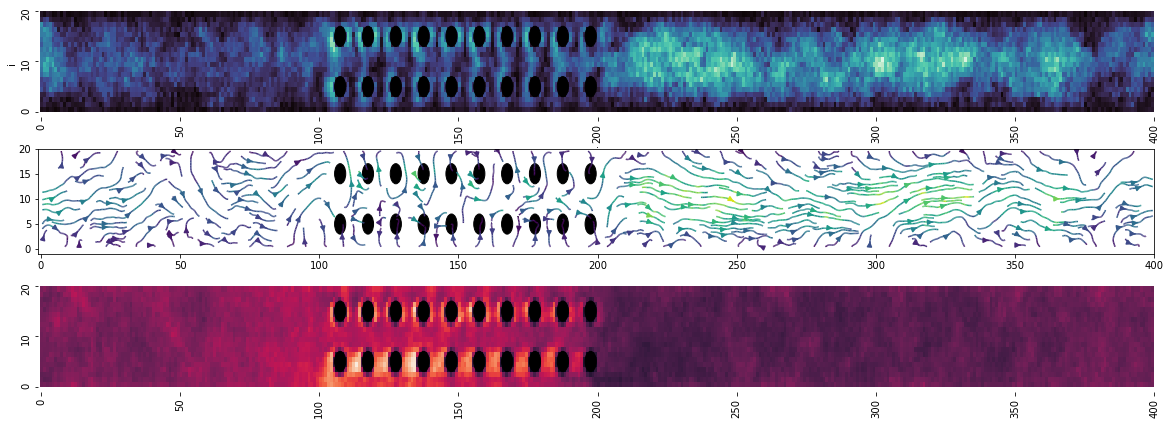

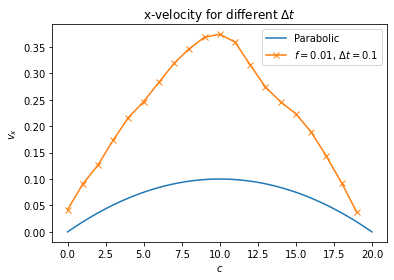

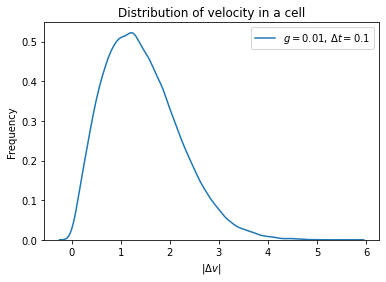

Data plotted and saved!


In [8]:
print('Plotting data ..')

def plot_stationary():
    fig = plt.figure(figsize=(20,7))
    ax = [fig.add_subplot(3,1,i+1) for i in range(3)]

    fig.subplots_adjust(wspace=0, hspace=0.3)

    if with_obstacles:
        add_obstacles(obstacles, ax[0])
        add_obstacles(obstacles, ax[1])
        add_obstacles(obstacles, ax[2])

    yticks = np.linspace(0, 20, num=3, dtype=np.int)
    yticklabels = [str(t) for t in yticks]
    xticks = np.linspace(0, 400, num=9, dtype=np.int)
    xticklabels = [str(t) for t in xticks]

    #ax[0].quiver(X + 0.5, Y + 0.5, vx, vy, color)
    sns.heatmap(speed_pivot, ax = ax[0], cmap = 'mako', cbar = False)
    ax[0].set(xlim=plot_x_region, ylim=plot_y_region)
    ax[0].set_yticks(yticks)
    ax[0].set_yticklabels(yticklabels)
    ax[0].set_xticks(xticks)
    ax[0].set_xticklabels(xticklabels)

    ax[1].streamplot(X + 0.5, Y + 0.5, vx, vy, color=color, density=streamplot_density) # grid
    ax[1].set(xlim=plot_x_region, ylim=plot_y_region)

    sns.heatmap(pivot, ax=ax[2], cbar = False) # cbar_kws={"fraction": 0.046, "pad": 0.005}
    ax[2].set(xlim=plot_x_region, ylim=plot_y_region)
    ax[2].set_ylabel('')
    ax[2].set_xlabel('')

    ax[2].set_yticks(yticks)
    ax[2].set_yticklabels(yticklabels)
    ax[2].set_xticks(xticks)
    ax[2].set_xticklabels(xticklabels)

    plt.savefig("Assets/stationary_region.png")
    plt.show()
    #plt.close()

    
def plot_poseuille():

    def viscosity(v_max, m = 1, av_N_c = 10, g = 0.01, D = 50):
        # see winkler paper, problem: idk how to go from the 3d equation to the 2d one
        return (m * av_N_c * g * D**2) / (8 * v_max)

    def parabolic_flow(y, D, v_max = 0.1):
        return (4 * v_max * (D - y) * y)/(D**2)

#data_dirs = [''] #400x50_0.01g_0.05t/', '400x50_0.01g_0.1t/', '400x50_0.01g_0.15t/', '400x50_0.01g_0.2t/'
#for config in data_dirs:
    y = np.linspace(0, y_dim, 100)
    plt.plot(y, parabolic_flow(y, y_dim), label = 'Parabolic')

    plt.plot(row_velocities, '-x', label = '$f = {}$, $\Delta t = {}$'.format(constants['g'], constants['delta_t']))#.mean(axis = 1)

    plt.legend(bbox_to_anchor=(1,1))
    plt.title('x-velocity for different $\Delta t$')
    plt.ylabel('$v_x$')
    plt.xlabel('$c$')
    #plt.savefig('Assets/poseuille.png')
    plt.show()
    
def plot_thermostat():
    data_dirs = [''] #400x50_0.01g_0.05t/, '400x50_0.01g_0.1t/', '400x50_0.01g_0.15t/', '400x50_0.01g_0.2t/'
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    for config in data_dirs:
        particles["i"] = (particles["y"] / constants["a"]).apply(lambda i: floor(i))
        particles["j"] = (particles["x"] / constants["a"]).apply(lambda i: floor(i))
        complete = pd.merge(particles, cells_timesteps[99], how = 'inner', on = ["i", "j"])
        complete["Delta_vx"] = complete["vx"] - complete["meanX"]
        complete["Delta_vy"] = complete["vy"] - complete["meanY"]
        complete["Delta_v"] = np.sqrt(complete["Delta_vx"]**2 + complete["Delta_vy"]**2)
        mid_i = (particles["i"] >= 1/4*y_dim) & (particles["i"] <= 35)
        subselection = complete.loc[mid_i]
        sns.kdeplot(subselection["Delta_v"]/ math.sqrt(constants["k_BT"] / constants["m"]),
                    ax = ax, label = '$g = {}$, $\Delta t = {}$'.format(constants["g"], constants["delta_t"]))
        #ax.plot(subselection["Delta_v"], poisson_avg(subselection["Delta_v"]/ math.sqrt(constants["k_BT"] / constants["m"])), 'o')# ,ax = ax
    ax.legend()
    ax.set_title('Distribution of velocity in a cell')
    ax.set_ylabel('Frequency')
    ax.set_xlabel('$|\Delta v|$')
    plt.savefig("Assets/Delta_v_dist.png")
    plt.show()

plot_stationary()
plot_poseuille()
plot_thermostat()
print('Data plotted and saved!')

i
0     0.133428
1     0.337622
2     0.522805
3     0.660338
4     0.801595
5     0.930963
6     1.049971
7     1.180522
8     1.261778
9     1.303103
10    1.302205
11    1.294718
12    1.227223
13    1.107753
14    0.983881
15    0.865307
16    0.731636
17    0.584420
18    0.369595
19    0.141069
Name: meanX, dtype: float64


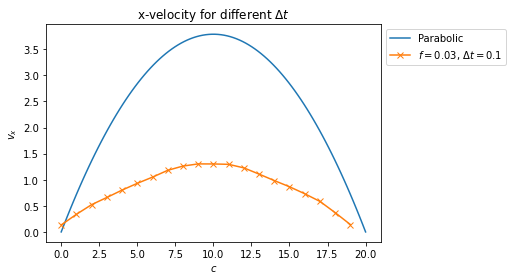

In [7]:
def viscosity():
    raise Exception()
    
def kinematic_viscosity(viscosity, density):
    return viscosity/density

def max_vel_parabolic(accel, channel_height, kinematic_viscosity):
    return accel * channel_height**2 / (8 * kinematic_viscosity) 
    
def parabolic_flow(v_max, channel_height, height):
    return (4 * v_max * (channel_height - height) * height)/(channel_height**2)

nu = kinematic_viscosity(3.96, 10) # 3.96 from lisa paper, 10 per cell

channel_height = constants['h']
v_max = max_vel_parabolic(constants['g'], channel_height, nu)

y = np.linspace(0, channel_height, 100)
plt.plot(y, parabolic_flow(v_max, channel_height, y), label = 'Parabolic')

print(row_velocities)
plt.plot(row_velocities, '-x', label = '$f = {}$, $\Delta t = {}$'.format(constants['g'], constants['delta_t']))#.mean(axis = 1)

plt.legend(bbox_to_anchor=(1,1))
plt.title('x-velocity for different $\Delta t$')
plt.ylabel('$v_x$')
plt.xlabel('$c$')
#plt.savefig('Assets/poseuille.png')
plt.show()





## Plot Potential & Force

In [ ]:
def V_LJTS(d, tuning, diameter, r_end):
    f = [V_LJ(r, tuning, diameter) - V_LJ(r_end, tuning, diameter) if r <= r_end else 0 for r in d]
    return f

def V_LJ(d, tuning, diameter):
    return 4 * tuning * ((diameter**12) / (d**12) - (diameter**6) / (d**6));

def V_FENE(d, tuning, diameter, k, R0):
    f = k/2 * tuning / (diameter**2) * R0**2 * np.log(1 - d**2/(1.5**2))
    return f

# --------- PARAMETERS ---------- #
tuning = 1
diameter = 1
r_end = 2**(1/6) * diameter
R0 = 1.5 * diameter
k = 30
d = np.linspace(0.1, 1.4, 100)


# -------- POTENTIAL PLOTTING ------- #
plt.plot(d, V_LJTS(d, tuning, diameter, r_end), label = '$V_{LJTS}(r)$')
plt.plot(d, [1 for n in d])
#plt.plot(d, V_FENE(d, tuning, diameter, k, R0), label = '$V_{FENE}(r)$')
#plt.plot(d, V_LJTS(d, tuning, diameter, r_end) + V_FENE(d, tuning, diameter, k, R0), '--', label = '$V_{LJTS}(r) + V_{FENE}(r)$')
#plt.xlim(0, 1.5)
plt.xlabel('$r$')
#plt.ylim(-1000, 1000)
plt.ylabel('$V(r)$')
plt.title('Truncated & shifted Lennard Jones and FENE potential')
plt.legend()
plt.show()

def LJ_trunc(d, tuning, diameter, r_end):
    f = [LJ(r, tuning, diameter) if r <= r_end else 0 for r in d] #- LJ(r_end, tuning, diameter)
    return f
    
def LJ(d, tuning, diameter):
    return 4 * tuning * (-12 * (diameter**12) / (d**13) - (-6 * diameter**6) / (d**7));

def FENE(d, tuning, diameter, k, R0):
    f = k * tuning/(diameter**2) * R0**2 * d/(1 - (d/R0)**2)
    return f

# ---------- FORCE PLOTTING --------- #
plt.plot(d, LJ_trunc(d, tuning, diameter, r_end), label = '$F_{LJTS}(r)$')
plt.plot(d, FENE(d, tuning, diameter, k, R0), label = '$F_{FENE}(r)$')
plt.plot(d, LJ_trunc(d, tuning, diameter, r_end) + FENE(d, tuning, diameter, k, R0), '--', label = '$F_{LJTS}(r) + F_{FENE}(r)$')
plt.xlim(0, 1.5)
plt.xlabel('$r$')
plt.ylim(-1000, 1000)
plt.ylabel('$F(r)$')
plt.title('Truncated & shifted Lennard Jones and FENE potential')
plt.legend()
plt.show()

# Animate Polymer

In [ ]:
from matplotlib import animation

fig = plt.figure()
ax = plt.axes(xlim=(0, 400), ylim=(0, 20))

point_size = 3
df = monomers_t[0]
scatter, = ax.plot(df['x'], df['y'], 'o', markersize = point_size, color = 'red')

# animation function.  This is called sequentially
def animate(it):
    df = monomers_t[it]
    scatter.set_xdata(df['x'])
    scatter.set_ydata(df['y'])
    if (it % 100 == 0):
        print('--Created {} frame.\n'.format(it))
    return scatter,

anim = animation.FuncAnimation(fig, animate, #init_func=init,
                               frames=len(monomers_t), blit=True)

anim.save('./Assets/monomer_animation.mp4', fps=5, extra_args=['-vcodec', 'libx264'])
print('Animated and saved!')

plt.show()
#plt.close()

# Misc

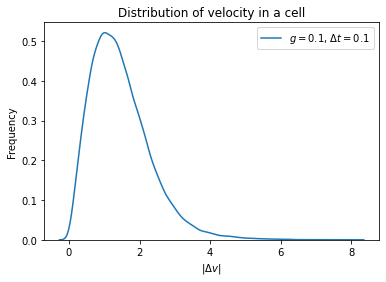

In [24]:
def theoretical_dist(Delta_v, N_c, av_N_c = 10, m = 1, k_B = 1, T = 1):
    A = (m/(2 * math.pi * k_B * T * (1 - 1/N_c)))**(3/2)
    B = np.exp(-(m/(2 * k_B * T * (1 - 1/N_c))) * Delta_v**2)
    return A * B

def poisson_avg(Delta_v, max_sum = 1000, av_N_c = 10, m = 1, k_B = 1, T = 1):
    e = math.exp(-av_N_c)
    total = 0
    for N_c in range(2, max_sum):
        P = (av_N_c**N_c)/(math.factorial(N_c))
        N = theoretical_dist(Delta_v, N_c, m, k_B, T)
        total += P * (N)
    D = 1 - (av_N_c + 1) * e
    return e * total/D